In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import networkx as nx
import ete3
import dendropy

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#define colours
cmap = {
    #Outbreak
    'F2402': '#BEBEBE',
    'F9619': '#7FFFD4',
    'F6041': '#F0FFFF',
    'F9226': '#0000FF',
    'F9413': '#A52A2A',
    'F4957': '#DEB887',
    'F0012': '#7FFF00',
    'F8630': '#FF7F50',
    'F3862': '#FFF8DC',
    'F6245': '#00FFFF',
    'F7578': '#B8860B',
    'F2655': '#BDB76B',
    'F7360': '#8B008B',
    'F0731': '#556B2F',
    'F23315': '#FF8C00',
    'F4984': '#9932CC',
    'F9503': '#8B0000',
    'F0205': '#E9967A',
    'F0038':'#8FBC8F',
    #Source 
    'Diseased': '#FF0000',
    'Cecal': '#0000FF',
    'Environmental': '#00FF00',
    #Phylogroup
    'A':'#483D8B',
    'B1': '#2F4F4F',
    'B2': '#00CED1',
    'C': '#9400D3',
    'cryptic': '#000000',
    'D': '#FF1493',
    'E': '#00BFFF',
    'F': '#1E90FF',
    'G': '#B22222',
    'U': '#000000',
    'Not_Specified': '#000000',
    np.nan: '#FFFFFF'
}


In [3]:
genome_labels = pd.read_table('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/tree_heatmaps/genome_label.csv', sep=',', index_col=0)
genome_labels = genome_labels.reindex(columns=['Outbreak', 'Source', 'Phylogroup'])
genome_labels.index = genome_labels.index.str.replace('_',' ')
genome_labels = genome_labels.rename(index={'EF': 'Efergusonii-FDAARGOS-1499'})
genome_labels['Phylogroup'] = genome_labels['Phylogroup'].fillna('Not_Specified')
genome_labels.index = genome_labels.index.str.replace(' ','-')
genome_labels

Outbreak         Source     Phylogroup
Genome                                                          
EC-0012-1H1-D                F0012       Diseased              G
EC-0012-2H1-D                F0012       Diseased              G
EC-0012-2L1-D                F0012       Diseased             B2
EC-0012-3S1-D                F0012       Diseased              G
EC-0012-C1-H                 F0012          Cecal              A
...                            ...            ...            ...
EC-E9DN-1-E                    NaN  Environmental              A
EC-E9DN-2-E                    NaN  Environmental              A
EC-E9FP-1-E                    NaN  Environmental              A
EC-E9L-1-E                     NaN  Environmental              D
Efergusonii-FDAARGOS-1499      NaN            NaN  Not_Specified

[246 rows x 3 columns]

In [4]:
genome_labels_A = genome_labels[genome_labels['Phylogroup'].str.contains('A|Not_Specified')]
genome_labels_A = genome_labels_A.drop("Phylogroup", axis=1)
genome_labels_B1 = genome_labels[genome_labels['Phylogroup'].str.contains('B1|Not_Specified')]
genome_labels_B1 = genome_labels_B1.drop("Phylogroup", axis=1)
genome_labels_B2 = genome_labels[genome_labels['Phylogroup'].str.contains('B2|Not_Specified')]
genome_labels_B2 = genome_labels_B2.drop("Phylogroup", axis=1)
genome_labels_C = genome_labels[genome_labels['Phylogroup'].str.contains('C|Not_Specified')]
genome_labels_C = genome_labels_C.drop("Phylogroup", axis=1)
genome_labels_D = genome_labels[genome_labels['Phylogroup'].str.contains('D|Not_Specified')]
genome_labels_D = genome_labels_D.drop("Phylogroup", axis=1)
genome_labels_E = genome_labels[genome_labels['Phylogroup'].str.contains('E|Not_Specified')]
genome_labels_E = genome_labels_E.drop("Phylogroup", axis=1)
genome_labels_G = genome_labels[genome_labels['Phylogroup'].str.contains('G|Not_Specified')]
genome_labels_G = genome_labels_G.drop("Phylogroup", axis=1)

In [5]:
genome_labels_B2

Outbreak    Source
Genome                                      
EC-0012-2L1-D                F0012  Diseased
EC-0038-1S2-D                F0038  Diseased
EC-0038-2L3-D                F0038  Diseased
EC-0038-3S2-D                F0038  Diseased
EC-0205-C6-H                 F0205     Cecal
EC-0731-SB3C2-H              F0731     Cecal
EC-4957-1H2-D                F4957  Diseased
EC-4957-2L3-D                F4957  Diseased
EC-8630-1H1-D                F8630  Diseased
EC-8630-1L1-D                F8630  Diseased
EC-8630-1S1-D                F8630  Diseased
EC-8630-1S2-D                F8630  Diseased
EC-9226-1H3-D                F9226  Diseased
EC-9413-3L1-D                F9413  Diseased
EC-9413-3S1-D                F9413  Diseased
EC-9503-1H3-D                F9503  Diseased
EC-9503-1L1-D                F9503  Diseased
EC-9503-1S2-D                F9503  Diseased
EC-9503-2H1-D                F9503  Diseased
EC-9503-C1-H                 F9503     Cecal
EC-9503-C2-H                 F9503     Cecal
Efergusonii-FDAARGOS-1499      NaN       NaN

In [6]:
tA = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/A/Ecoli_tree_file_A.treefile', format= 1)
tA.set_outgroup("Efergusonii_FDAARGOS_1499")
treeA = dendropy.Tree.get(data=tA.write(), schema='newick')
dmA =pd.DataFrame.from_records(treeA.phylogenetic_distance_matrix().as_data_table()._data)
umA = squareform(dmA[dmA.index])
ultrametric_link = linkage(umA)
dmA.index = dmA.index.str.replace(' ', '-')

tB1 = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/B1/Ecoli_tree_file_B1.treefile', format= 1)
tB1.set_outgroup("Efergusonii_FDAARGOS_1499")
treeB1 = dendropy.Tree.get(data=tB1.write(), schema='newick')
dmB1 =pd.DataFrame.from_records(treeB1.phylogenetic_distance_matrix().as_data_table()._data)
umB1 = squareform(dmB1[dmB1.index])
ultrametric_link = linkage(umB1)
dmB1.index = dmB1.index.str.replace(' ', '-')

tB2 = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/B2/Ecoli_tree_file_B2.treefile', format= 1)
tB2.set_outgroup("Efergusonii_FDAARGOS_1499")
treeB2 = dendropy.Tree.get(data=tB2.write(), schema='newick')
dmB2 =pd.DataFrame.from_records(treeB2.phylogenetic_distance_matrix().as_data_table()._data)
umB2 = squareform(dmB2[dmB2.index])
ultrametric_link = linkage(umB2)
dmB2.index = dmB2.index.str.replace(' ', '-')

tC = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/C/Ecoli_tree_file_C.treefile', format= 1)
tC.set_outgroup("Efergusonii_FDAARGOS_1499")
treeC = dendropy.Tree.get(data=tC.write(), schema='newick')
dmC =pd.DataFrame.from_records(treeC.phylogenetic_distance_matrix().as_data_table()._data)
umC = squareform(dmC[dmC.index])
ultrametric_link = linkage(umC)
dmC.index = dmC.index.str.replace(' ', '-')

tD = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/D/Ecoli_tree_file_D.treefile', format= 1)
tD.set_outgroup("Efergusonii_FDAARGOS_1499")
treeD = dendropy.Tree.get(data=tD.write(), schema='newick')
dmD =pd.DataFrame.from_records(treeD.phylogenetic_distance_matrix().as_data_table()._data)
umD = squareform(dmD[dmD.index])
ultrametric_link = linkage(umD)
dmD.index = dmD.index.str.replace(' ', '-')

tE = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/E/Ecoli_tree_file_E.treefile', format= 1)
tE.set_outgroup("Efergusonii_FDAARGOS_1499")
treeE = dendropy.Tree.get(data=tE.write(), schema='newick')
dmE =pd.DataFrame.from_records(treeE.phylogenetic_distance_matrix().as_data_table()._data)
umE = squareform(dmE[dmE.index])
ultrametric_link = linkage(umE)
dmE.index = dmE.index.str.replace(' ', '-')

tG = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/Phylogroup_Trees/G/Ecoli_tree_file_G.treefile', format= 1)
tG.set_outgroup("Efergusonii_FDAARGOS_1499")
treeG = dendropy.Tree.get(data=tG.write(), schema='newick')
dmG =pd.DataFrame.from_records(treeG.phylogenetic_distance_matrix().as_data_table()._data)
umG = squareform(dmG[dmG.index])
ultrametric_link = linkage(umG)
dmG.index = dmG.index.str.replace(' ', '-')


In [7]:
dmB2

EC-0012-2L1-D  EC-0038-1S2-D  EC-0038-2L3-D   
EC-9619-3L1-D                   0.019578   1.847514e-02   1.847514e-02  \
EC-9503-1H3-D                   0.018804   1.770126e-02   1.770126e-02   
EC-8630-1S2-D                   0.013178   2.316591e-03   2.316591e-03   
EC-0038-3S2-D                   0.013202   1.400000e-08   1.400000e-08   
EC-8630-1H1-D                   0.013178   2.316598e-03   2.316598e-03   
EC-4957-2L3-D                   0.013199   5.761000e-06   5.761000e-06   
EC-9503-C1-H                    0.018815   1.771214e-02   1.771214e-02   
EC-0012-2L1-D                   0.000000   1.320163e-02   1.320163e-02   
EC-0038-2L3-D                   0.013202   0.000000e+00   0.000000e+00   
EC-0731-SB3C2-H                 0.011728   1.396960e-02   1.396960e-02   
EC-9619-3S1-D                   0.019582   1.847881e-02   1.847881e-02   
EC-9503-1S2-D                   0.018804   1.770126e-02   1.770126e-02   
EC-9503-1L1-D                   0.018804   1.770126e-02   1.770126e-02   
EC-9503-2H1-D                   0.018804   1.770093e-02   1.770093e-02   
EC-9503-C2-H                    0.018804   1.770093e-02   1.770093e-02   
EC-4957-1H2-D                   0.013176   2.314923e-03   2.314923e-03   
Efergusonii-FDAARGOS-1499       0.138112   1.370092e-01   1.370092e-01   
EC-8630-1S1-D                   0.013178   2.316598e-03   2.316598e-03   
EC-9226-1H3-D                   0.000006   1.319721e-02   1.319721e-02   
EC-8630-1L1-D                   0.013194   2.333281e-03   2.333281e-03   
EC-0038-1S2-D                   0.013202   0.000000e+00   0.000000e+00   
EC-0205-C6-H                    0.031727   3.062393e-02   3.062393e-02   

                           EC-0038-3S2-D  EC-0205-C6-H  EC-0731-SB3C2-H   
EC-9619-3L1-D               1.847514e-02      0.029282         0.020346  \
EC-9503-1H3-D               1.770126e-02      0.028508         0.019572   
EC-8630-1S2-D               2.316591e-03      0.030600         0.013946   
EC-0038-3S2-D               0.000000e+00      0.030624         0.013970   
EC-8630-1H1-D               2.316598e-03      0.030600         0.013946   
EC-4957-2L3-D               5.761000e-06      0.030622         0.013967   
EC-9503-C1-H                1.771214e-02      0.028519         0.019583   
EC-0012-2L1-D               1.320163e-02      0.031727         0.011728   
EC-0038-2L3-D               1.400000e-08      0.030624         0.013970   
EC-0731-SB3C2-H             1.396960e-02      0.032495         0.000000   
EC-9619-3S1-D               1.847881e-02      0.029286         0.020350   
EC-9503-1S2-D               1.770126e-02      0.028508         0.019572   
EC-9503-1L1-D               1.770126e-02      0.028508         0.019572   
EC-9503-2H1-D               1.770093e-02      0.028508         0.019572   
EC-9503-C2-H                1.770093e-02      0.028508         0.019572   
EC-4957-1H2-D               2.314923e-03      0.030598         0.013944   
Efergusonii-FDAARGOS-1499   1.370092e-01      0.128801         0.138880   
EC-8630-1S1-D               2.316598e-03      0.030600         0.013946   
EC-9226-1H3-D               1.319721e-02      0.031722         0.011724   
EC-8630-1L1-D               2.333281e-03      0.030617         0.013962   
EC-0038-1S2-D               1.400000e-08      0.030624         0.013970   
EC-0205-C6-H                3.062393e-02      0.000000         0.032495   

                           EC-4957-1H2-D  EC-4957-2L3-D  EC-8630-1H1-D   
EC-9619-3L1-D                   0.018450       0.018473   1.845118e-02  \
EC-9503-1H3-D                   0.017676       0.017699   1.767730e-02   
EC-8630-1S2-D                   0.000010       0.002314   2.100000e-08   
EC-0038-3S2-D                   0.002315       0.000006   2.316598e-03   
EC-8630-1H1-D                   0.000010       0.002314   0.000000e+00   
EC-4957-2L3-D                   0.002313       0.000000   2.314215e-03   
EC-9503-C1-H                    0.017687       0.017710   1.768818e-02   
EC-001

In [8]:
genome_colors_A = genome_labels_A.copy()

for col in genome_colors_A.columns:
    genome_colors_A[col] = [cmap[c] for c in genome_colors_A[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_A.columns):
    legend_keys += sorted(list(genome_labels_A[col].dropna().unique()))
legend_cmap_A = {k:v for k, v in cmap.items() if k in legend_keys}






genome_colors_B1 = genome_labels_B1.copy()

for col in genome_colors_B1.columns:
    genome_colors_B1[col] = [cmap[c] for c in genome_colors_B1[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_B1.columns):
    legend_keys += sorted(list(genome_labels_B1[col].dropna().unique()))
legend_cmap_B1 = {k:v for k, v in cmap.items() if k in legend_keys}






genome_colors_B2 = genome_labels_B2.copy()

for col in genome_colors_B2.columns:
    genome_colors_B2[col] = [cmap[c] for c in genome_colors_B2[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_B2.columns):
    legend_keys += sorted(list(genome_labels_B2[col].dropna().unique()))
legend_cmap_B2 = {k:v for k, v in cmap.items() if k in legend_keys}








genome_colors_C = genome_labels_C.copy()

for col in genome_colors_C.columns:
    genome_colors_C[col] = [cmap[c] for c in genome_colors_C[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_C.columns):
    legend_keys += sorted(list(genome_labels_C[col].dropna().unique()))
legend_cmap_C = {k:v for k, v in cmap.items() if k in legend_keys}










genome_colors_D = genome_labels_D.copy()

for col in genome_colors_D.columns:
    genome_colors_D[col] = [cmap[c] for c in genome_colors_D[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_D.columns):
    legend_keys += sorted(list(genome_labels_D[col].dropna().unique()))
legend_cmap_D = {k:v for k, v in cmap.items() if k in legend_keys}








genome_colors_E = genome_labels_E.copy()

for col in genome_colors_E.columns:
    genome_colors_E[col] = [cmap[c] for c in genome_colors_E[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_E.columns):
    legend_keys += sorted(list(genome_labels_E[col].dropna().unique()))
legend_cmap_E = {k:v for k, v in cmap.items() if k in legend_keys}








genome_colors_G = genome_labels_G.copy()

for col in genome_colors_G.columns:
    genome_colors_G[col] = [cmap[c] for c in genome_colors_G[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels_G.columns):
    legend_keys += sorted(list(genome_labels_G[col].dropna().unique()))
legend_cmap_G = {k:v for k, v in cmap.items() if k in legend_keys}


In [9]:
genome_colors_B1

Outbreak   Source
Genome                                     
EC-0012-C3-H               #7FFF00  #0000FF
EC-0012-C7-H               #7FFF00  #0000FF
EC-0731-SB2C1-H            #556B2F  #0000FF
EC-0731-SB3C1-H            #556B2F  #0000FF
EC-6245-C4-H               #00FFFF  #0000FF
EC-7360-2H2-D              #8B008B  #FF0000
EC-7360-C1-H               #8B008B  #0000FF
EC-7578-1H1-D              #B8860B  #FF0000
EC-7578-1L2-D              #B8860B  #FF0000
EC-7578-3S1-D              #B8860B  #FF0000
EC-9226-C5-H               #0000FF  #0000FF
EC-9413-C3-H               #A52A2A  #0000FF
EC-9413-C4-H               #A52A2A  #0000FF
EC-9503-C3-H               #8B0000  #0000FF
EC-9619-1H1-D              #7FFFD4  #FF0000
EC-9619-1S3-D              #7FFFD4  #FF0000
EC-9619-2S1-D              #7FFFD4  #FF0000
EC-9619-C6-H               #7FFFD4  #0000FF
EC-E11L-1-E                #FFFFFF  #00FF00
EC-E12BE-1-E               #FFFFFF  #00FF00
EC-E13BF-4-E               #FFFFFF  #00FF00
EC-E13L-1-E                #FFFFFF  #00FF00
EC-E13L-2-E                #FFFFFF  #00FF00
EC-E15L-1-E                #FFFFFF  #00FF00
EC-E2DN-1-E                #FFFFFF  #00FF00
EC-E5DN-1-E                #FFFFFF  #00FF00
EC-E7L-1-E                 #FFFFFF  #00FF00
Efergusonii-FDAARGOS-1499  #FFFFFF  #FFFFFF

In [10]:

pa_cmap= sns.color_palette(['#f5f5f5', '#021657'])

In [11]:
#AMR heatmap
pa = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv', index_col=0)

In [12]:
pa.index = pa.index.str.replace('_','-')

In [13]:
merged_A = pd.merge(genome_labels_A, pa, left_index=True, right_index=True, how='left')
merged_A = merged_A.drop(['Outbreak', 'Source'], axis=1)
merged_B1 = pd.merge(genome_labels_B1, pa, left_index=True, right_index=True, how='left')
merged_B1 = merged_B1.drop(['Outbreak', 'Source'], axis=1)
merged_B2 = pd.merge(genome_labels_B2, pa, left_index=True, right_index=True, how='left')
merged_B2 = merged_B2.drop(['Outbreak', 'Source'], axis=1)
merged_C = pd.merge(genome_labels_C, pa, left_index=True, right_index=True, how='left')
merged_C = merged_C.drop(['Outbreak', 'Source'], axis=1)
merged_D = pd.merge(genome_labels_D, pa, left_index=True, right_index=True, how='left')
merged_D = merged_D.drop(['Outbreak', 'Source'], axis=1)
merged_E = pd.merge(genome_labels_E, pa, left_index=True, right_index=True, how='left')
merged_E = merged_E.drop(['Outbreak', 'Source'], axis=1)
merged_G = pd.merge(genome_labels_G, pa, left_index=True, right_index=True, how='left')
merged_G = merged_G.drop(['Outbreak', 'Source'], axis=1)

In [14]:
merged_B2

AAC(3)-IId  AAC(3)-IV  AAC(3)-VIa  AAC(6')-Iid   
Genome                                                                      
EC-0012-2L1-D                     0.0        0.0         0.0          0.0  \
EC-0038-1S2-D                     0.0        0.0         0.0          0.0   
EC-0038-2L3-D                     0.0        0.0         0.0          0.0   
EC-0038-3S2-D                     0.0        0.0         0.0          0.0   
EC-0205-C6-H                      0.0        0.0         0.0          0.0   
EC-0731-SB3C2-H                   0.0        0.0         0.0          0.0   
EC-4957-1H2-D                     0.0        0.0         0.0          0.0   
EC-4957-2L3-D                     0.0        0.0         0.0          0.0   
EC-8630-1H1-D                     0.0        0.0         0.0          0.0   
EC-8630-1L1-D                     0.0        0.0         0.0          0.0   
EC-8630-1S1-D                     0.0        0.0         0.0          0.0   
EC-8630-1S2-D                     0.0        0.0         0.0          0.0   
EC-9226-1H3-D                     0.0        0.0         0.0          0.0   
EC-9413-3L1-D                     0.0        0.0         0.0          0.0   
EC-9413-3S1-D                     0.0        0.0         0.0          0.0   
EC-9503-1H3-D                     0.0        0.0         0.0          0.0   
EC-9503-1L1-D                     0.0        0.0         0.0          0.0   
EC-9503-1S2-D                     0.0        0.0         0.0          0.0   
EC-9503-2H1-D                     0.0        0.0         0.0          0.0   
EC-9503-C1-H                      0.0        0.0         0.0          0.0   
EC-9503-C2-H                      0.0        0.0         0.0          0.0   
Efergusonii-FDAARGOS-1499         NaN        NaN         NaN          NaN   

                           ANT(3'')-IIa  ANT(3'')-Ib  ANT(4')-IIb   
Genome                                                              
EC-0012-2L1-D                       0.0          0.0          0.0  \
EC-0038-1S2-D                       0.0          0.0          0.0   
EC-0038-2L3-D                       0.0          0.0          0.0   
EC-0038-3S2-D                       0.0          0.0          0.0   
EC-0205-C6-H                        0.0          1.0          0.0   
EC-0731-SB3C2-H                     0.0          0.0          0.0   
EC-4957-1H2-D                       0.0          0.0          0.0   
EC-4957-2L3-D                       0.0          0.0          0.0   
EC-8630-1H1-D                       0.0          0.0          0.0   
EC-8630-1L1-D                       0.0          0.0          1.0   
EC-8630-1S1-D                       0.0          0.0          0.0   
EC-8630-1S2-D                       0.0          0.0          0.0   
EC-9226-1H3-D                       0.0          0.0          0.0   
EC-9413-3L1-D                       0.0          1.0          0.0   
EC-9413-3S1-D                       0.0          1.0          0.0   
EC-9503-1H3-D                       0.0          1.0          0.0   
EC-9503-1L1-D                       0.0          1.0          0.0   
EC-9503-1S2-D                       0.0          1.0          0.0   
EC-9503-2H1-D                       0.0          1.0          0.0   
EC-9503-C1-H                        0.0          1.0          0.0   
EC-9503-C2-H                        0.0          1.0          0.0   
Efergusonii-FDAARGOS-1499           NaN          NaN          NaN   

                           APH(3'')-Ib  APH(3')-IIa  APH(3')-Ia  ...  sul1   
Genome                                                           ...         
EC-0012-2L1-D                      0.0          0.0         0.0  ...   0.0  \
EC-0038-1S2-D                      0.0          0.0         0.0  ...   0.0   
EC-0038-2L3-D                      0.0          0.0         0.0  ...   0.0   
EC-0038-3S2-D                      0.0          0.0         0.0  ...   0.0   
EC-0205-C6-H                       0.0          0.0  

In [15]:
pa_A1 = merged_A.fillna(0)
pa_A2 = pa_A1.drop('All', axis=1)
pa_A3 = pa_A2.ge(0.5).astype(int)
pa_A3.index = pa_A3.index.str.replace(' ','-')
pa_A3.index = pa_A3.index.str.replace('_', '-')
pa_A4 = pa_A3.loc[:, (pa_A3 != 0).any(axis=0)]

pa_B11 = merged_B1.fillna(0)
pa_B12 = pa_B11.drop('All', axis=1)
pa_B13 = pa_B12.ge(0.5).astype(int)
pa_B13.index = pa_B13.index.str.replace(' ','-')
pa_B13.index = pa_B13.index.str.replace('_', '-')
pa_B14 = pa_B13.loc[:, (pa_B13 != 0).any(axis=0)]


pa_B21 = merged_B2.fillna(0)
pa_B22 = pa_B21.drop('All', axis=1)
pa_B23 = pa_B22.ge(0.5).astype(int)
pa_B23.index = pa_B23.index.str.replace(' ','-')
pa_B23.index = pa_B23.index.str.replace('_', '-')
pa_B24 = pa_B23.loc[:, (pa_B23 != 0).any(axis=0)]


pa_C1 = merged_C.fillna(0)
pa_C2 = pa_C1.drop('All', axis=1)
pa_C3 = pa_C2.ge(0.5).astype(int)
pa_C3.index = pa_C3.index.str.replace(' ','-')
pa_C3.index = pa_C3.index.str.replace('_', '-')
pa_C4 = pa_C3.loc[:, (pa_C3 != 0).any(axis=0)]


pa_D1 = merged_D.fillna(0)
pa_D2 = pa_D1.drop('All', axis=1)
pa_D3 = pa_D2.ge(0.5).astype(int)
pa_D3.index = pa_D3.index.str.replace(' ','-')
pa_D3.index = pa_D3.index.str.replace('_', '-')
pa_D4 = pa_D3.loc[:, (pa_D3 != 0).any(axis=0)]


pa_E1 = merged_E.fillna(0)
pa_E2 = pa_E1.drop('All', axis=1)
pa_E3 = pa_E2.ge(0.5).astype(int)
pa_E3.index = pa_E3.index.str.replace(' ','-')
pa_E3.index = pa_E3.index.str.replace('_', '-')
pa_E4 = pa_E3.loc[:, (pa_E3 != 0).any(axis=0)]


pa_G1 = merged_G.fillna(0)
pa_G2 = pa_G1.drop('All', axis=1)
pa_G3 = pa_G2.ge(0.5).astype(int)
pa_G3.index = pa_G3.index.str.replace(' ','-')
pa_G3.index = pa_G3.index.str.replace('_', '-')
pa_G4 = pa_G3.loc[:, (pa_G3 != 0).any(axis=0)]

In [16]:
pa_B14

AAC(6')-Iid  ANT(3'')-IIa  APH(3'')-Ib  APH(6)-Id   
Genome                                                                         
EC-0012-C3-H                         0             0            0          0  \
EC-0012-C7-H                         0             0            0          0   
EC-0731-SB2C1-H                      0             0            0          0   
EC-0731-SB3C1-H                      0             0            0          0   
EC-6245-C4-H                         0             0            1          1   
EC-7360-2H2-D                        0             0            0          0   
EC-7360-C1-H                         0             0            0          0   
EC-7578-1H1-D                        0             0            0          0   
EC-7578-1L2-D                        0             0            0          0   
EC-7578-3S1-D                        0             0            0          0   
EC-9226-C5-H                         0             1            0          0   
EC-9413-C3-H                         0             0            0          0   
EC-9413-C4-H                         0             0            0          0   
EC-9503-C3-H                         0             0            0          0   
EC-9619-1H1-D                        0             0            0          0   
EC-9619-1S3-D                        0             0            0          0   
EC-9619-2S1-D                        0             0            0          0   
EC-9619-C6-H                         0             0            0          0   
EC-E11L-1-E                          0             0            0          0   
EC-E12BE-1-E                         0             0            1          1   
EC-E13BF-4-E                         0             0            0          0   
EC-E13L-1-E                          0             0            0          0   
EC-E13L-2-E                          0             0            0          0   
EC-E15L-1-E                          1             0            0          0   
EC-E2DN-1-E                          0             0            0          0   
EC-E5DN-1-E                          0             0            0          0   
EC-E7L-1-E                           0             0            0          0   
Efergusonii-FDAARGOS-1499            0             0            0          0   

                           AcrE  AcrF  AcrS  CMY-163  CRP  EC-13  ...  mdtO   
Genome                                                            ...         
EC-0012-C3-H                  1     1     1        0    1      0  ...     1  \
EC-0012-C7-H                  1     1     1        0    1      0  ...     1   
EC-0731-SB2C1-H               1     1     1        0    1      0  ...     1   
EC-0731-SB3C1-H               1     1     1        0    1      0  ...     1   
EC-6245-C4-H                  1     1     1        0    1      0  ...     1   
EC-7360-2H2-D                 1     1     1        0    1      0  ...     1   
EC-7360-C1-H                  1     1     1        0    1      1  ...     1   
EC-7578-1H1-D                 1     1     1        0    1      0  ...     1   
EC-7578-1L2-D                 1     1     1        0    1      0  ...     1   
EC-7578-3S1-D                 1     1     1        0    1      0  ...     1   
EC-9226-C5-H                  1     1     1        1    1      1  ...     1   
EC-9413-C3-H                  1     1     1        0    1      0  ...     1   
EC-9413-C4-H                  1     1     1        0    1      0  ...     1   
EC-9503-C3-H                  1     1     1        0    1      0  ...     1   
EC-9619-1H1-D                 1     1     1        0    1      0  ...     1   
EC-9619-1S3-D                 1     1     1        0    1      0  ...     1   
EC-9619-2S1-D                 1     1     1        0    1      0  ...     1   
EC-9619-C6-H                  1     1     1        0    1      0  ...     1   
EC-E11L-1-E                   1     1     1   

In [17]:
for genome in set(dmA.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_A = []

for f in features:
    if len(f) > 6:
        long_names_A.append(f)


In [18]:
for genome in set(dmB1.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_B1 = []

for f in features:
    if len(f) > 6:
        long_names_B1.append(f)


In [19]:
for genome in set(dmB2.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_B2 = []

for f in features:
    if len(f) > 6:
        long_names_B2.append(f)


In [20]:
for genome in set(dmC.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_C = []

for f in features:
    if len(f) > 6:
        long_names_C.append(f)


In [21]:
for genome in set(dmD.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_D = []

for f in features:
    if len(f) > 6:
        long_names_D.append(f)


In [22]:
for genome in set(dmE.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_E = []

for f in features:
    if len(f) > 6:
        long_names_E.append(f)


In [23]:
for genome in set(dmG.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)
feature = 'AMR'

long_names_G = []

for f in features:
    if len(f) > 6:
        long_names_G.append(f)


In [24]:
name_map = {'Escherichia coli 23S rRNA with mutation conferring resistance to erythromycin and telithromycin': '23S rRNA*',
 'Escherichia coli AcrAB-TolC with AcrR mutation conferring resistance to ciprofloxacin, tetracycline, and ceftazidime': 'AcrAB-TolC*AcrR',
 'Escherichia coli AcrAB-TolC with MarR mutations conferring resistance to ciprofloxacin and tetracycline': 'AcrAB-TolC*MarR',
 'Escherichia coli EF-Tu mutants conferring resistance to Pulvomycin': 'EF-Tu*',
 'Escherichia coli GlpT with mutation conferring resistance to fosfomycin': 'GlpT*',
 'Escherichia coli PtsI with mutation conferring resistance to fosfomycin': 'PtsI*',
 'Escherichia coli UhpT with mutation conferring resistance to fosfomycin': 'UhpT*',
 'Escherichia coli acrA': 'acrA',
 'Escherichia coli ampC beta-lactamase': 'ampC',
 'Escherichia coli cyaA with mutation conferring resistance to fosfomycin': 'cyaA',
 'Escherichia coli emrE': 'emrE',
 'Escherichia coli gyrA conferring resistance to fluoroquinolones': 'gyrA*',
 'Escherichia coli mdfA': 'mdfA',
 'Escherichia coli soxR with mutation conferring antibiotic resistance': 'soxR*',
 'Escherichia coli soxS with mutation conferring antibiotic resistance': 'soxS*',
 'Haemophilus influenzae PBP3 conferring resistance to beta-lactam antibiotics': 'PBP3',
 'Klebsiella pneumoniae KpnE': 'KpnE',
 'Klebsiella pneumoniae KpnF': 'KpnF',
 'Klebsiella pneumoniae KpnG': 'KpnG',
 'Klebsiella pneumoniae KpnH': 'KpnH',
 'Streptococcus agalactiae mprF': 'mprF',
 'Streptomyces lividans cmlR': 'cmlR'}

/tmp/ipykernel_206839/604583551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


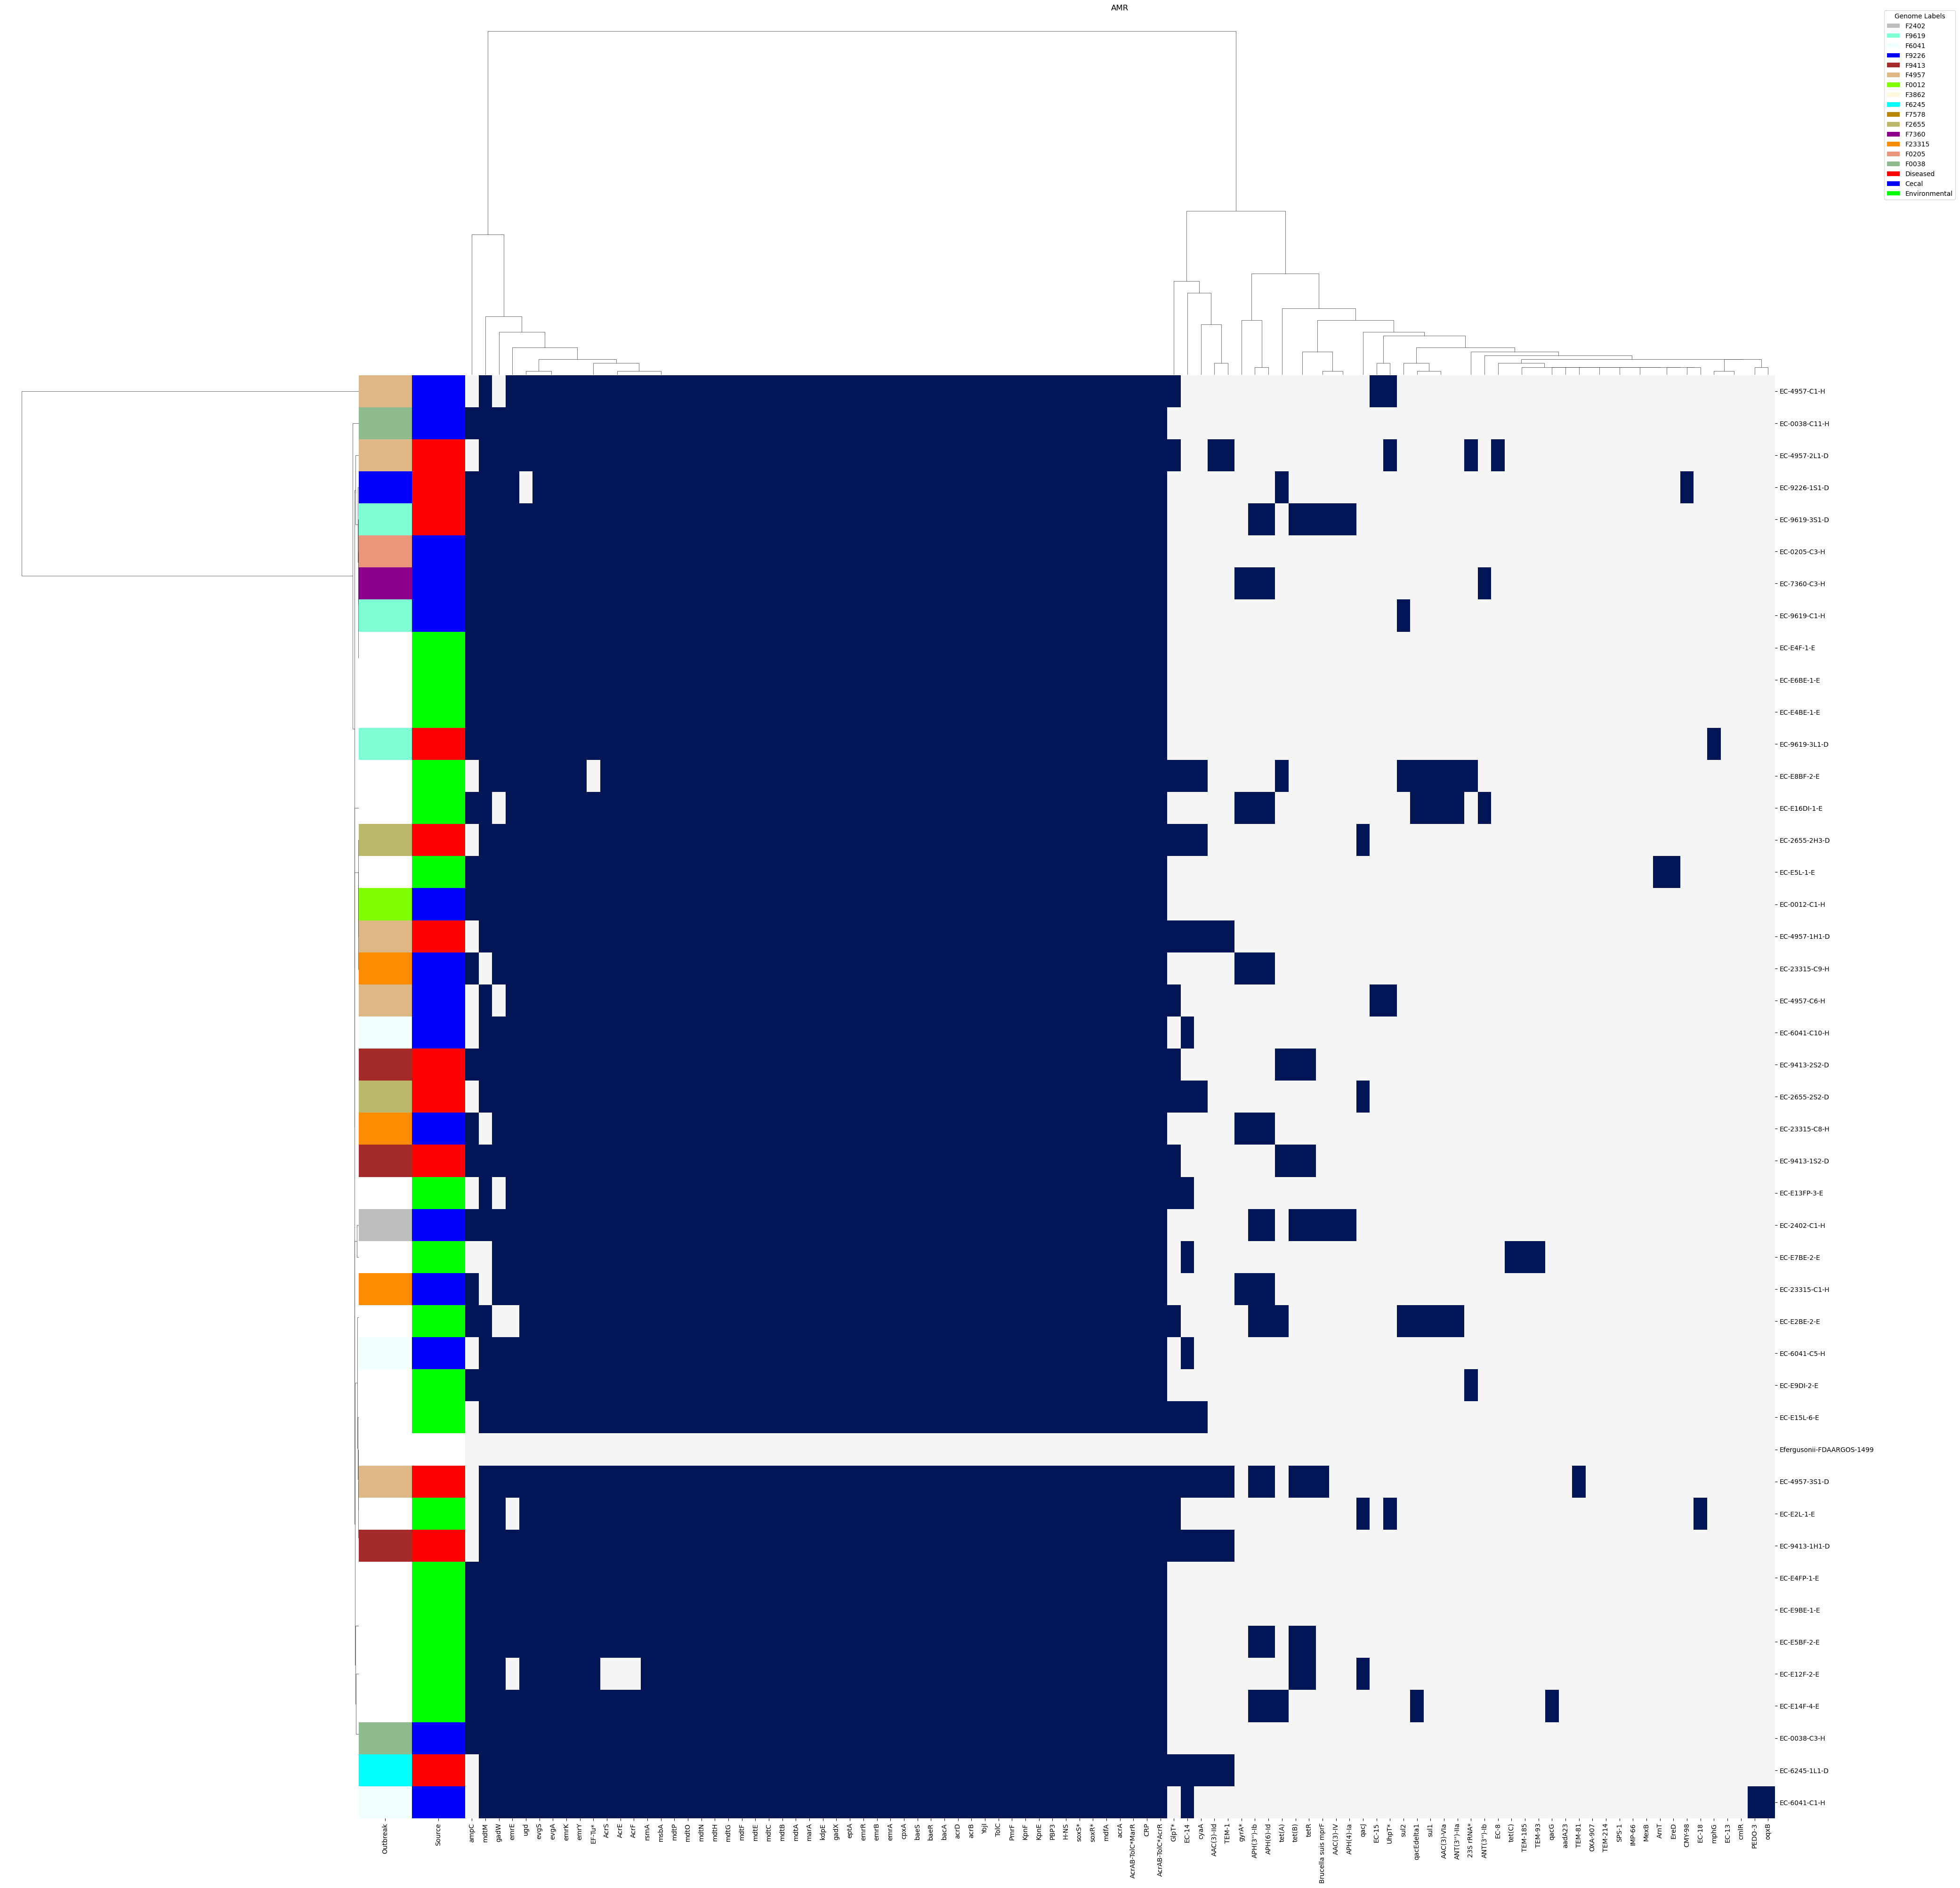

In [25]:
feature = 'AMR'
panel = 'a'

sel_pa = pa_A4
sel_pa.rename(name_map, axis=1, inplace=True)

title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_A[name]) for name in legend_cmap_A]
g = sns.clustermap(data=sel_pa.loc[dmA.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors_A,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_A, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_A_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


/tmp/ipykernel_206839/3241324243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


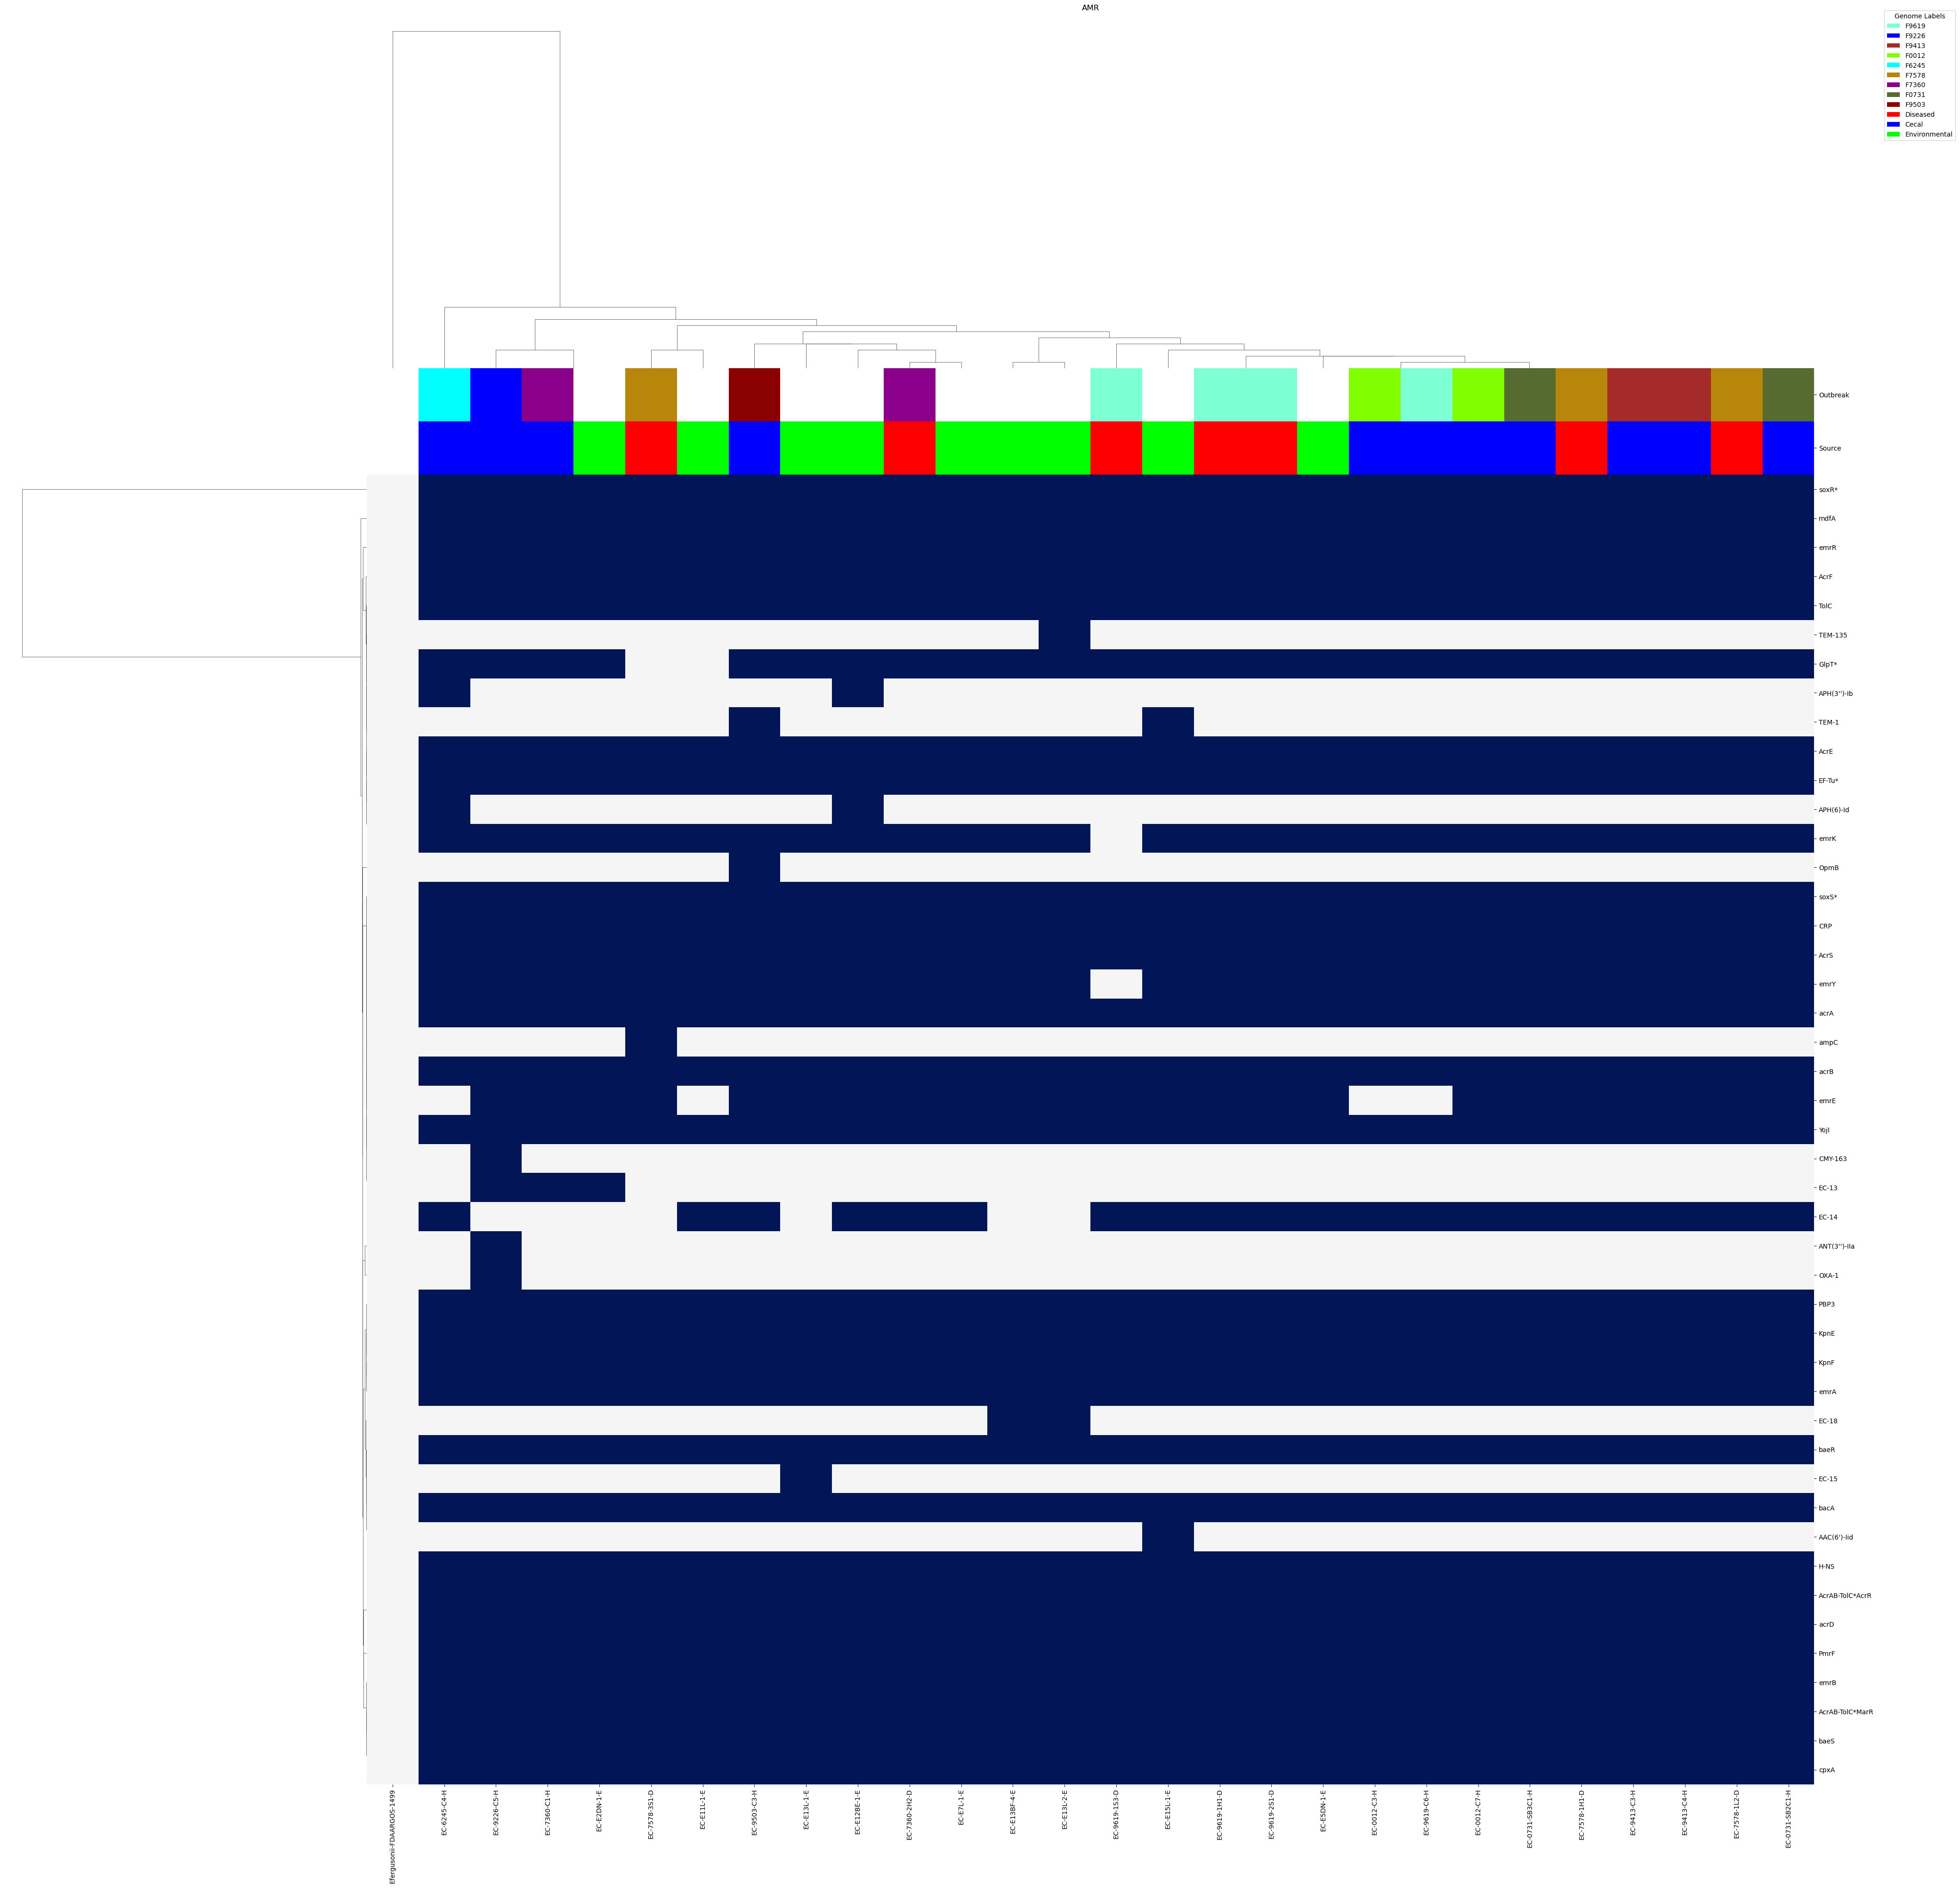

In [26]:
feature = 'AMR'
panel = 'a'

sel_pa = pa_B14
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmB1.index]

title = feature

#plot
handles = [Patch(facecolor=legend_cmap_B1[name]) for name in legend_cmap_B1]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_B1,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_B1, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_B1_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


In [27]:
#dmB2 = dmB2.drop(['EC-9619-3L1-D', 'EC-9619-3S1-D'], axis=1)
#dmB2 = dmB2.drop(['EC-9619-3L1-D', 'EC-9619-3S1-D'], axis=0)

# rename two columns
pa_B24 = pa_B24.rename(columns={'EC-9413-3L1-D': 'EC-9619-3L1-D', 'EC-9413-3S1-D': 'EC-9619-3S1-D'})

# rename two rows
pa_B24 = pa_B24.rename(index={'EC-9413-3L1-D': 'EC-9619-3L1-D', 'EC-9413-3S1-D': 'EC-9619-3S1-D'})

In [28]:
pa_B24

ANT(3'')-Ib  ANT(4')-IIb  AcrE  AcrF  AcrS   
Genome                                                                  
EC-0012-2L1-D                        0            0     1     1     1  \
EC-0038-1S2-D                        0            0     1     1     1   
EC-0038-2L3-D                        0            0     1     1     1   
EC-0038-3S2-D                        0            0     1     1     1   
EC-0205-C6-H                         1            0     1     1     1   
EC-0731-SB3C2-H                      0            0     1     1     1   
EC-4957-1H2-D                        0            0     1     1     1   
EC-4957-2L3-D                        0            0     1     1     1   
EC-8630-1H1-D                        0            0     1     1     1   
EC-8630-1L1-D                        0            1     1     1     1   
EC-8630-1S1-D                        0            0     1     1     1   
EC-8630-1S2-D                        0            0     1     1     1   
EC-9226-1H3-D                        0            0     1     1     1   
EC-9619-3L1-D                        1            0     1     1     1   
EC-9619-3S1-D                        1            0     1     1     1   
EC-9503-1H3-D                        1            0     1     1     1   
EC-9503-1L1-D                        1            0     1     1     1   
EC-9503-1S2-D                        1            0     1     1     1   
EC-9503-2H1-D                        1            0     1     1     1   
EC-9503-C1-H                         1            0     1     1     1   
EC-9503-C2-H                         1            0     1     1     1   
Efergusonii-FDAARGOS-1499            0            0     0     0     0   

                           CMY-132  CRP  EC-5  EC-8   
Genome                                                
EC-0012-2L1-D                    0    1     1     0  \
EC-0038-1S2-D                    0    1     1     0   
EC-0038-2L3-D                    0    1     1     0   
EC-0038-3S2-D                    0    1     1     0   
EC-0205-C6-H                     0    1     0     1   
EC-0731-SB3C2-H                  0    1     1     0   
EC-4957-1H2-D                    0    1     1     0   
EC-4957-2L3-D                    0    1     1     0   
EC-8630-1H1-D                    0    1     1     0   
EC-8630-1L1-D                    0    1     1     0   
EC-8630-1S1-D                    0    1     1     0   
EC-8630-1S2-D                    0    1     1     0   
EC-9226-1H3-D                    0    1     1     0   
EC-9619-3L1-D                    1    1     0     0   
EC-9619-3S1-D                    1    1     0     0   
EC-9503-1H3-D                    0    1     1     0   
EC-9503-1L1-D                    0    1     1     0   
EC-9503-1S2-D                    0    1     1     0   
EC-9503-2H1-D                    0    1     1     0   
EC-9503-C1-H                     0    1     1     0   
EC-9503-C2-H                     0    1     1     0   
Efergusonii-FDAARGOS-1499        0    0     0     0   

                           Escherichia coli 23S rRNA with mutation conferring resistance to erythromycin and telithromycin   
Genome                                                                                                                       
EC-0012-2L1-D                                                              0                                                \
EC-0038-1S2-D                                                              0                                                 
EC-0038-2L3-D                                                              0                                                 
EC-0038-3S2-D                                                              0                                                 
EC-0205-C6-H                                                               1                                                 
EC-0731-SB3C2-H                                                        

In [29]:
dmB2

EC-0012-2L1-D  EC-0038-1S2-D  EC-0038-2L3-D   
EC-9619-3L1-D                   0.019578   1.847514e-02   1.847514e-02  \
EC-9503-1H3-D                   0.018804   1.770126e-02   1.770126e-02   
EC-8630-1S2-D                   0.013178   2.316591e-03   2.316591e-03   
EC-0038-3S2-D                   0.013202   1.400000e-08   1.400000e-08   
EC-8630-1H1-D                   0.013178   2.316598e-03   2.316598e-03   
EC-4957-2L3-D                   0.013199   5.761000e-06   5.761000e-06   
EC-9503-C1-H                    0.018815   1.771214e-02   1.771214e-02   
EC-0012-2L1-D                   0.000000   1.320163e-02   1.320163e-02   
EC-0038-2L3-D                   0.013202   0.000000e+00   0.000000e+00   
EC-0731-SB3C2-H                 0.011728   1.396960e-02   1.396960e-02   
EC-9619-3S1-D                   0.019582   1.847881e-02   1.847881e-02   
EC-9503-1S2-D                   0.018804   1.770126e-02   1.770126e-02   
EC-9503-1L1-D                   0.018804   1.770126e-02   1.770126e-02   
EC-9503-2H1-D                   0.018804   1.770093e-02   1.770093e-02   
EC-9503-C2-H                    0.018804   1.770093e-02   1.770093e-02   
EC-4957-1H2-D                   0.013176   2.314923e-03   2.314923e-03   
Efergusonii-FDAARGOS-1499       0.138112   1.370092e-01   1.370092e-01   
EC-8630-1S1-D                   0.013178   2.316598e-03   2.316598e-03   
EC-9226-1H3-D                   0.000006   1.319721e-02   1.319721e-02   
EC-8630-1L1-D                   0.013194   2.333281e-03   2.333281e-03   
EC-0038-1S2-D                   0.013202   0.000000e+00   0.000000e+00   
EC-0205-C6-H                    0.031727   3.062393e-02   3.062393e-02   

                           EC-0038-3S2-D  EC-0205-C6-H  EC-0731-SB3C2-H   
EC-9619-3L1-D               1.847514e-02      0.029282         0.020346  \
EC-9503-1H3-D               1.770126e-02      0.028508         0.019572   
EC-8630-1S2-D               2.316591e-03      0.030600         0.013946   
EC-0038-3S2-D               0.000000e+00      0.030624         0.013970   
EC-8630-1H1-D               2.316598e-03      0.030600         0.013946   
EC-4957-2L3-D               5.761000e-06      0.030622         0.013967   
EC-9503-C1-H                1.771214e-02      0.028519         0.019583   
EC-0012-2L1-D               1.320163e-02      0.031727         0.011728   
EC-0038-2L3-D               1.400000e-08      0.030624         0.013970   
EC-0731-SB3C2-H             1.396960e-02      0.032495         0.000000   
EC-9619-3S1-D               1.847881e-02      0.029286         0.020350   
EC-9503-1S2-D               1.770126e-02      0.028508         0.019572   
EC-9503-1L1-D               1.770126e-02      0.028508         0.019572   
EC-9503-2H1-D               1.770093e-02      0.028508         0.019572   
EC-9503-C2-H                1.770093e-02      0.028508         0.019572   
EC-4957-1H2-D               2.314923e-03      0.030598         0.013944   
Efergusonii-FDAARGOS-1499   1.370092e-01      0.128801         0.138880   
EC-8630-1S1-D               2.316598e-03      0.030600         0.013946   
EC-9226-1H3-D               1.319721e-02      0.031722         0.011724   
EC-8630-1L1-D               2.333281e-03      0.030617         0.013962   
EC-0038-1S2-D               1.400000e-08      0.030624         0.013970   
EC-0205-C6-H                3.062393e-02      0.000000         0.032495   

                           EC-4957-1H2-D  EC-4957-2L3-D  EC-8630-1H1-D   
EC-9619-3L1-D                   0.018450       0.018473   1.845118e-02  \
EC-9503-1H3-D                   0.017676       0.017699   1.767730e-02   
EC-8630-1S2-D                   0.000010       0.002314   2.100000e-08   
EC-0038-3S2-D                   0.002315       0.000006   2.316598e-03   
EC-8630-1H1-D                   0.000010       0.002314   0.000000e+00   
EC-4957-2L3-D                   0.002313       0.000000   2.314215e-03   
EC-9503-C1-H                    0.017687       0.017710   1.768818e-02   
EC-001

In [30]:
sel_pa1 = pa_B24

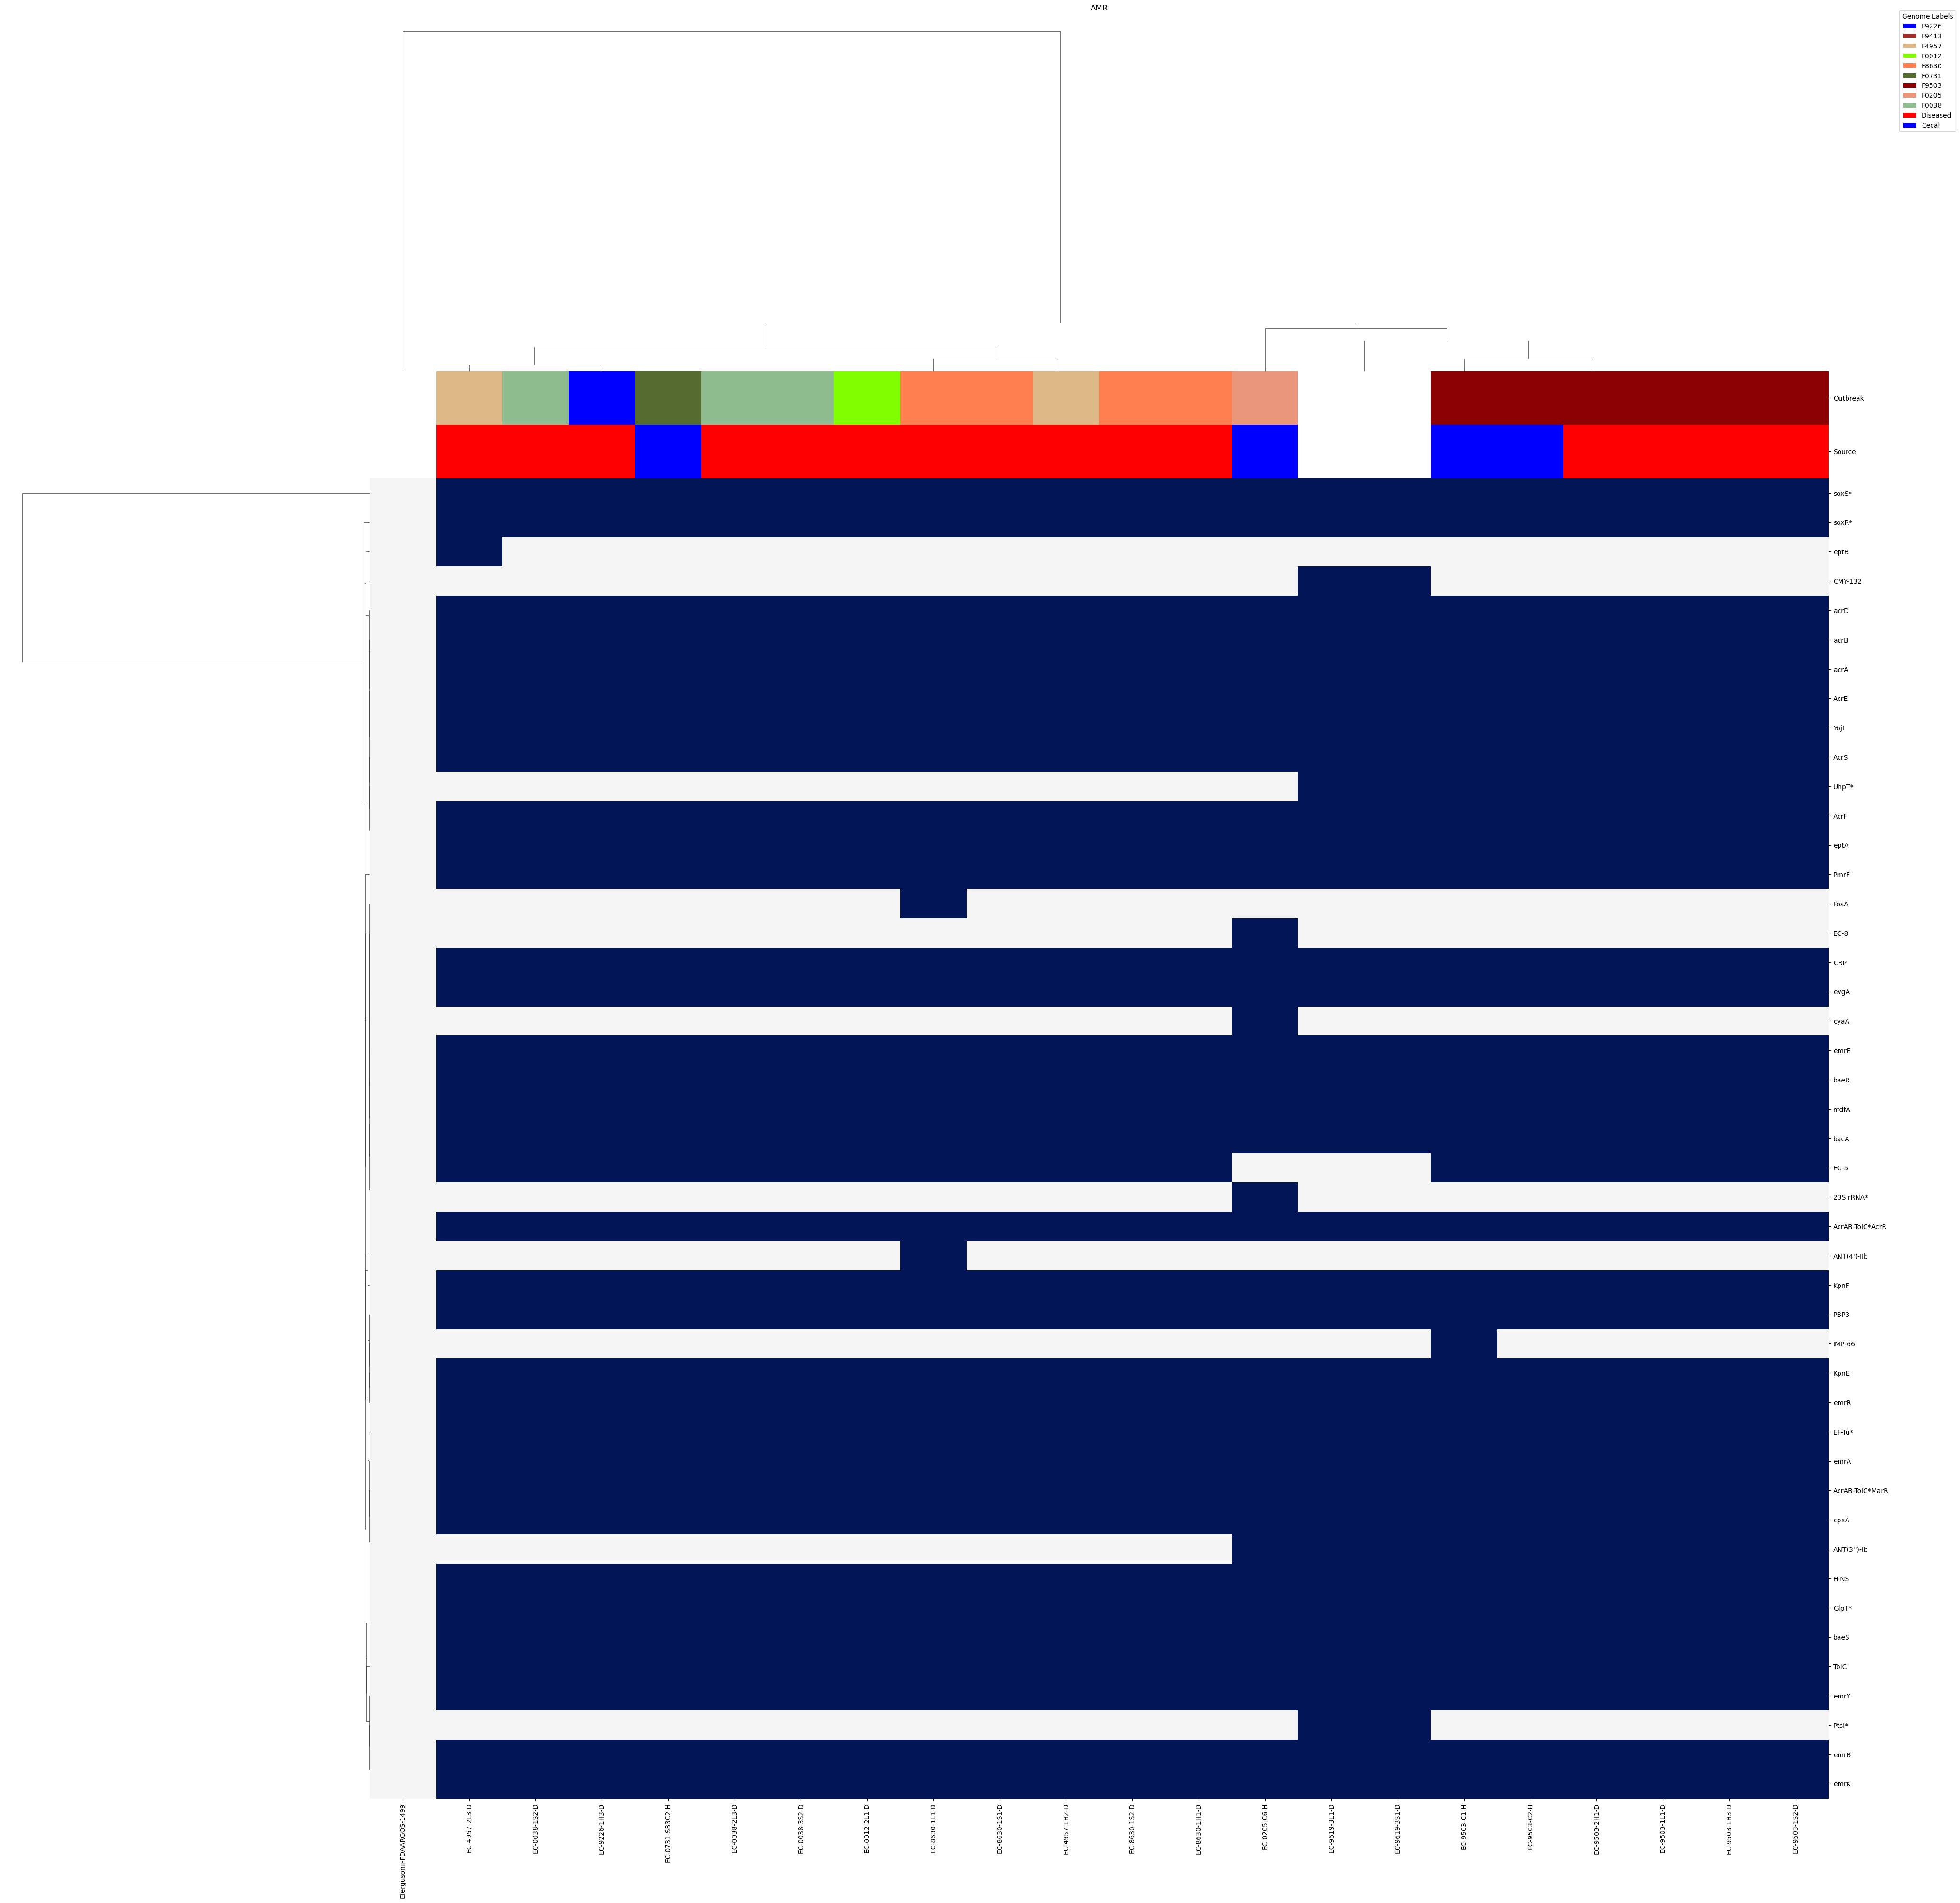

In [31]:
feature = 'AMR'
panel = 'a'

sel_pa1.rename(name_map, axis=1, inplace=True)
sel_pa1 = sel_pa1.T.loc[:,dmB2.index]
title = feature

#plot
handles = [Patch(facecolor=legend_cmap_B2[name]) for name in legend_cmap_B2]
g = sns.clustermap(data=sel_pa1, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_B2,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_B2, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_B2_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)



/tmp/ipykernel_206839/1384210959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


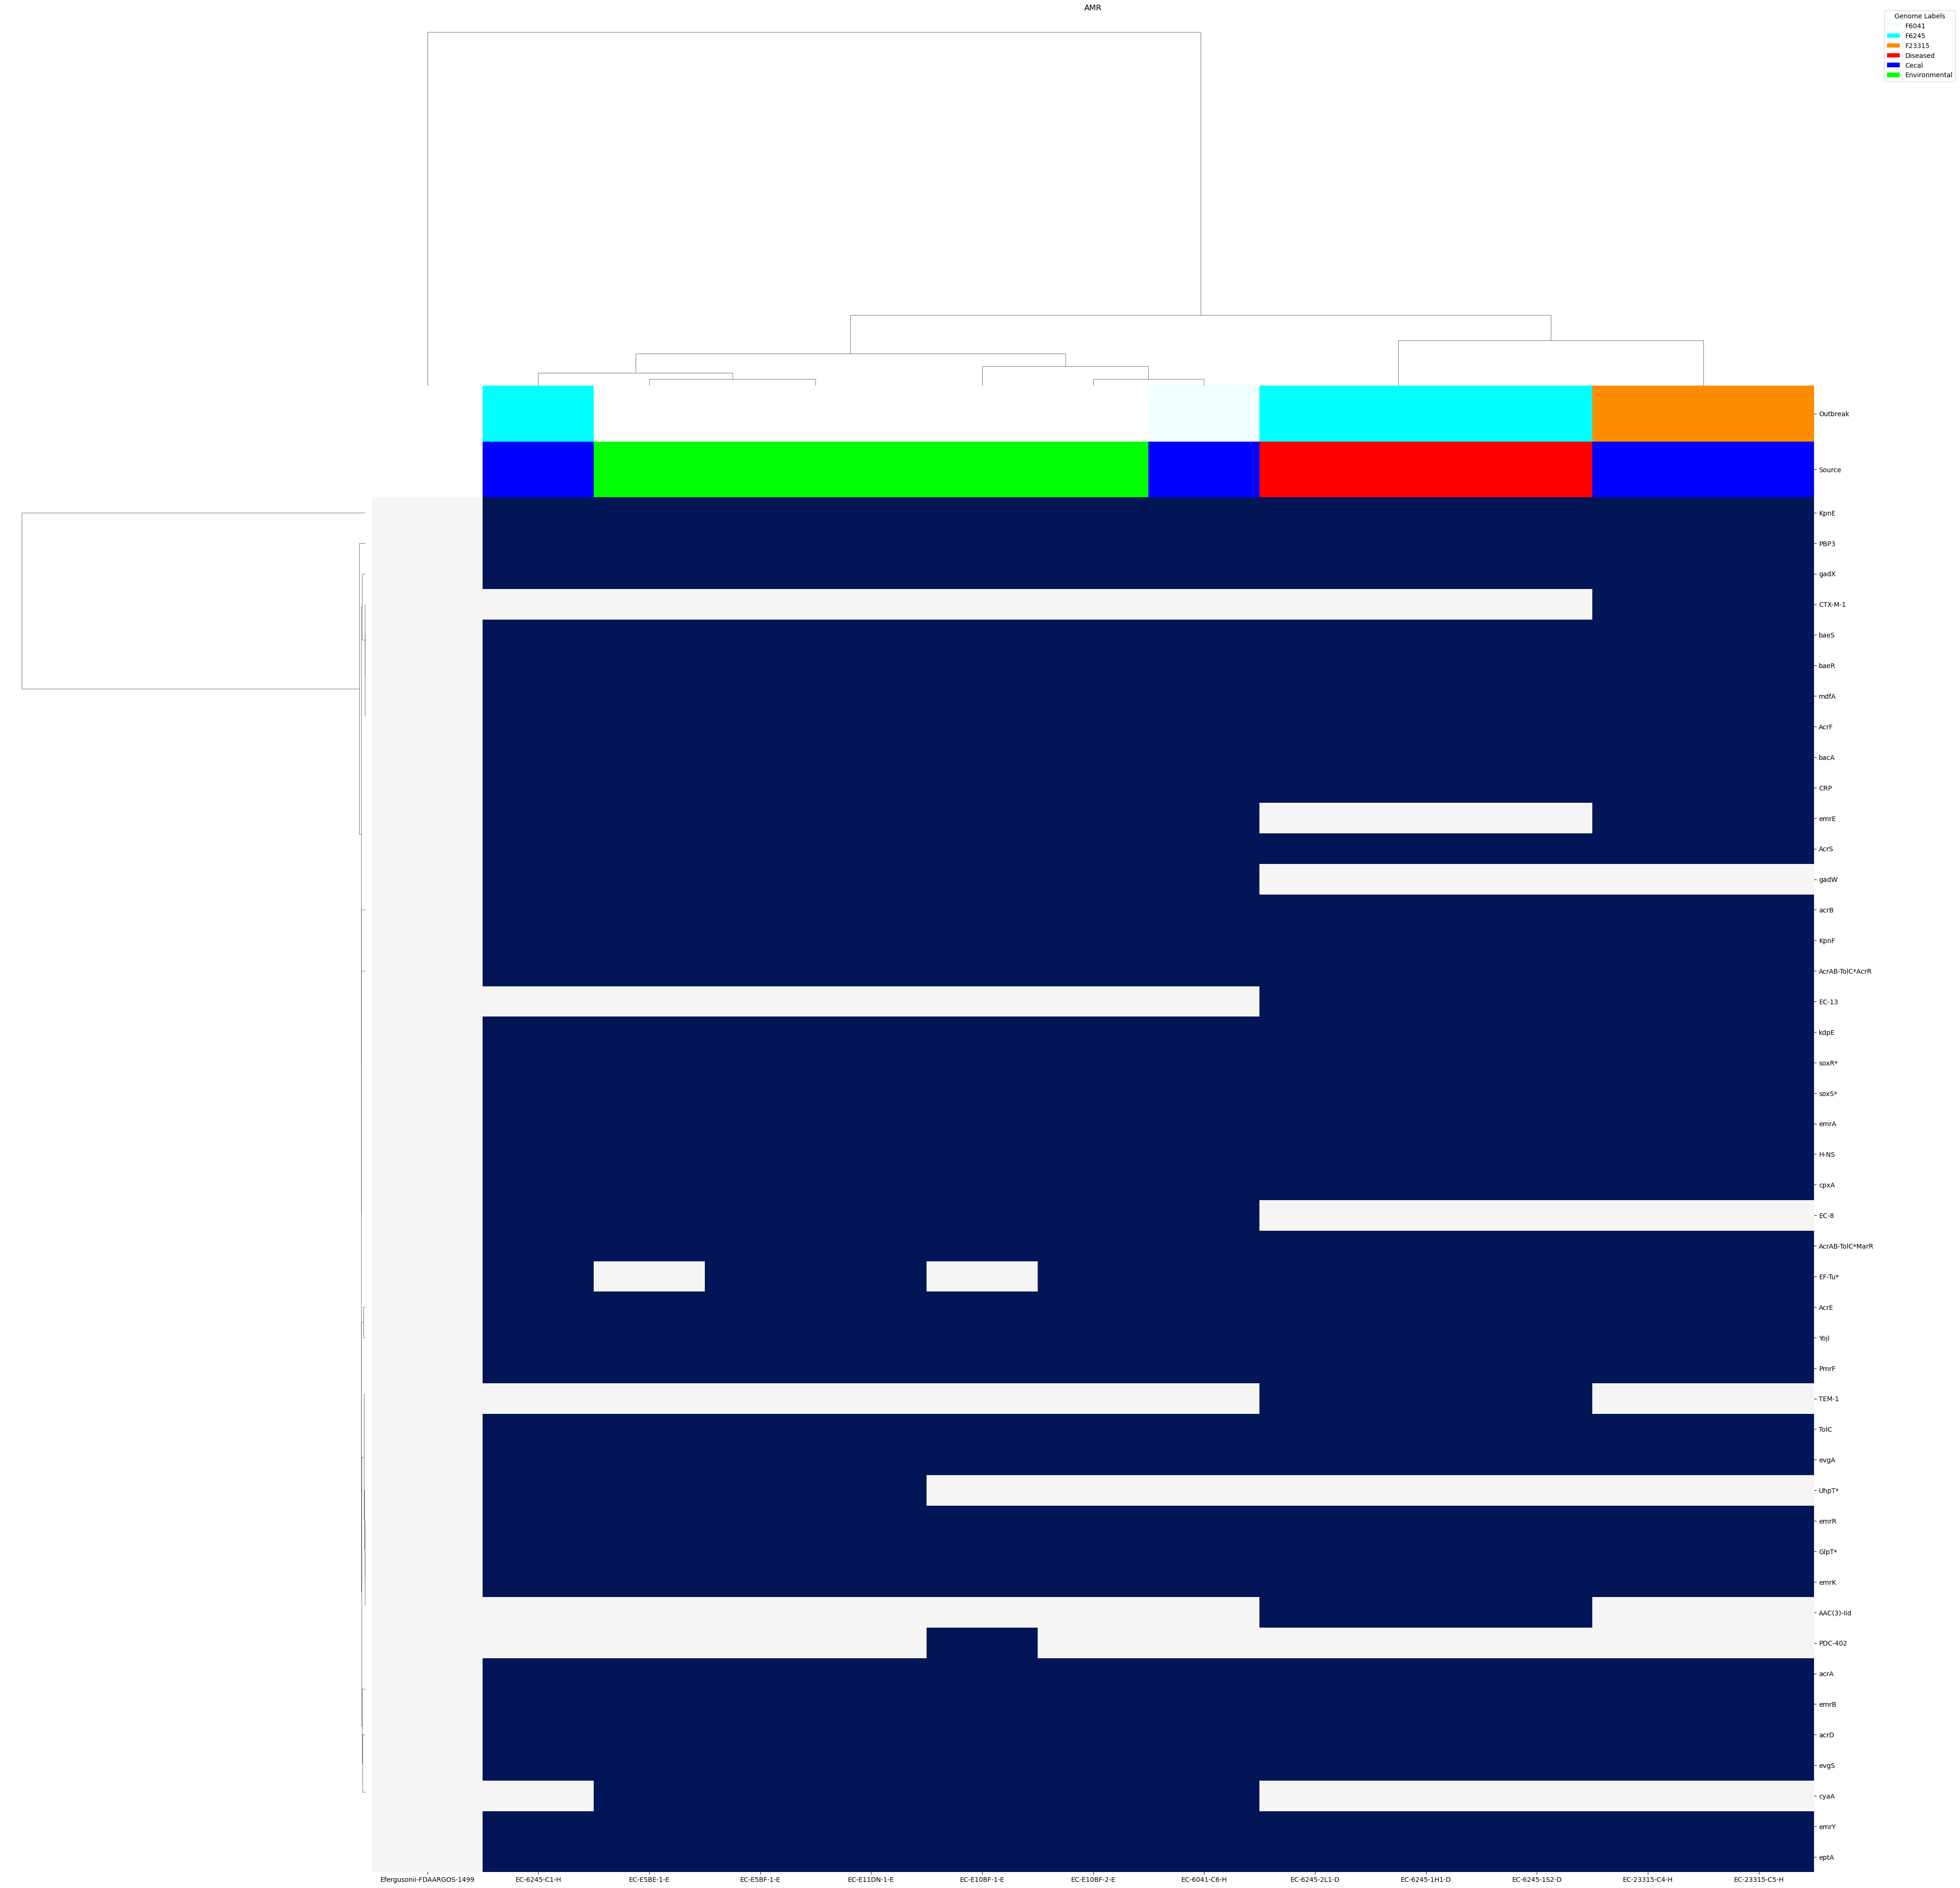

In [32]:
feature = 'AMR'
panel = 'a'

sel_pa = pa_C4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmC.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_C[name]) for name in legend_cmap_C]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_C,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_C, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_C_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/3491439719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


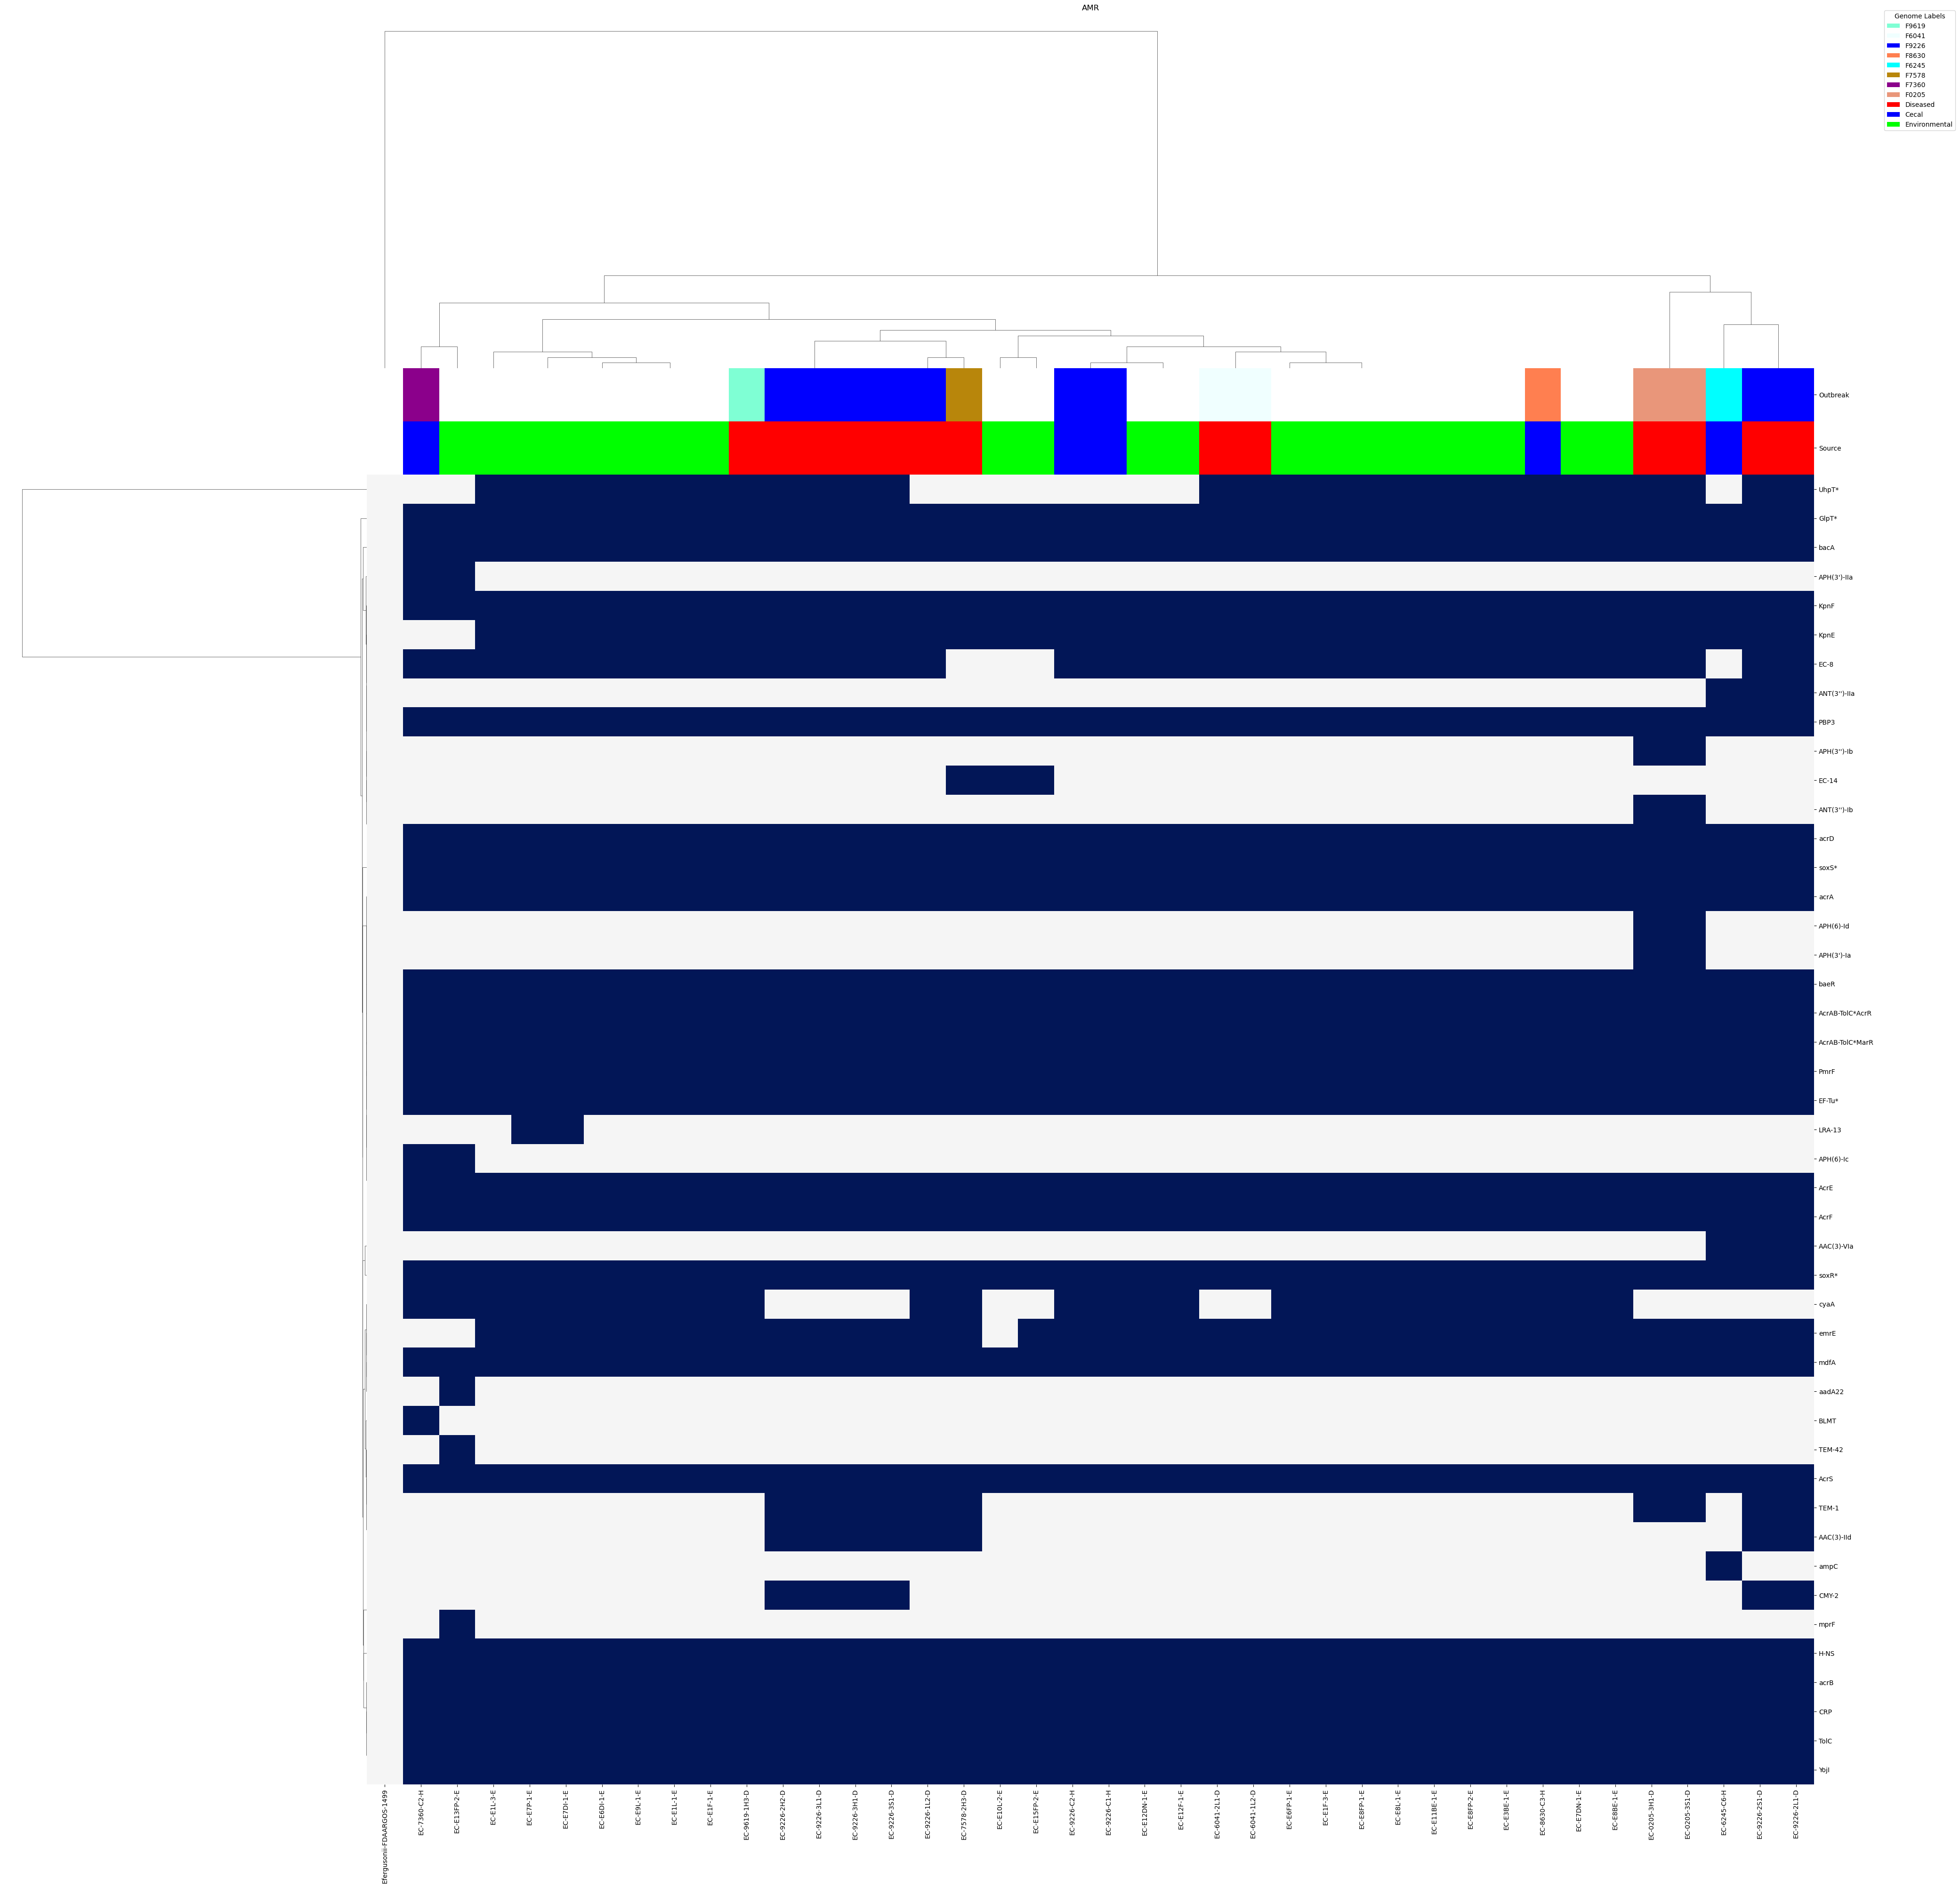

In [33]:
feature = 'AMR'
panel = 'a'

sel_pa = pa_D4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmD.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_D[name]) for name in legend_cmap_D]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_D,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_D, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_D_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/2435934206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


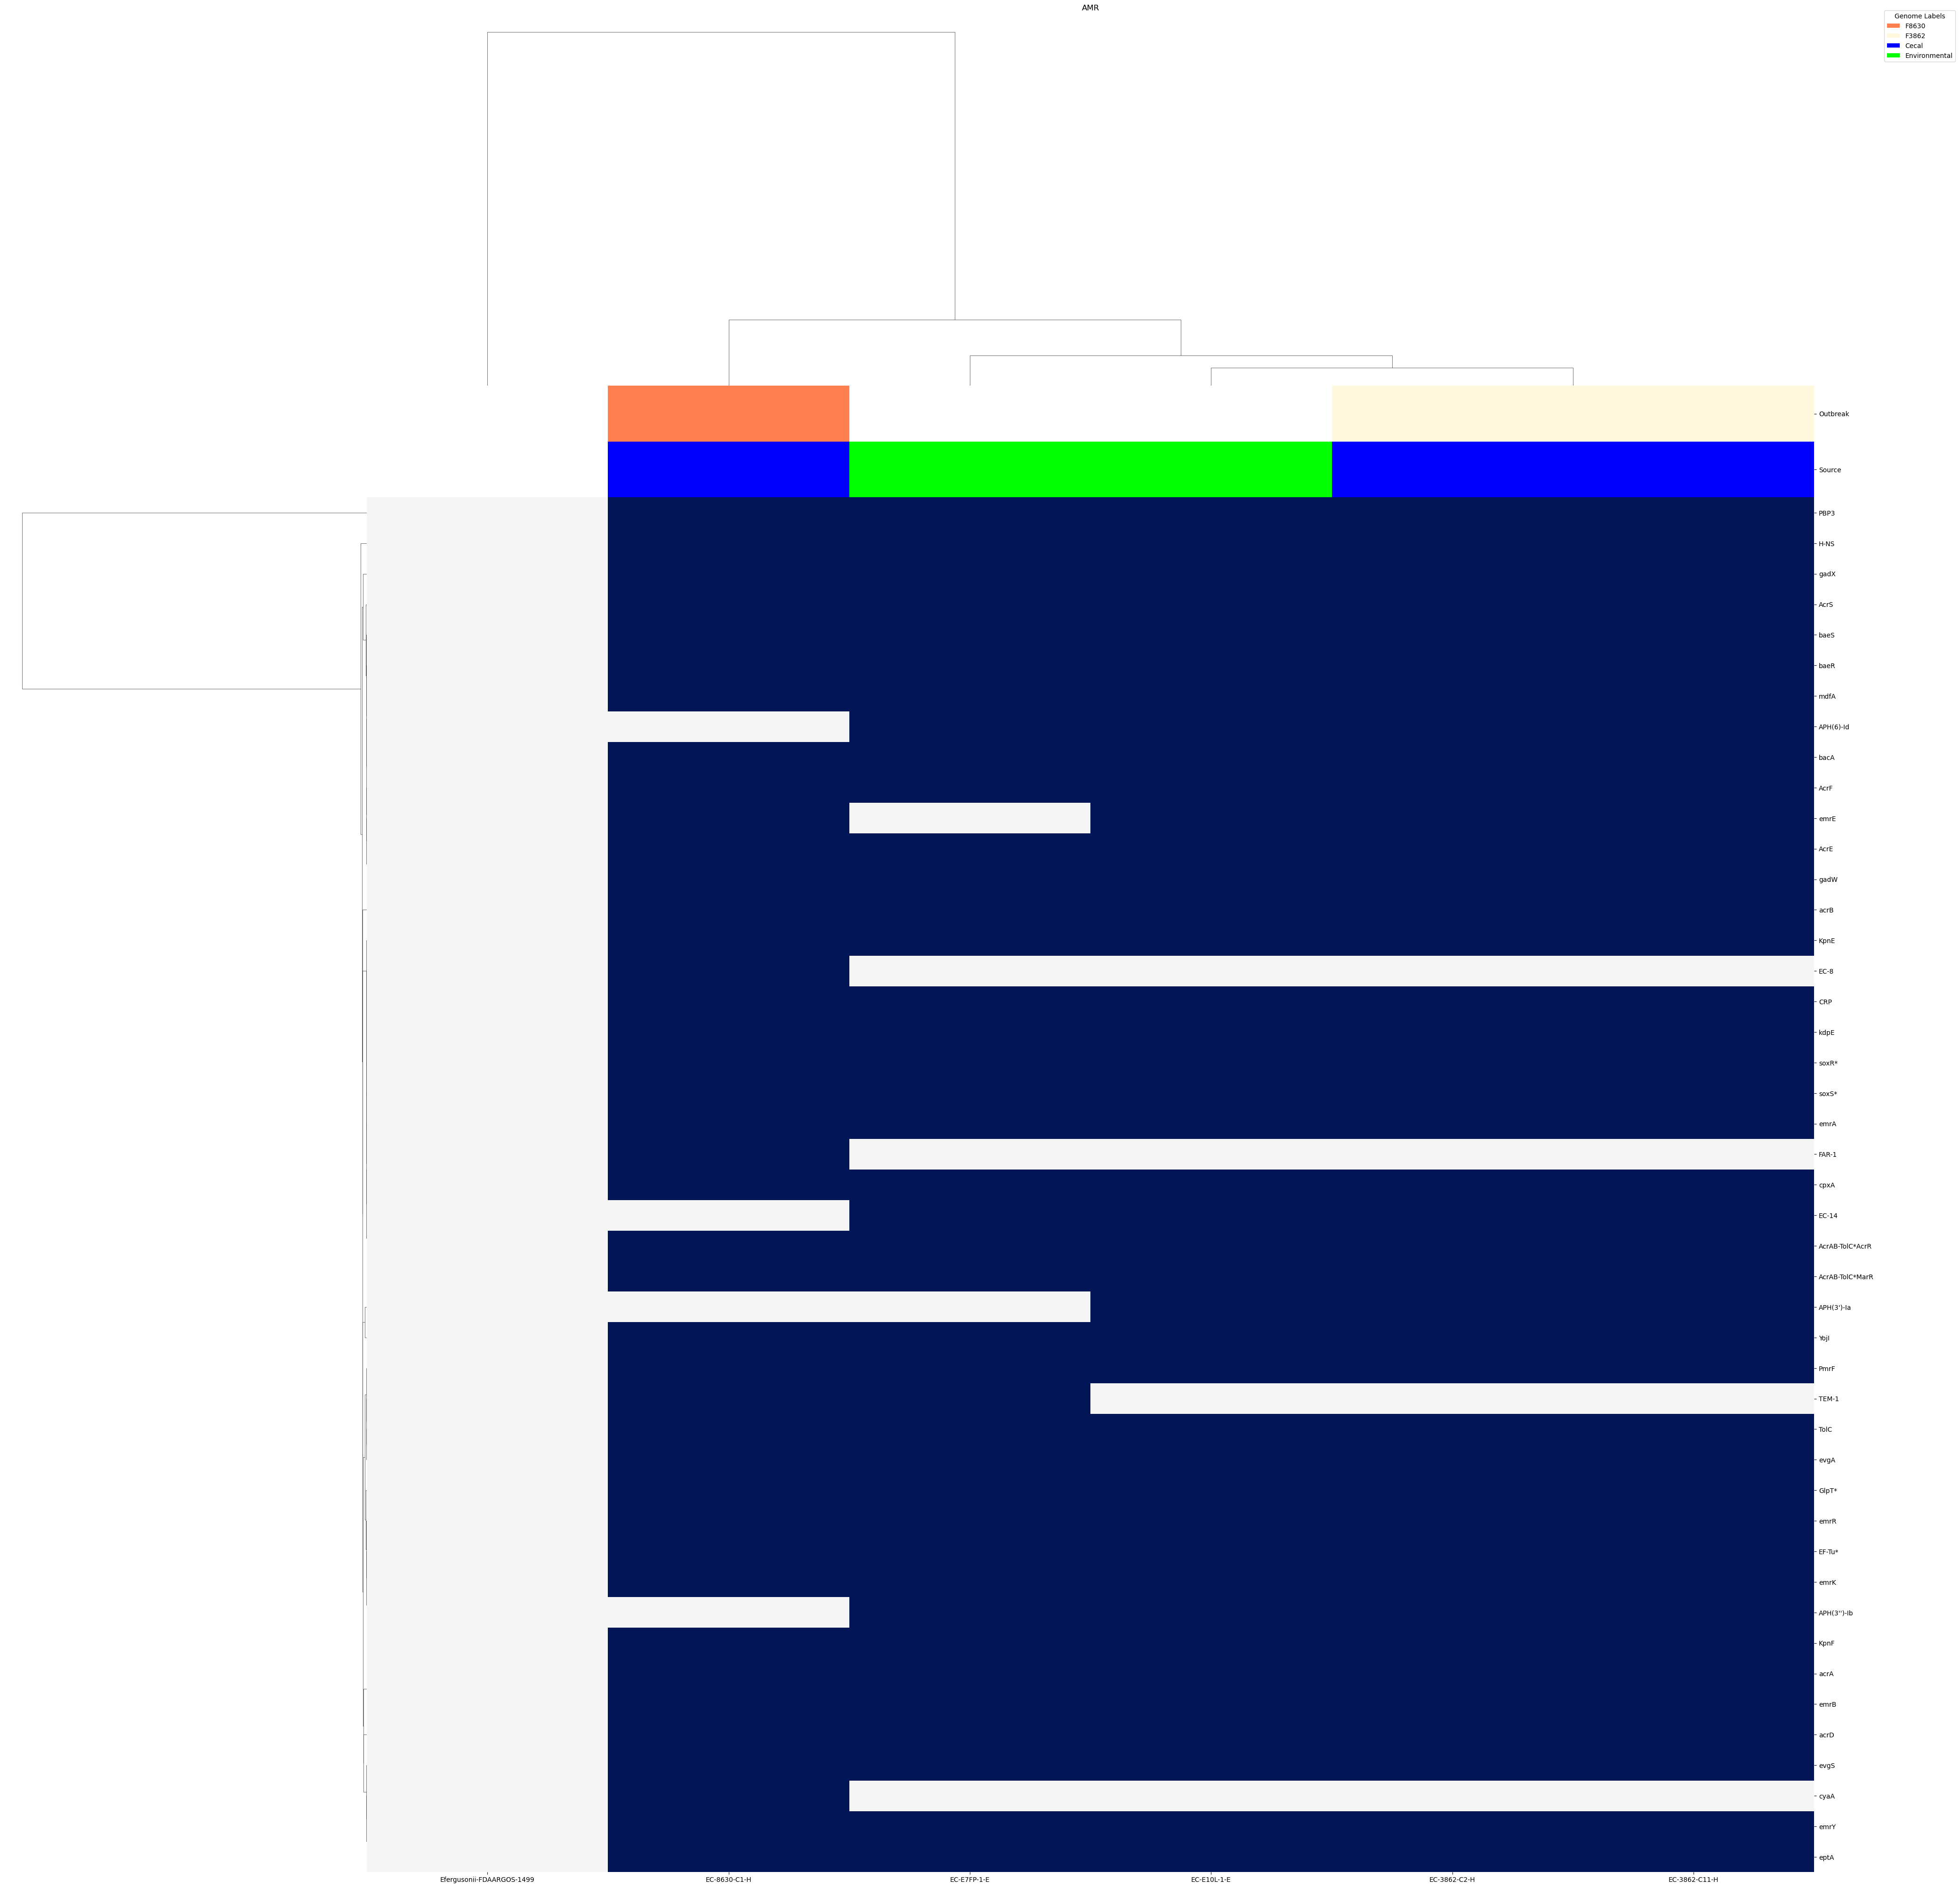

In [34]:
feature = 'AMR'
panel = 'a'

sel_pa = pa_E4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmE.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_E[name]) for name in legend_cmap_E]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_E,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_E, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_E_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/2672565671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


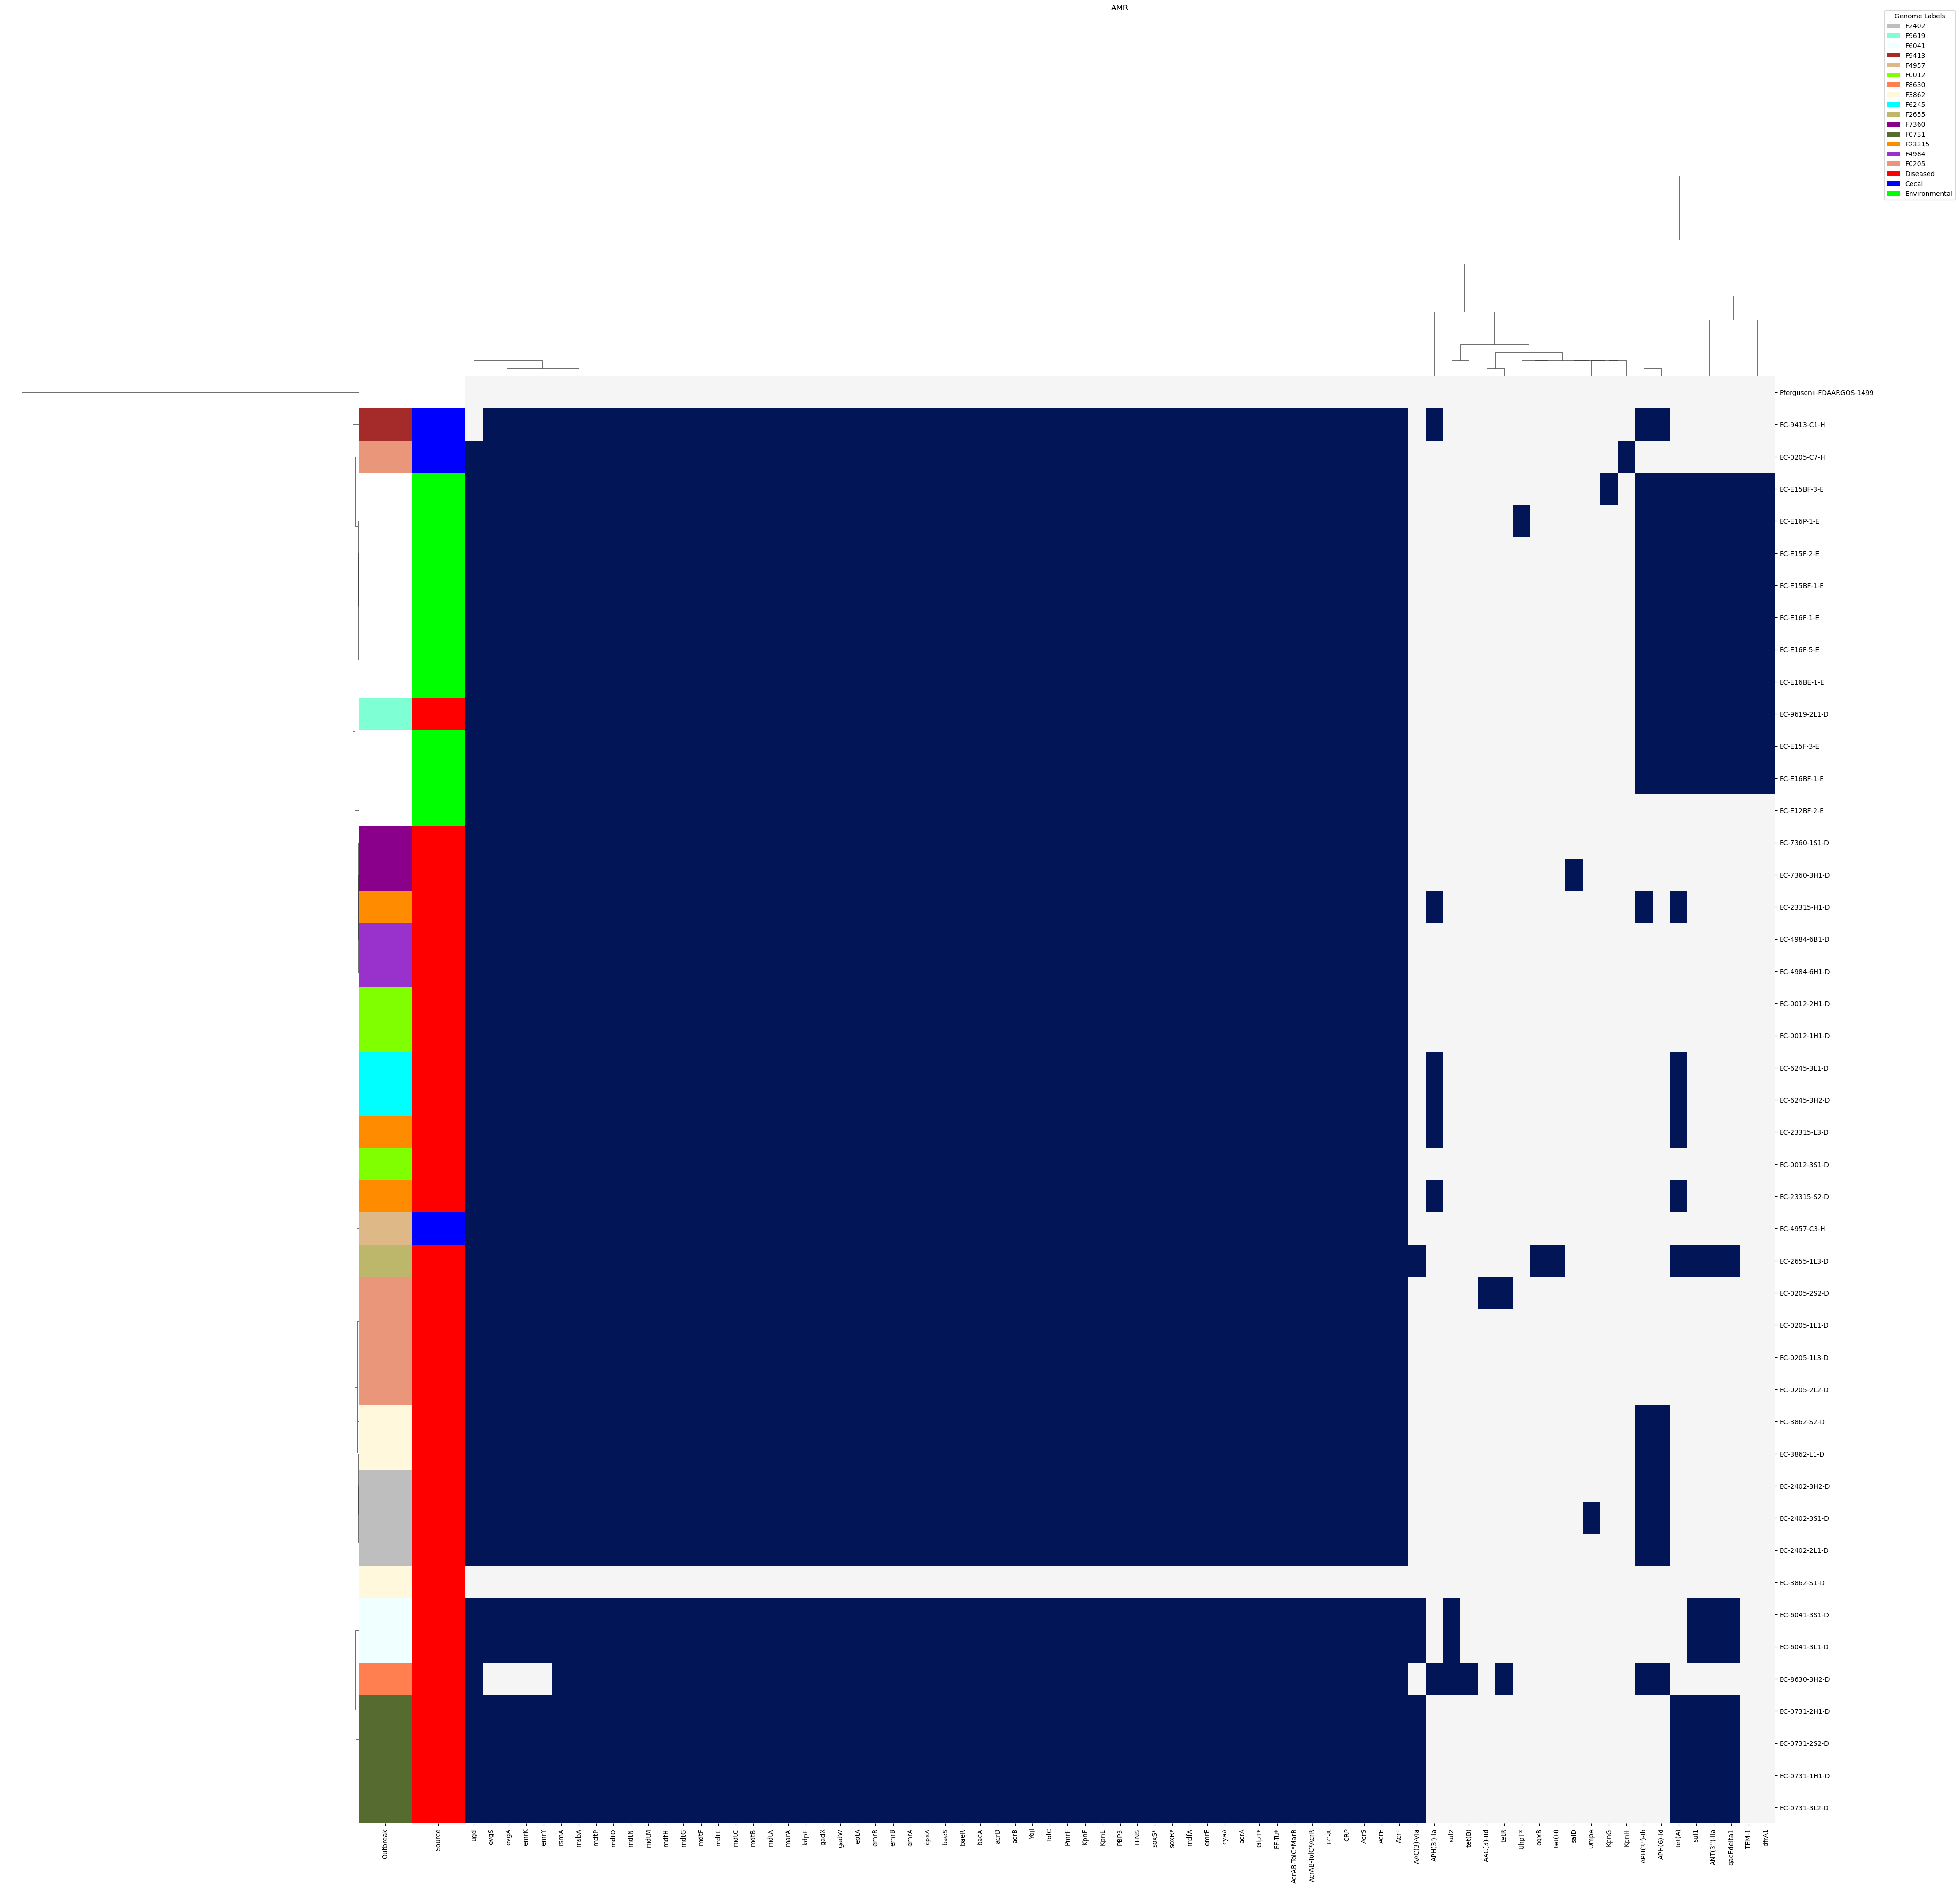

In [35]:
feature = 'AMR'
panel = 'a'

sel_pa = pa_G4
sel_pa.rename(name_map, axis=1, inplace=True)
#sel_pa = sel_pa.T.loc[:, dmE.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_G[name]) for name in legend_cmap_G]
g = sns.clustermap(data=sel_pa.loc[dmG.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors_G,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_G, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04292023_G_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

In [36]:
##Virulence Heatmaps

In [37]:
vpa = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02072023_EcoliARETE_VFDB_filtered80_crosstab_gene_name.csv")

In [38]:
vpa = vpa.set_index("Isolate_Pathname")

In [39]:
vpa.index = vpa.index.str.replace('_','-')

In [40]:
merged_A = pd.merge(genome_labels_A, vpa, left_index=True, right_index=True, how='left')
merged_A = merged_A.drop(['Outbreak', 'Source'], axis=1)
merged_B1 = pd.merge(genome_labels_B1, vpa, left_index=True, right_index=True, how='left')
merged_B1 = merged_B1.drop(['Outbreak', 'Source'], axis=1)
merged_B2 = pd.merge(genome_labels_B2, vpa, left_index=True, right_index=True, how='left')
merged_B2 = merged_B2.drop(['Outbreak', 'Source'], axis=1)
merged_C = pd.merge(genome_labels_C, vpa, left_index=True, right_index=True, how='left')
merged_C = merged_C.drop(['Outbreak', 'Source'], axis=1)
merged_D = pd.merge(genome_labels_D, vpa, left_index=True, right_index=True, how='left')
merged_D = merged_D.drop(['Outbreak', 'Source'], axis=1)
merged_E = pd.merge(genome_labels_E, vpa, left_index=True, right_index=True, how='left')
merged_E = merged_E.drop(['Outbreak', 'Source'], axis=1)
merged_G = pd.merge(genome_labels_G, vpa, left_index=True, right_index=True, how='left')
merged_G = merged_G.drop(['Outbreak', 'Source'], axis=1)

In [41]:
vpa_A1 = merged_A.fillna(0)
vpa_A2 = vpa_A1.drop('All', axis=1)
vpa_A3 = vpa_A2.ge(0.5).astype(int)
vpa_A3.index = vpa_A3.index.str.replace(' ','-')
vpa_A3.index = vpa_A3.index.str.replace('_', '-')
vpa_A4 = vpa_A3.loc[:, (vpa_A3 != 0).any(axis=0)]

vpa_B11 = merged_B1.fillna(0)
vpa_B12 = vpa_B11.drop('All', axis=1)
vpa_B13 = vpa_B12.ge(0.5).astype(int)
vpa_B13.index = vpa_B13.index.str.replace(' ','-')
vpa_B13.index = vpa_B13.index.str.replace('_', '-')
vpa_B14 = vpa_B13.loc[:, (vpa_B13 != 0).any(axis=0)]


vpa_B21 = merged_B2.fillna(0)
vpa_B22 = vpa_B21.drop('All', axis=1)
vpa_B23 = vpa_B22.ge(0.5).astype(int)
vpa_B23.index = vpa_B23.index.str.replace(' ','-')
vpa_B23.index = vpa_B23.index.str.replace('_', '-')
vpa_B24 = vpa_B23.loc[:, (vpa_B23 != 0).any(axis=0)]


vpa_C1 = merged_C.fillna(0)
vpa_C2 = vpa_C1.drop('All', axis=1)
vpa_C3 = vpa_C2.ge(0.5).astype(int)
vpa_C3.index = vpa_C3.index.str.replace(' ','-')
vpa_C3.index = vpa_C3.index.str.replace('_', '-')
vpa_C4 = vpa_C3.loc[:, (vpa_C3 != 0).any(axis=0)]


vpa_D1 = merged_D.fillna(0)
vpa_D2 = vpa_D1.drop('All', axis=1)
vpa_D3 = vpa_D2.ge(0.5).astype(int)
vpa_D3.index = vpa_D3.index.str.replace(' ','-')
vpa_D3.index = vpa_D3.index.str.replace('_', '-')
vpa_D4 = vpa_D3.loc[:, (vpa_D3 != 0).any(axis=0)]


vpa_E1 = merged_E.fillna(0)
vpa_E2 = vpa_E1.drop('All', axis=1)
vpa_E3 = vpa_E2.ge(0.5).astype(int)
vpa_E3.index = vpa_E3.index.str.replace(' ','-')
vpa_E3.index = vpa_E3.index.str.replace('_', '-')
vpa_E4 = vpa_E3.loc[:, (vpa_E3 != 0).any(axis=0)]


vpa_G1 = merged_G.fillna(0)
vpa_G2 = vpa_G1.drop('All', axis=1)
vpa_G3 = vpa_G2.ge(0.5).astype(int)
vpa_G3.index = vpa_G3.index.str.replace(' ','-')
vpa_G3.index = vpa_G3.index.str.replace('_', '-')
vpa_G4 = vpa_G3.loc[:, (vpa_G3 != 0).any(axis=0)]

In [42]:
# rename two columns
vpa_B24 = vpa_B24.rename(columns={'EC-9413-3L1-D': 'EC-9619-3L1-D', 'EC-9413-3S1-D': 'EC-9619-3S1-D'})

# rename two rows
vpa_B24 = vpa_B24.rename(index={'EC-9413-3L1-D': 'EC-9619-3L1-D', 'EC-9413-3S1-D': 'EC-9619-3S1-D'})

/tmp/ipykernel_206839/3260891973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


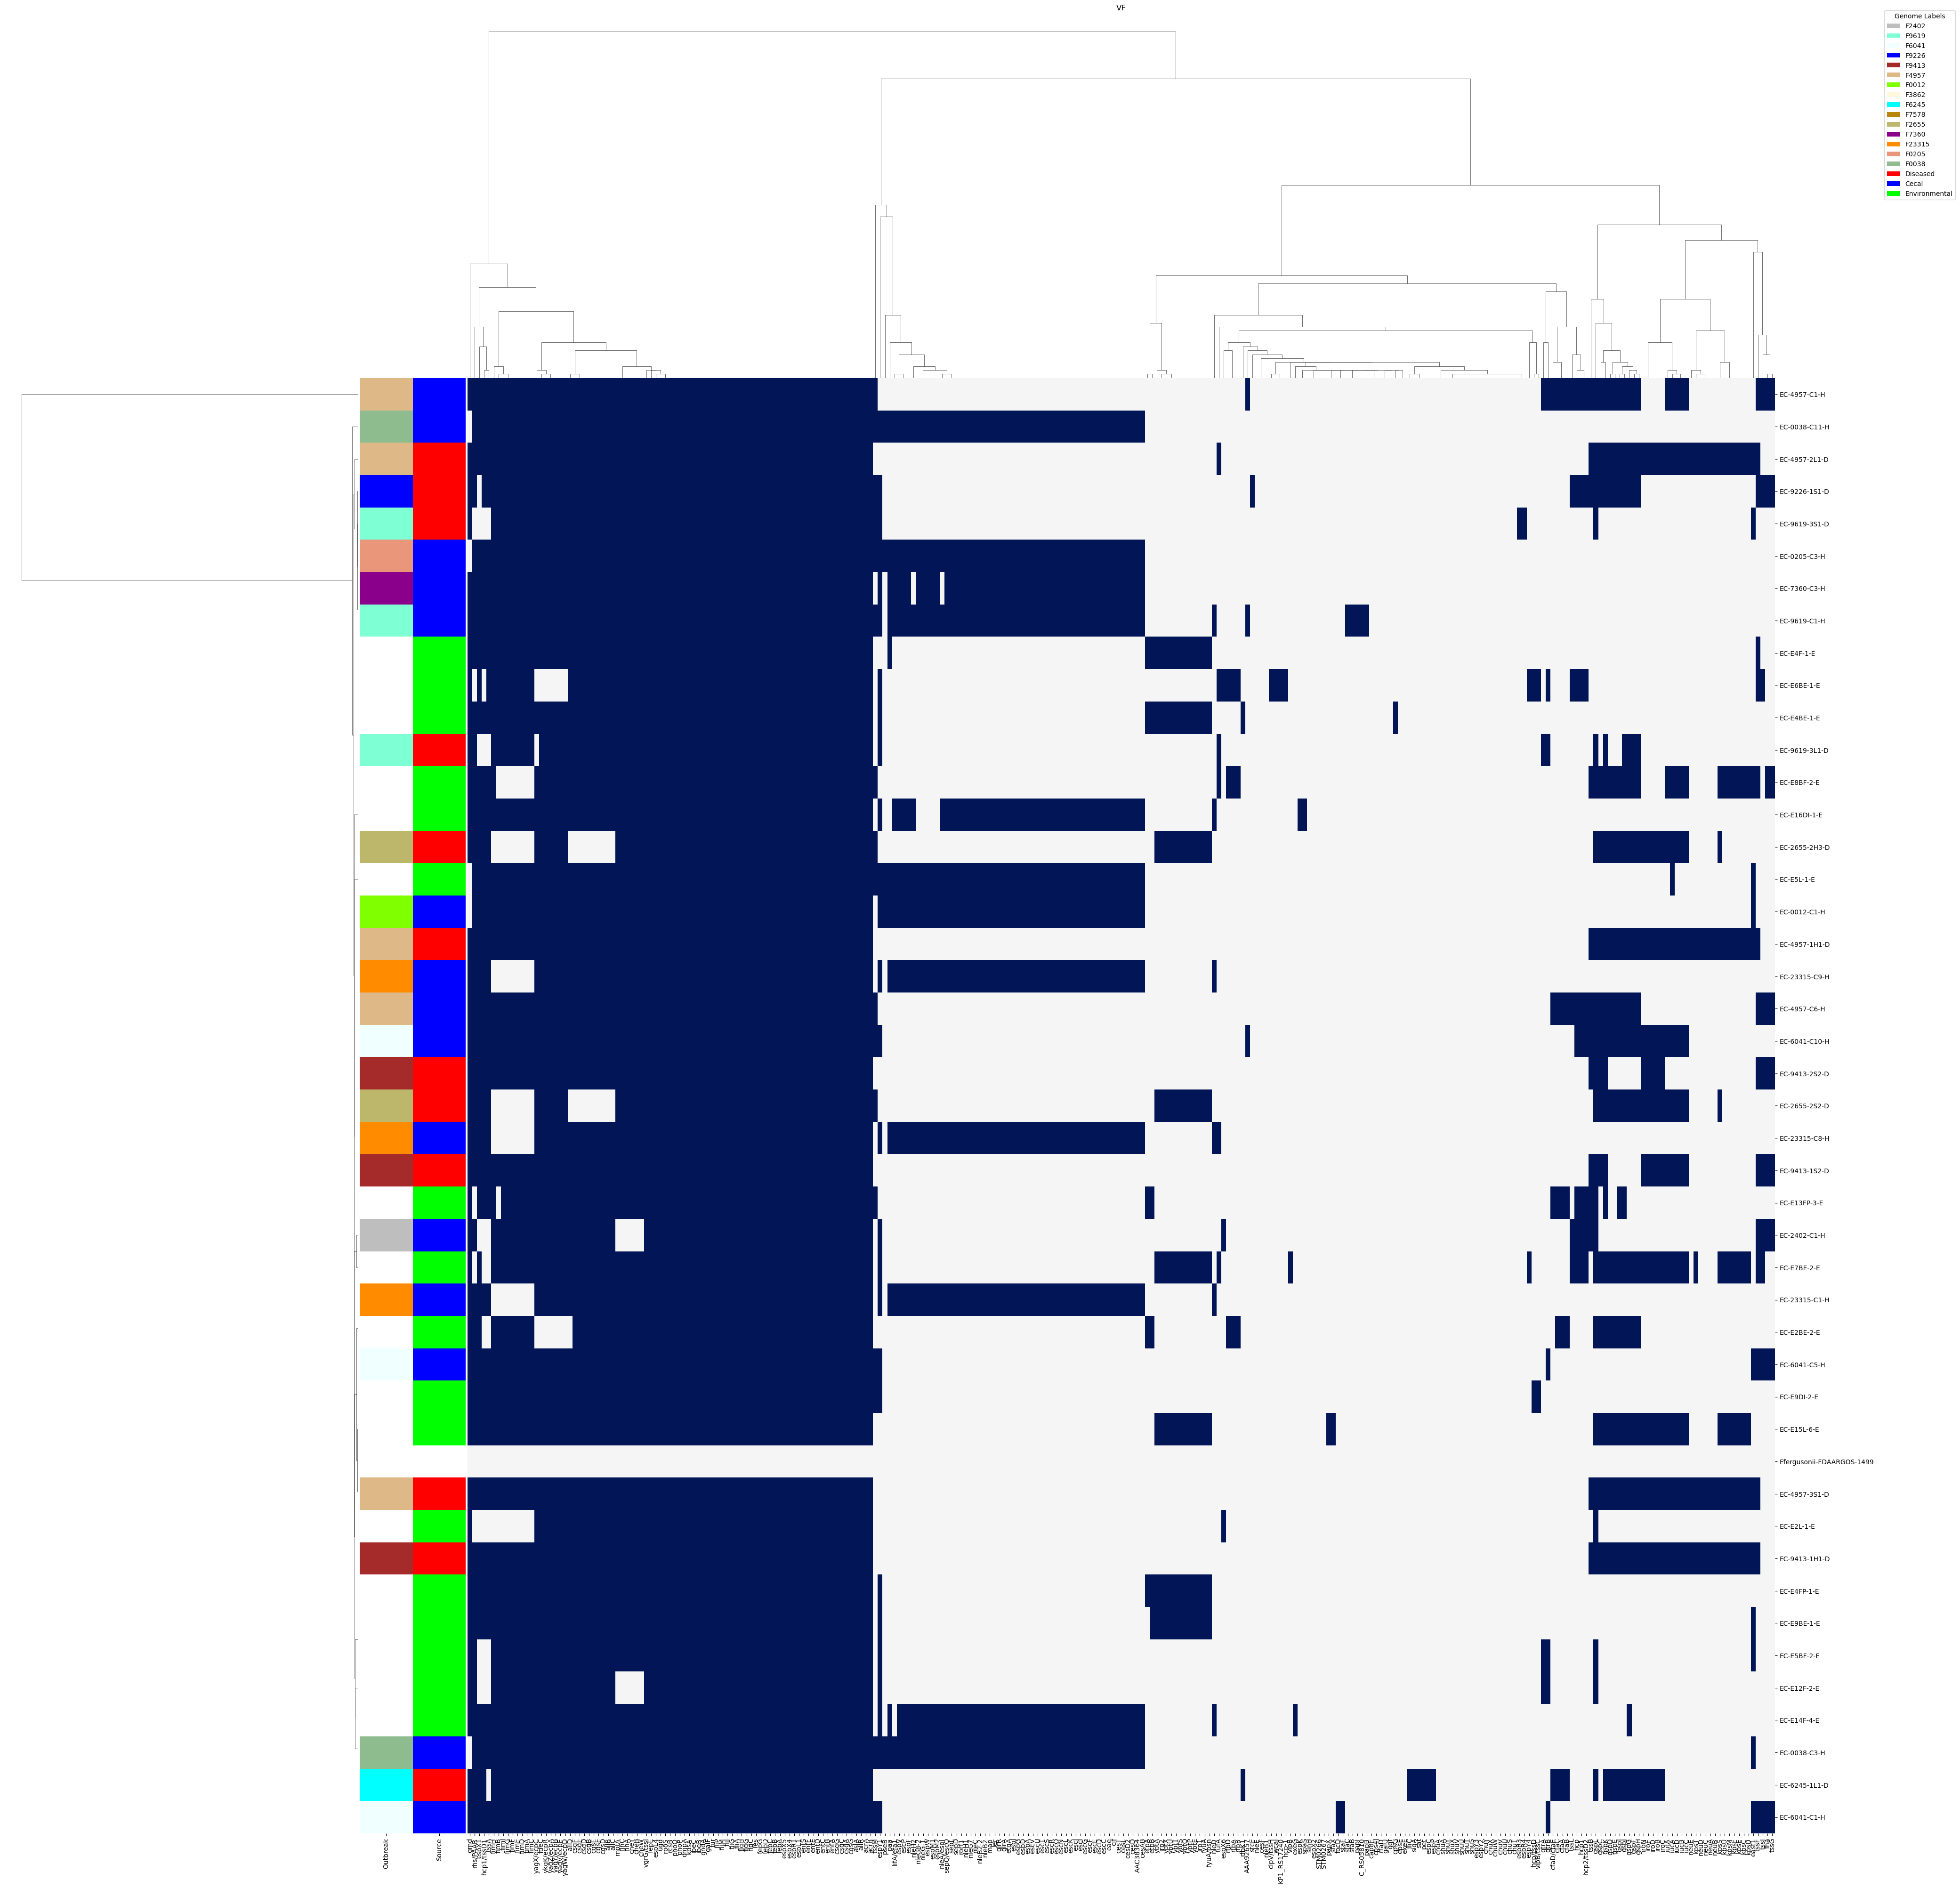

In [43]:
feature = 'VF'
panel = 'a'

sel_pa = vpa_A4
sel_pa.rename(name_map, axis=1, inplace=True)

title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_A[name]) for name in legend_cmap_A]
g = sns.clustermap(data=sel_pa.loc[dmA.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors_A,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_A, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_A_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


/tmp/ipykernel_206839/61621890.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


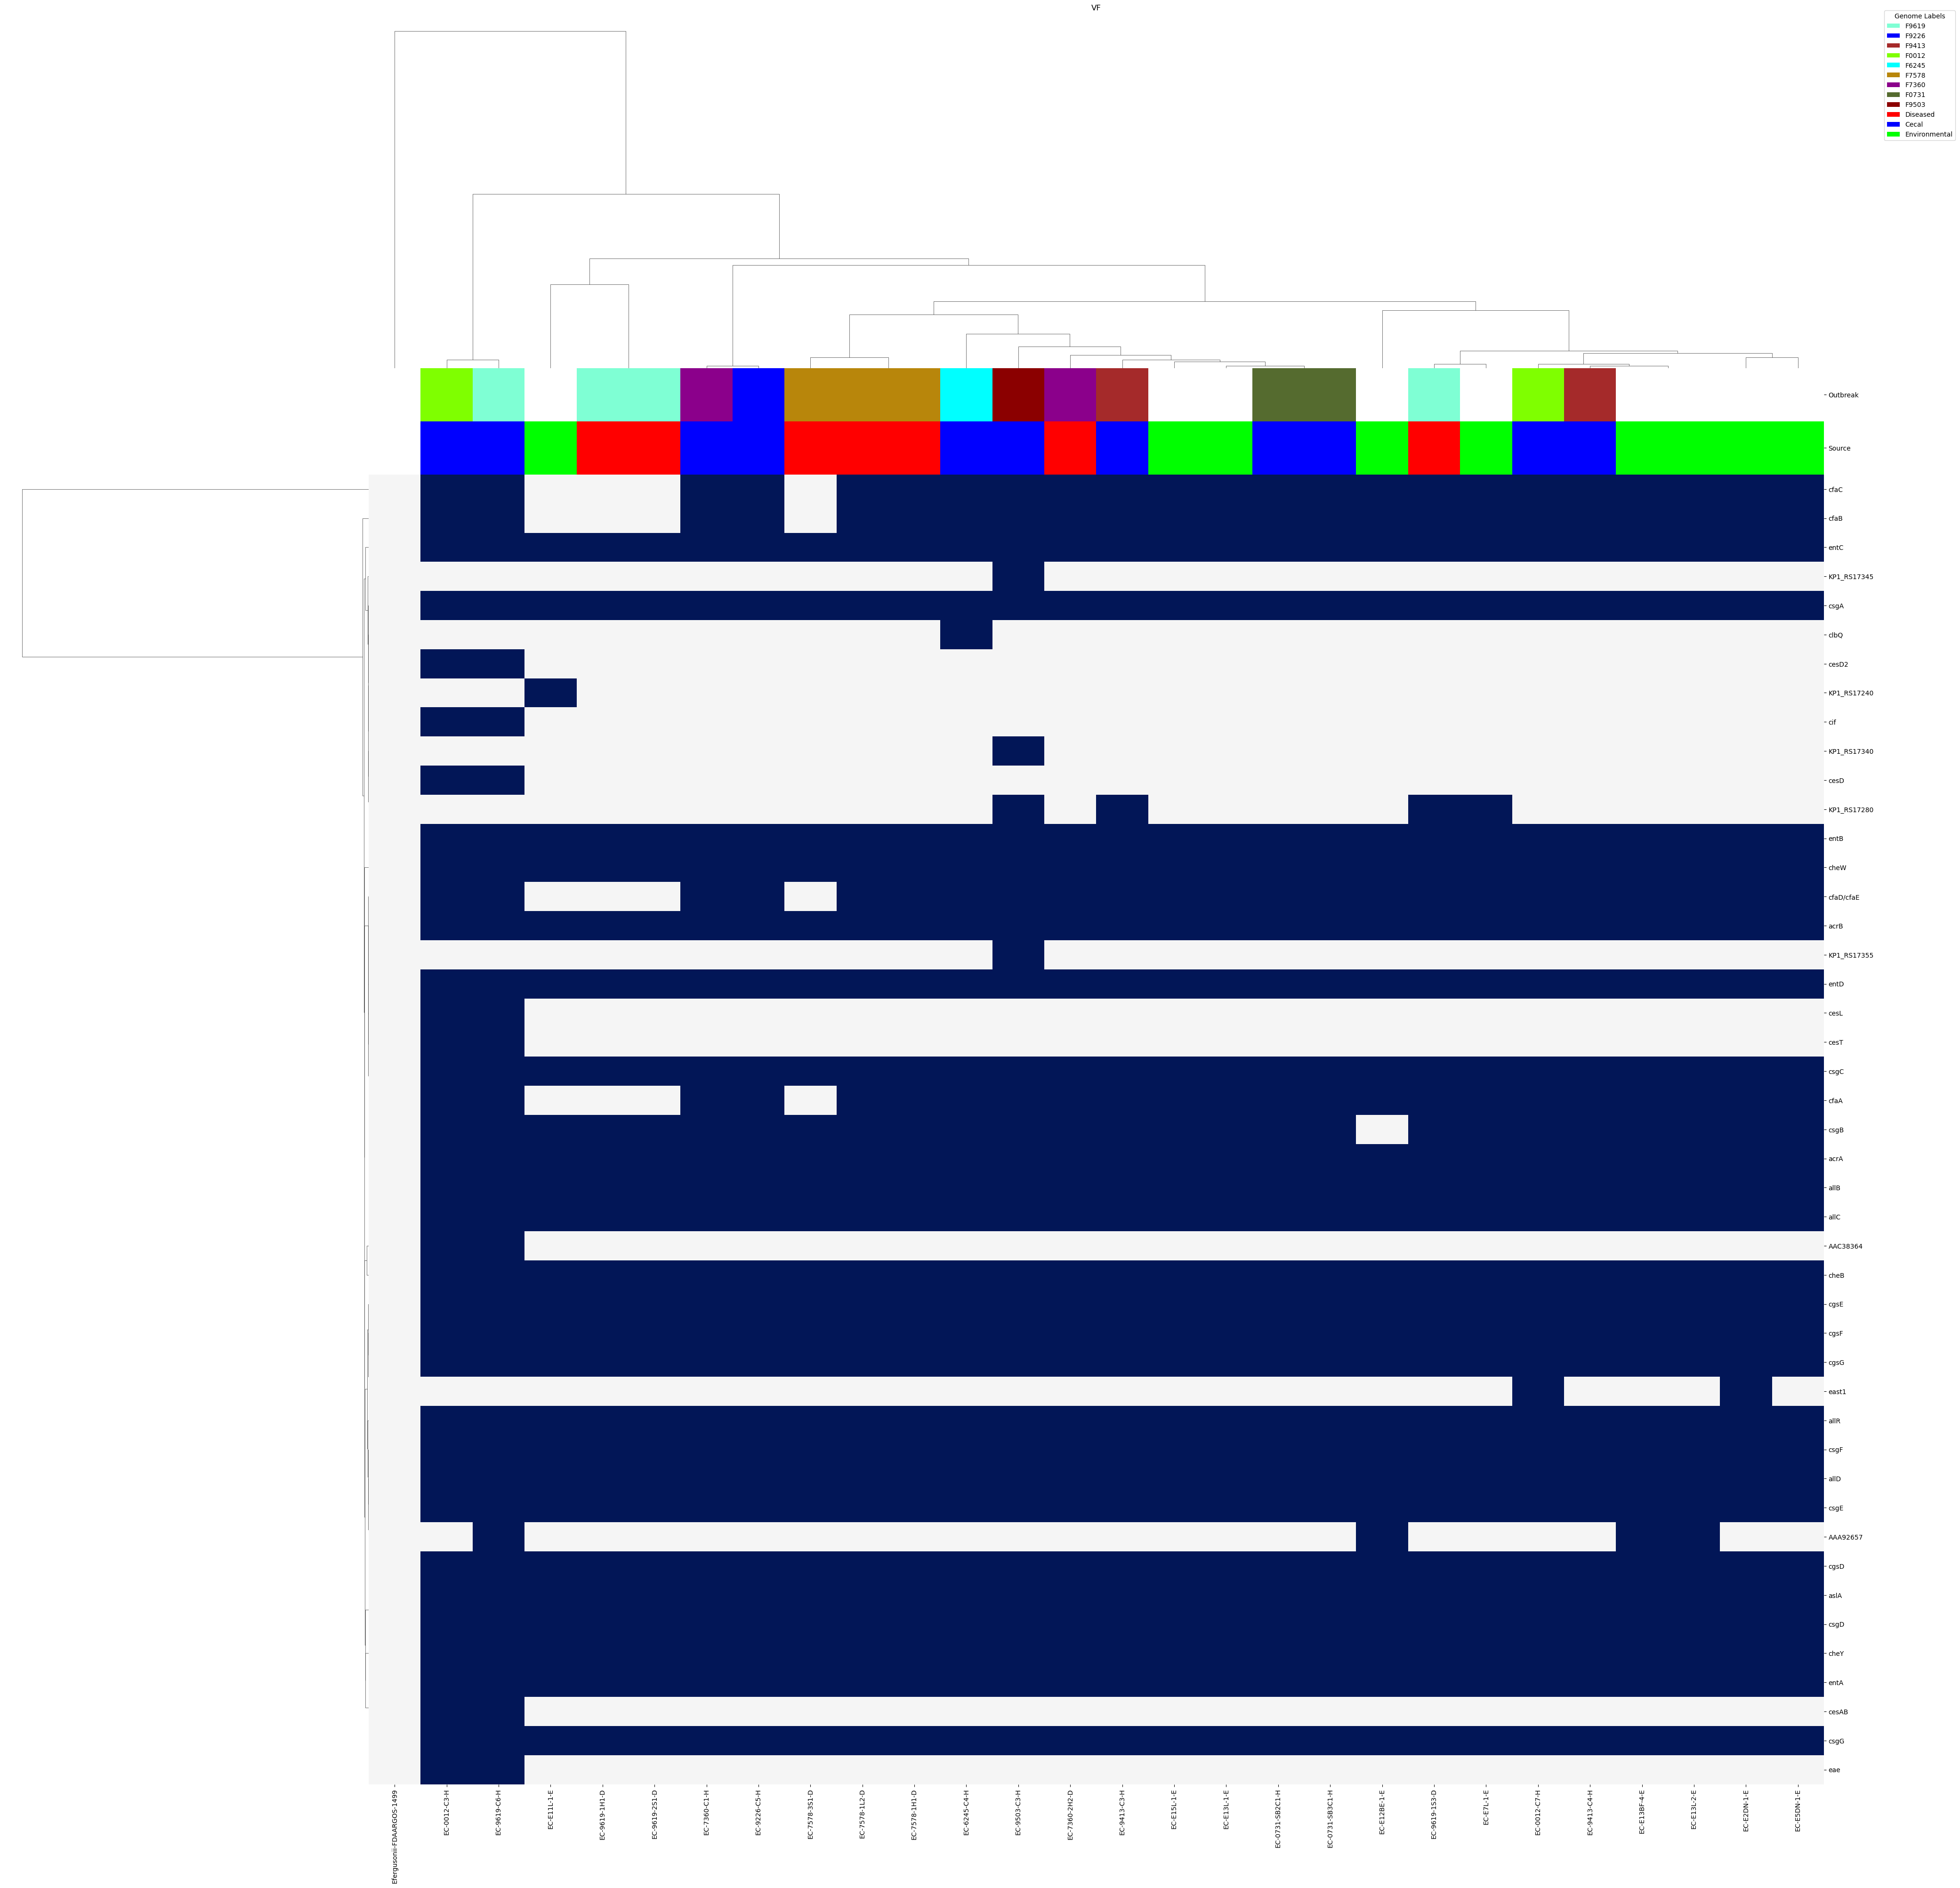

In [44]:
feature = 'VF'
panel = 'a'

sel_pa = vpa_B14
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmB1.index]

title = feature

#plot
handles = [Patch(facecolor=legend_cmap_B1[name]) for name in legend_cmap_B1]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_B1,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_B1, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_B1_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

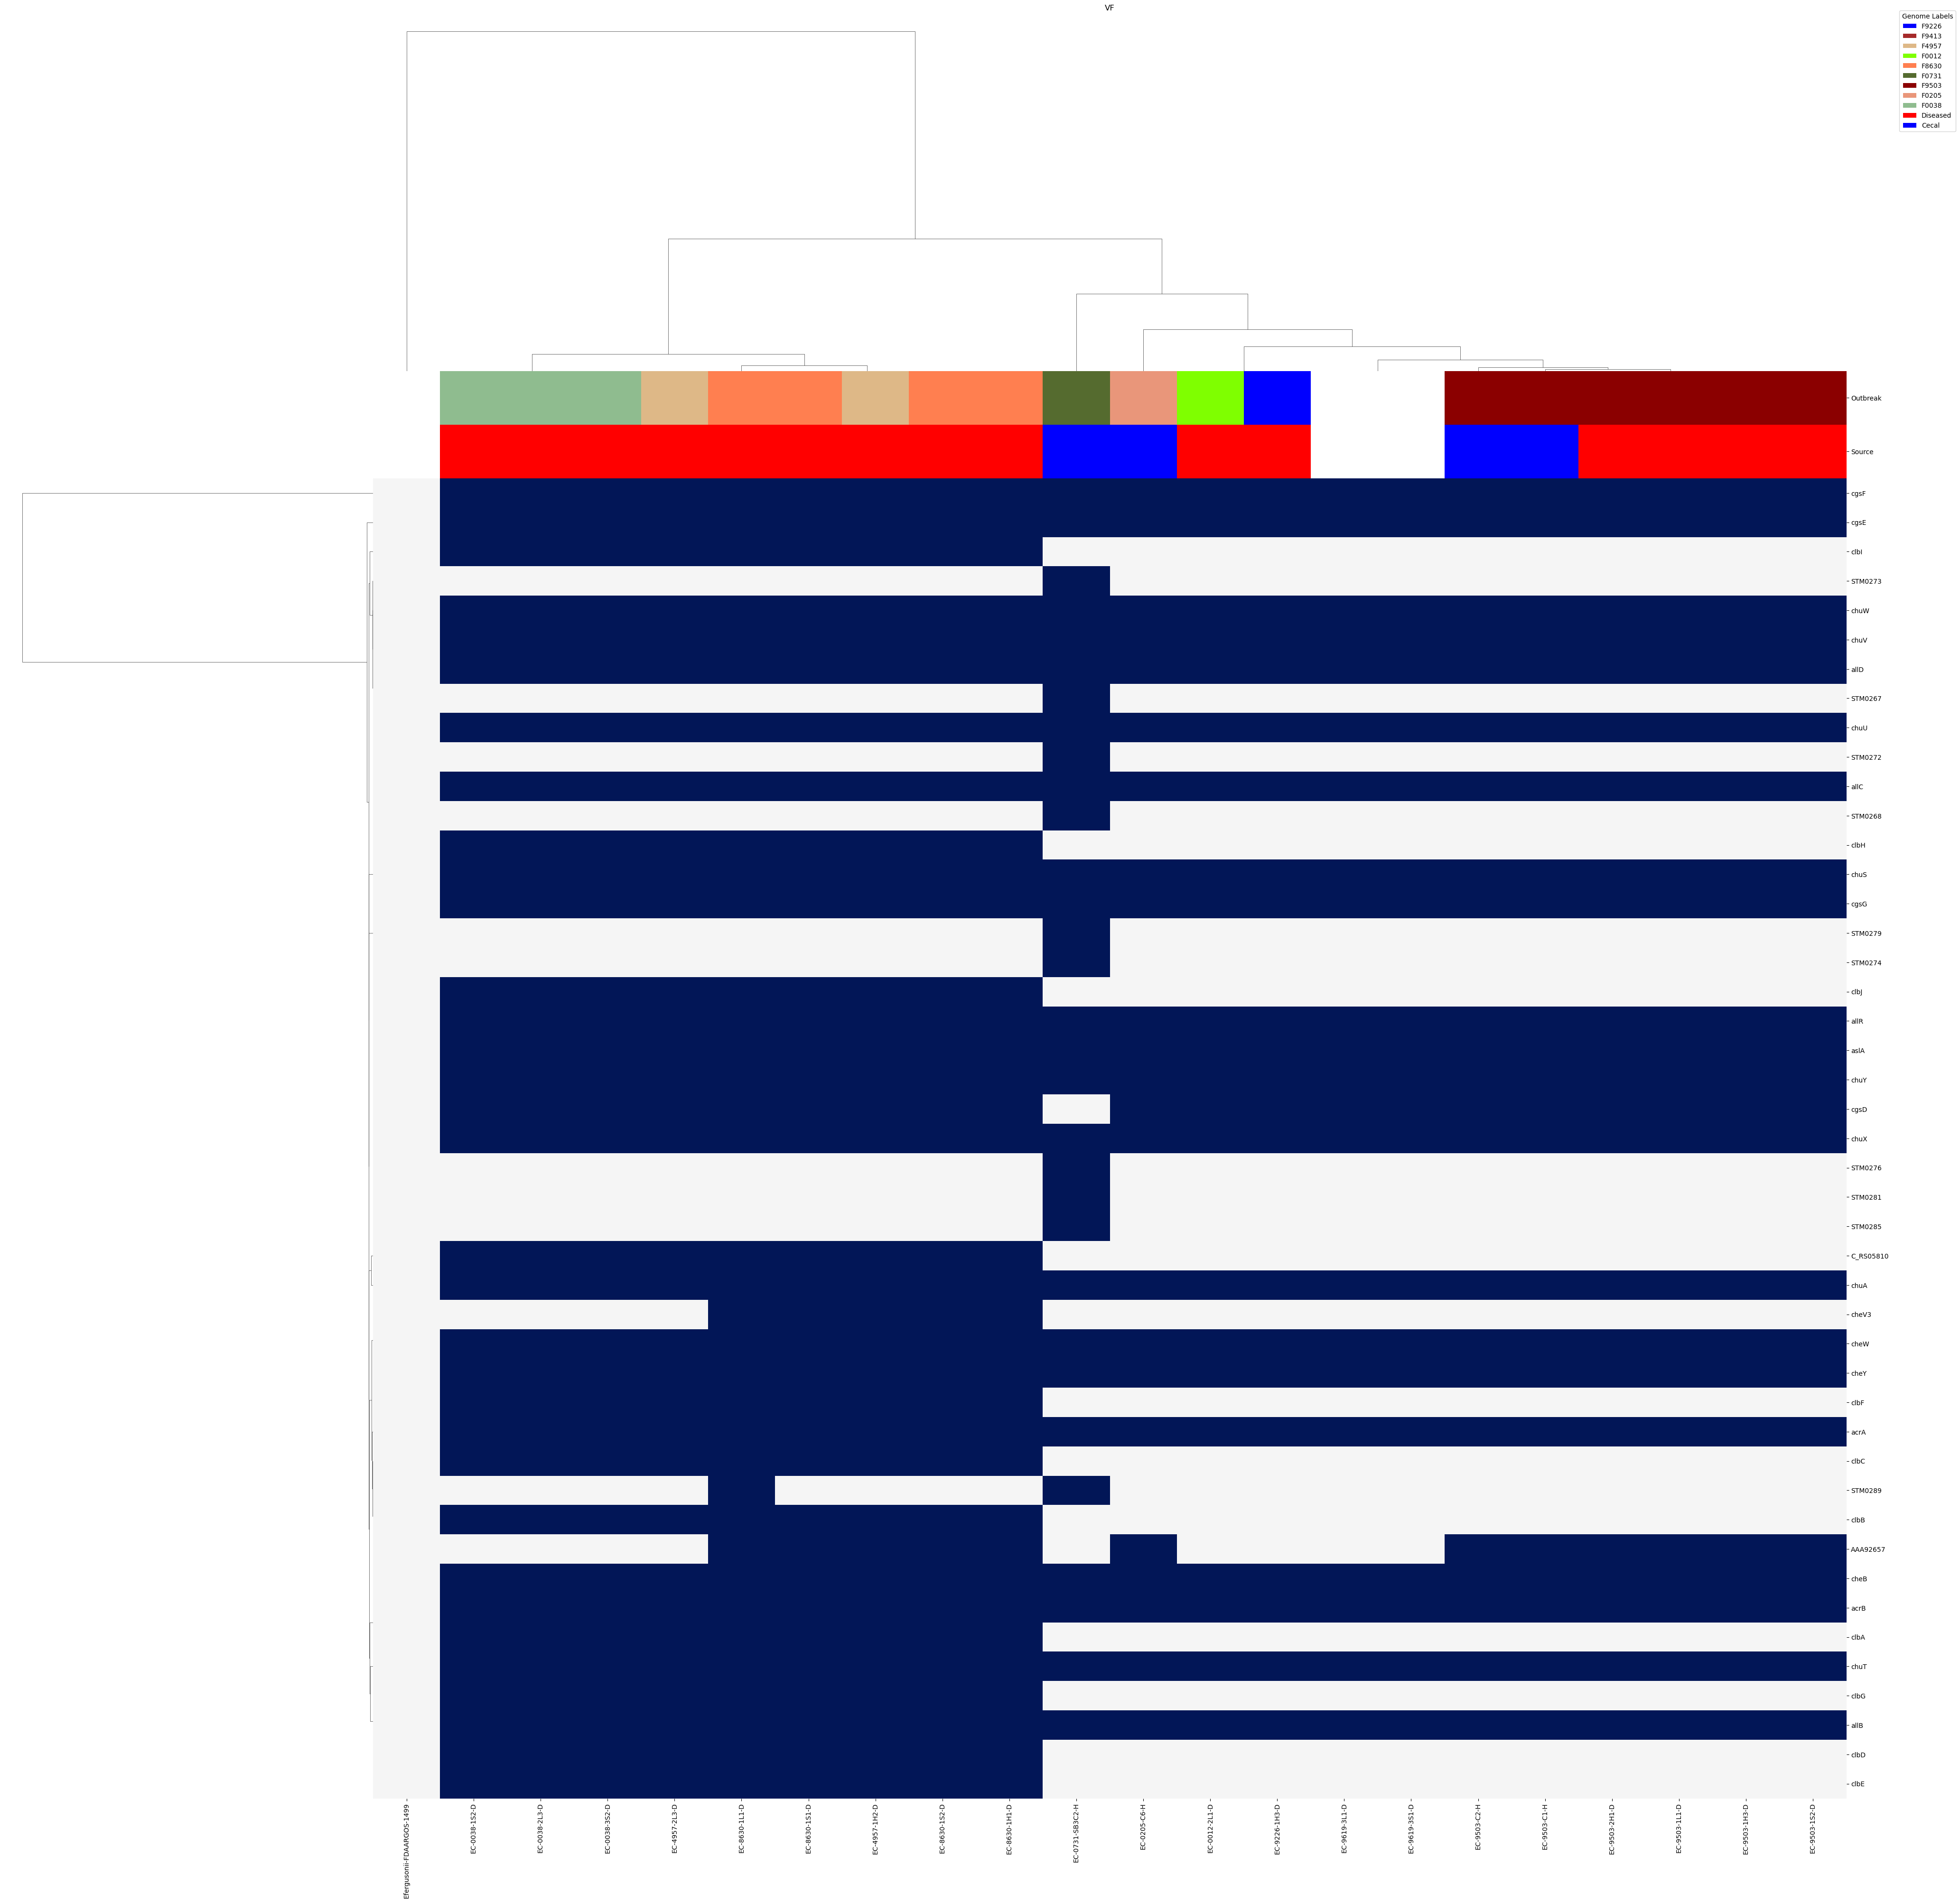

In [45]:
feature = 'VF'
panel = 'a'
sel_pa1 = vpa_B24
sel_pa1.rename(name_map, axis=1, inplace=True)
sel_pa1 = sel_pa1.T.loc[:,dmB2.index]
title = feature

#plot
handles = [Patch(facecolor=legend_cmap_B2[name]) for name in legend_cmap_B2]
g = sns.clustermap(data=sel_pa1, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_B2,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_B2, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_B2_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


/tmp/ipykernel_206839/1209585318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


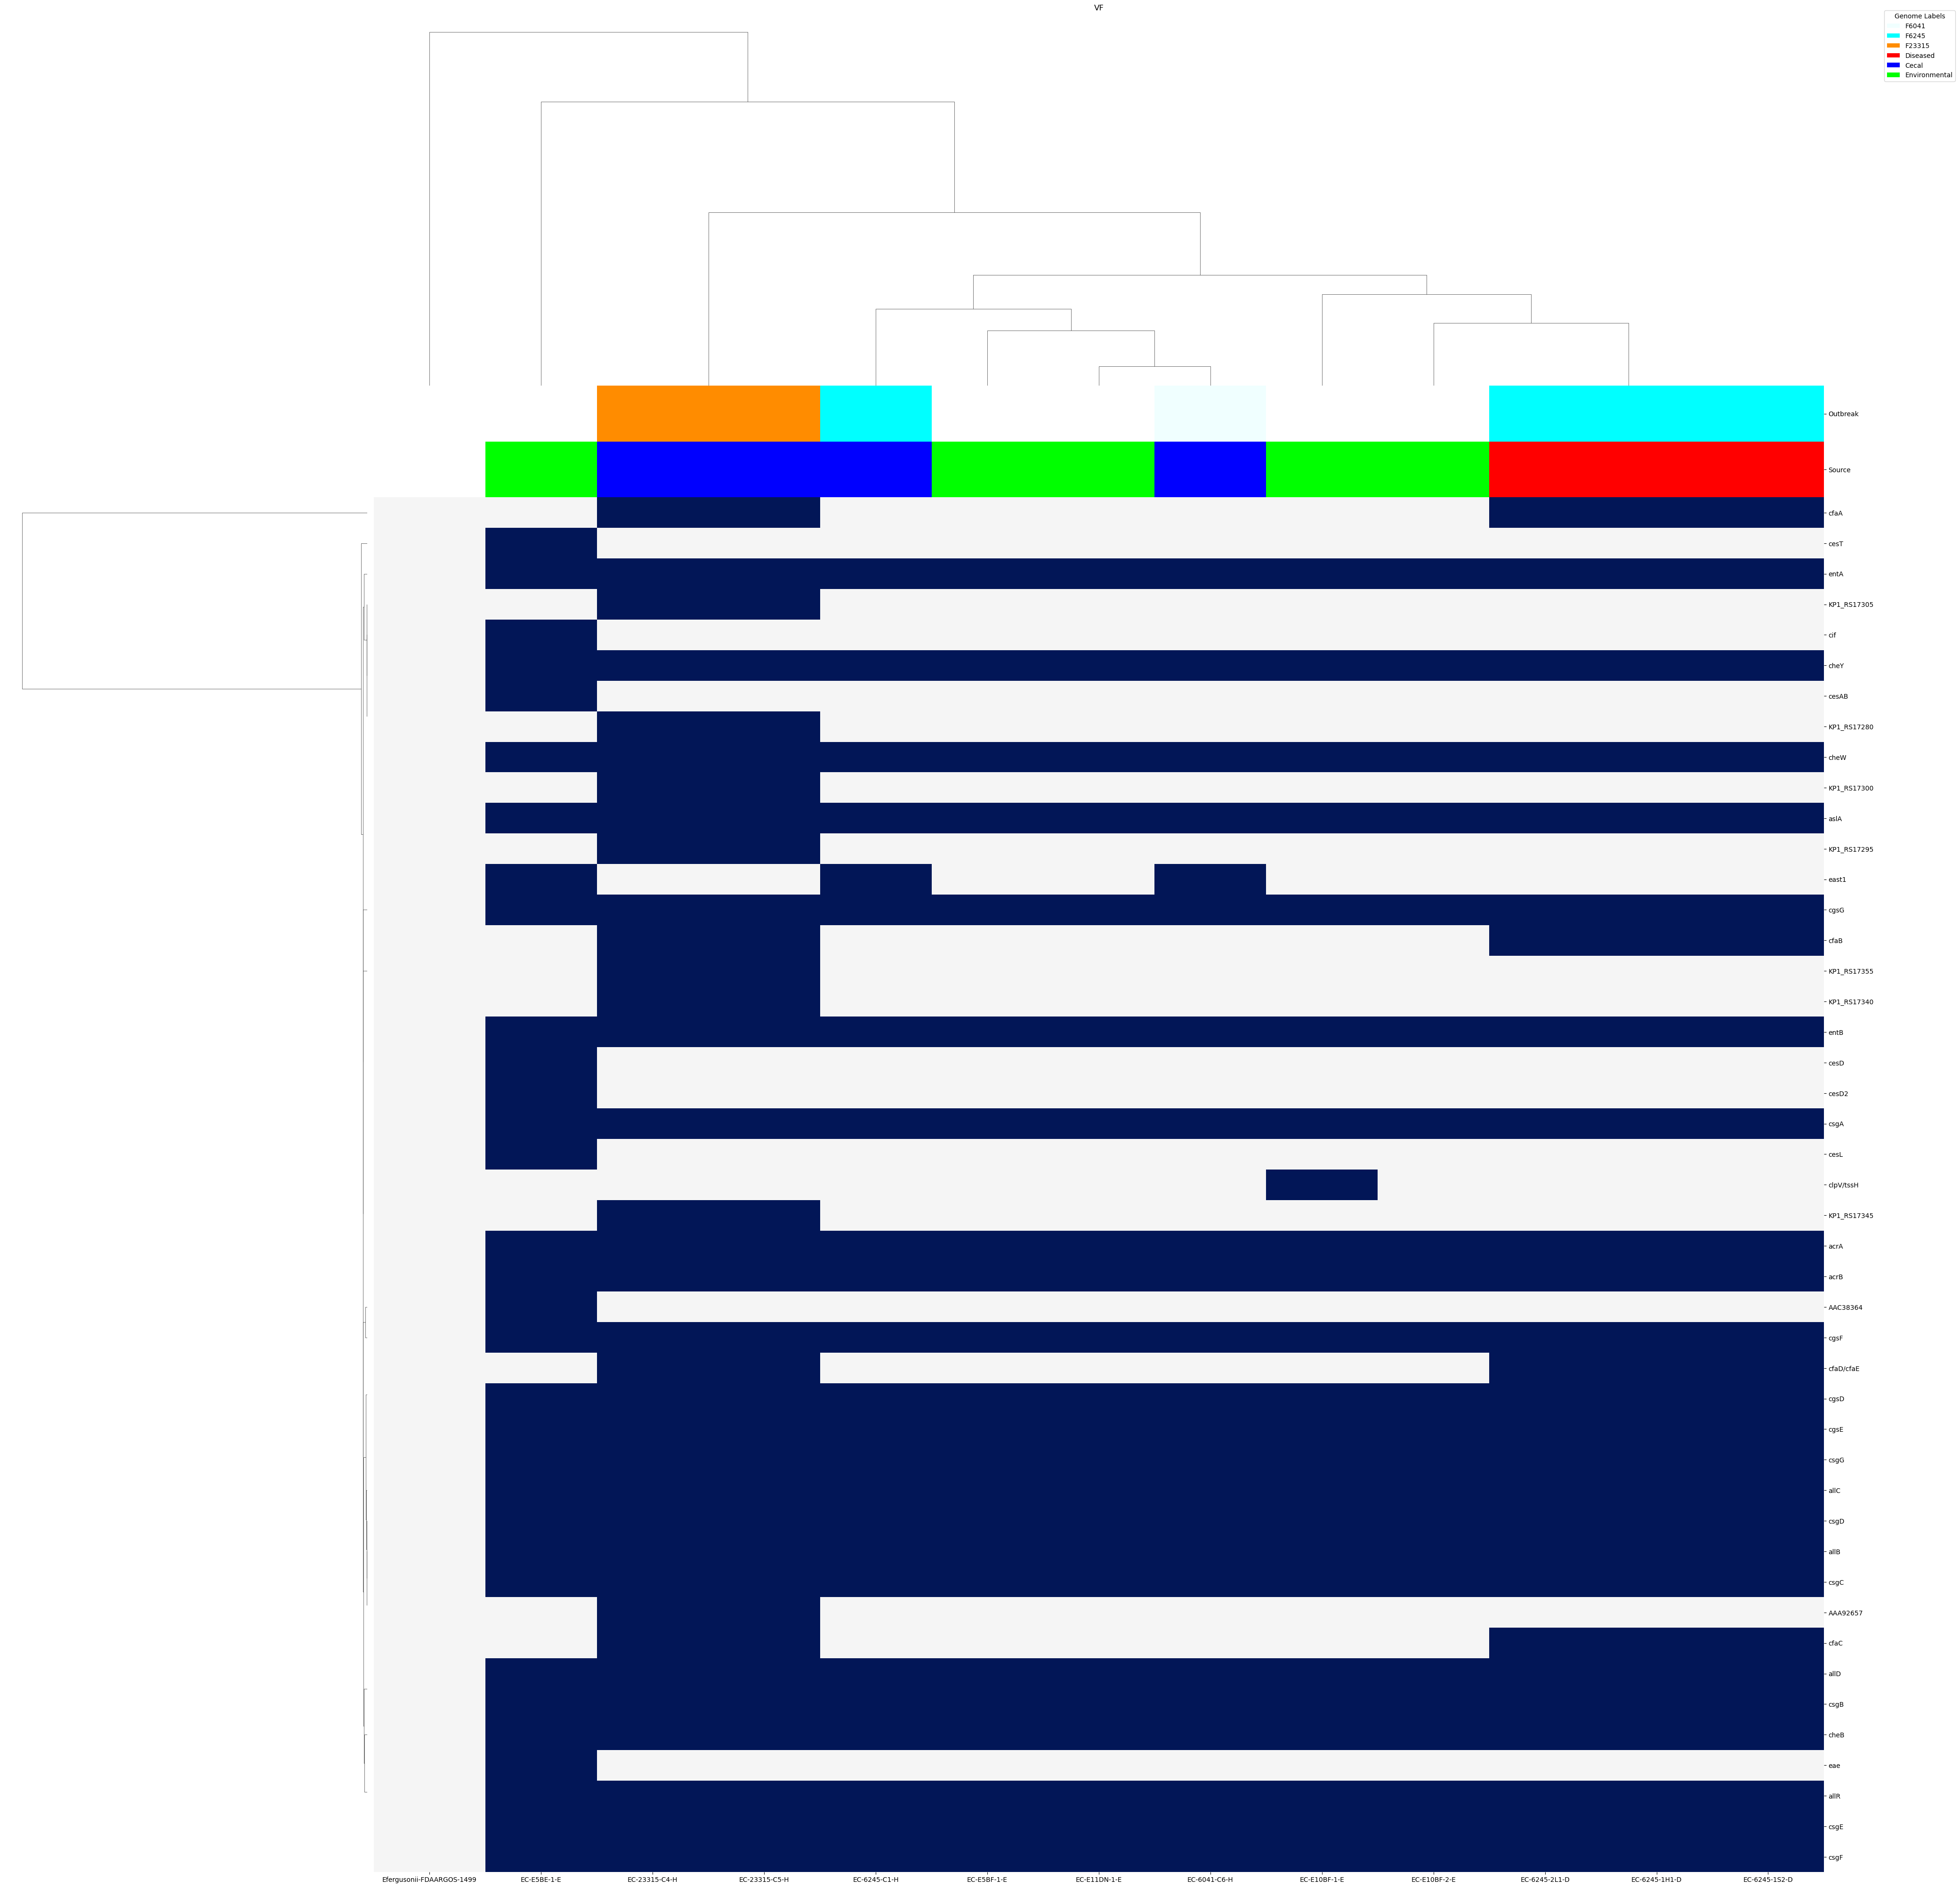

In [46]:
feature = 'VF'
panel = 'a'

sel_pa = vpa_C4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmC.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_C[name]) for name in legend_cmap_C]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_C,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_C, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_C_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/2338327187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


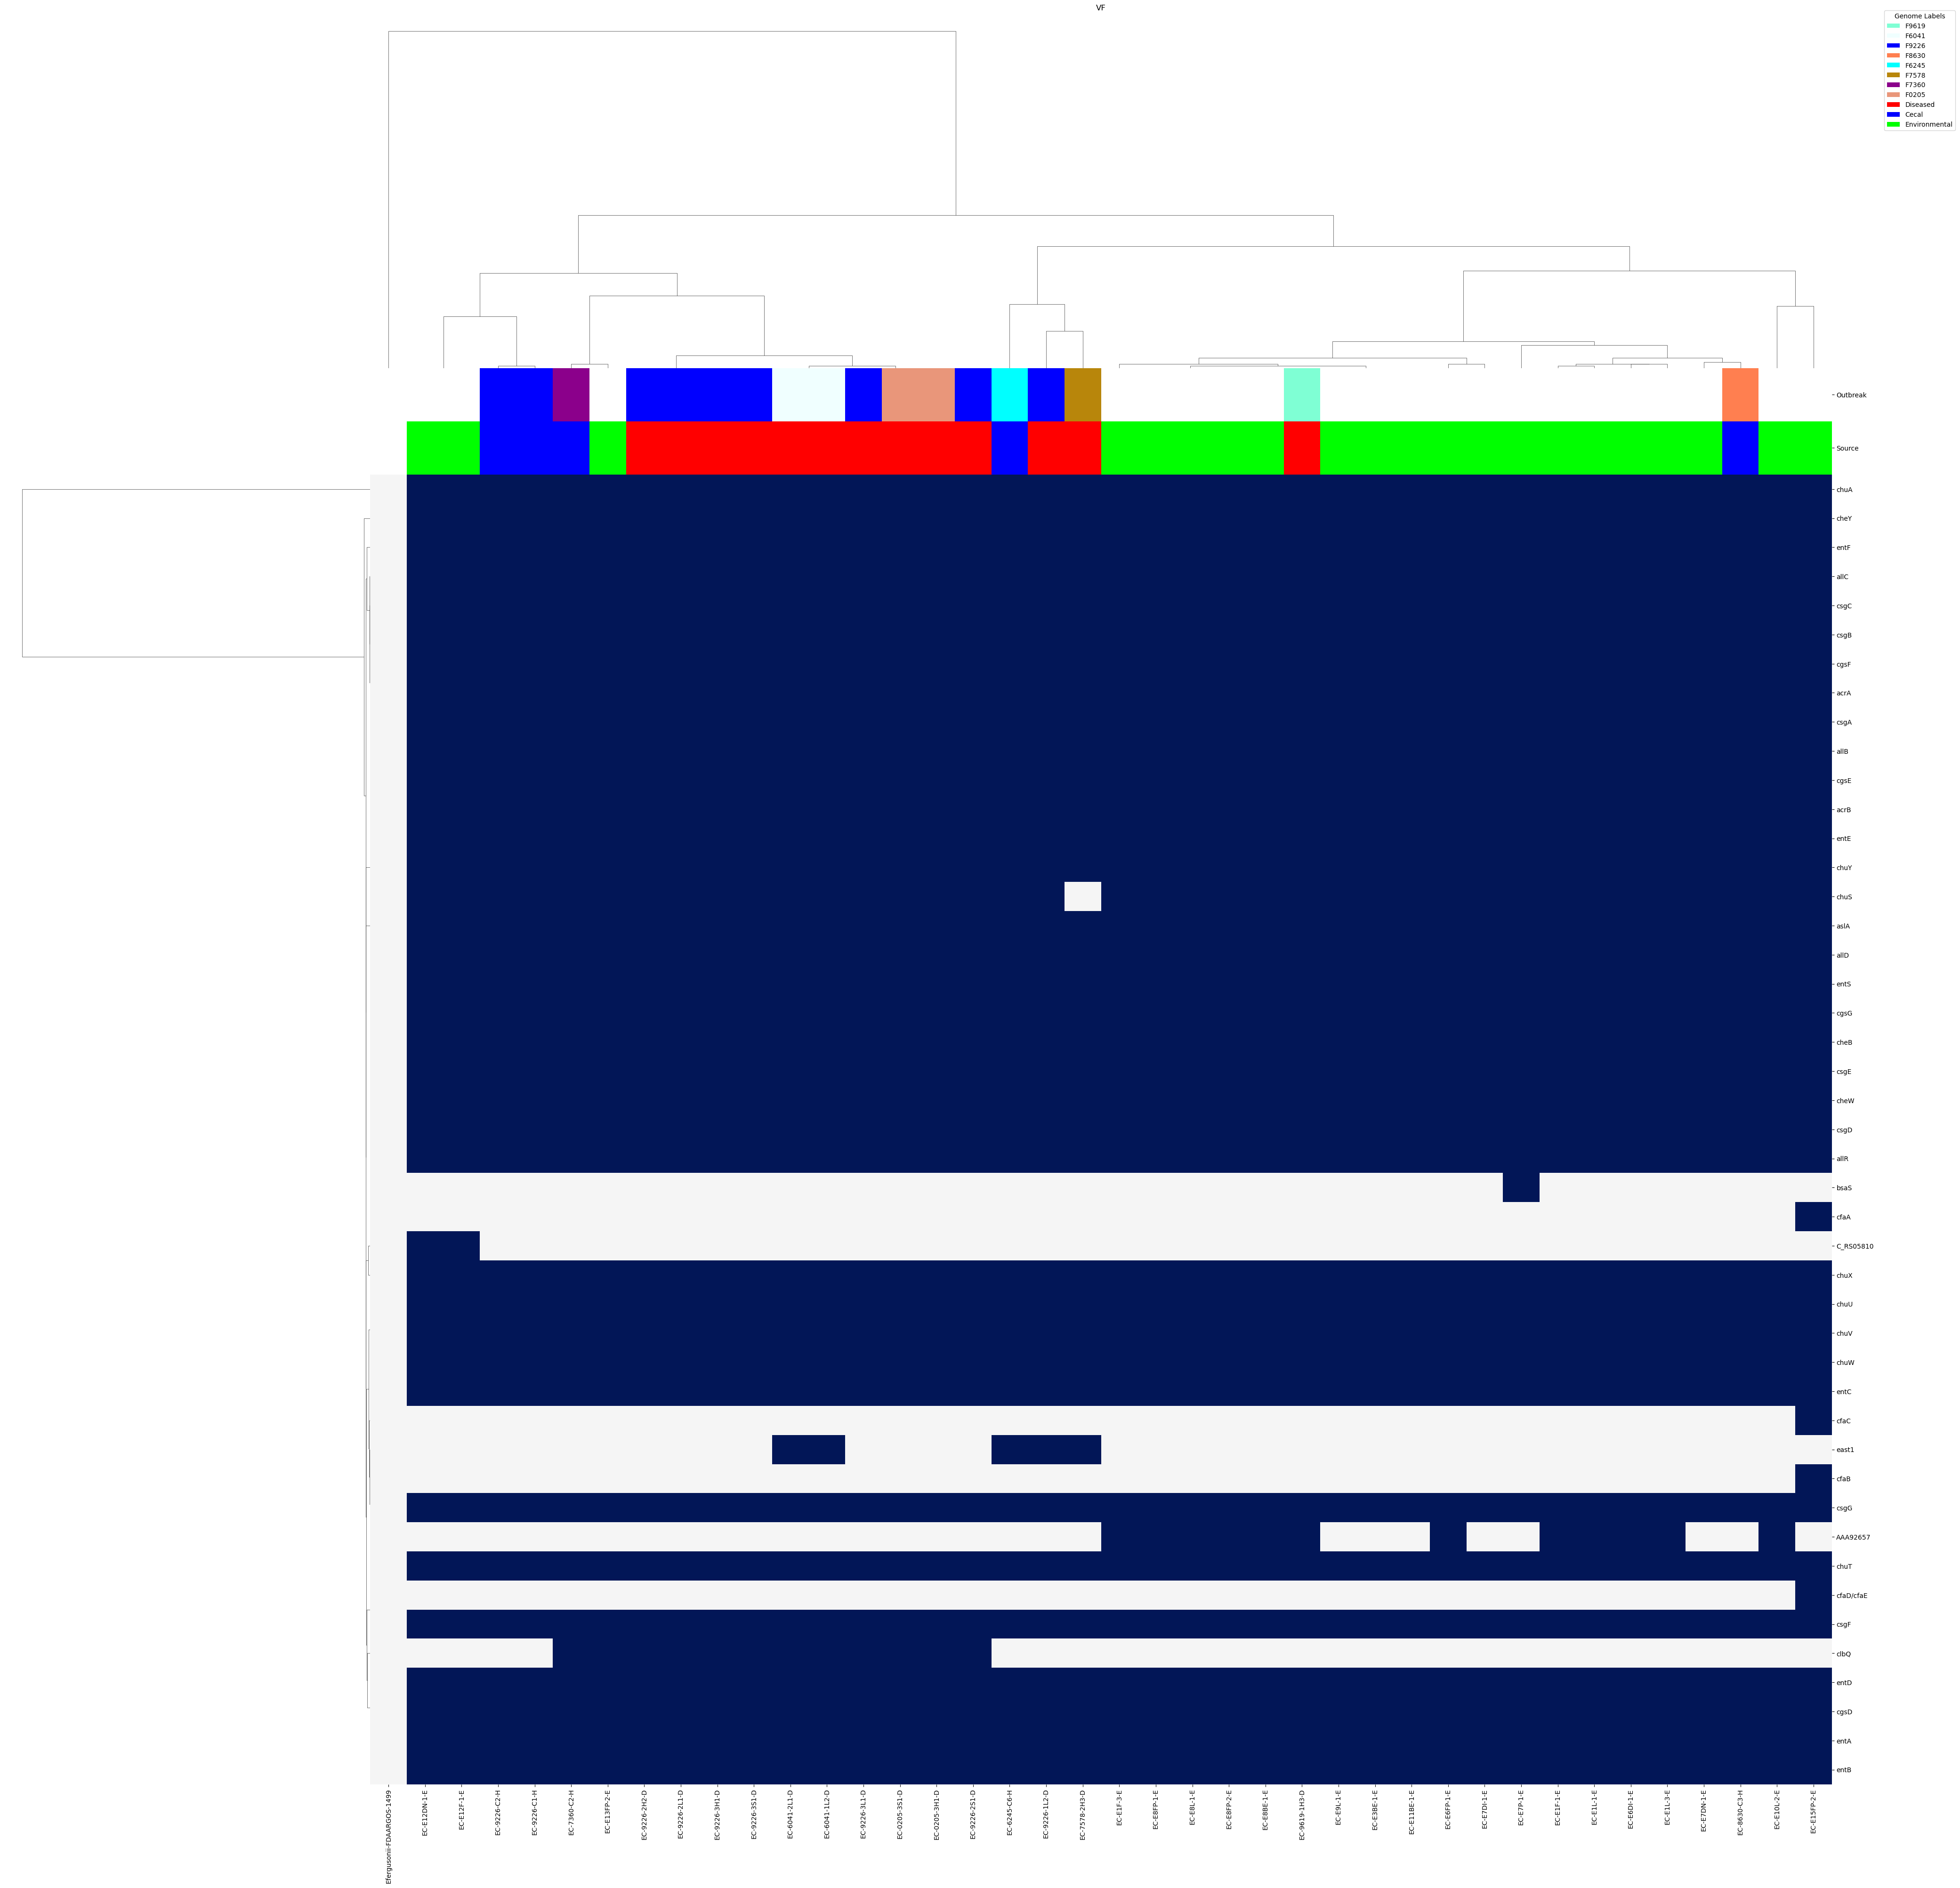

In [47]:
feature = 'VF'
panel = 'a'

sel_pa = vpa_D4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmD.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_D[name]) for name in legend_cmap_D]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_D,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_D, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_D_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/3472651360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


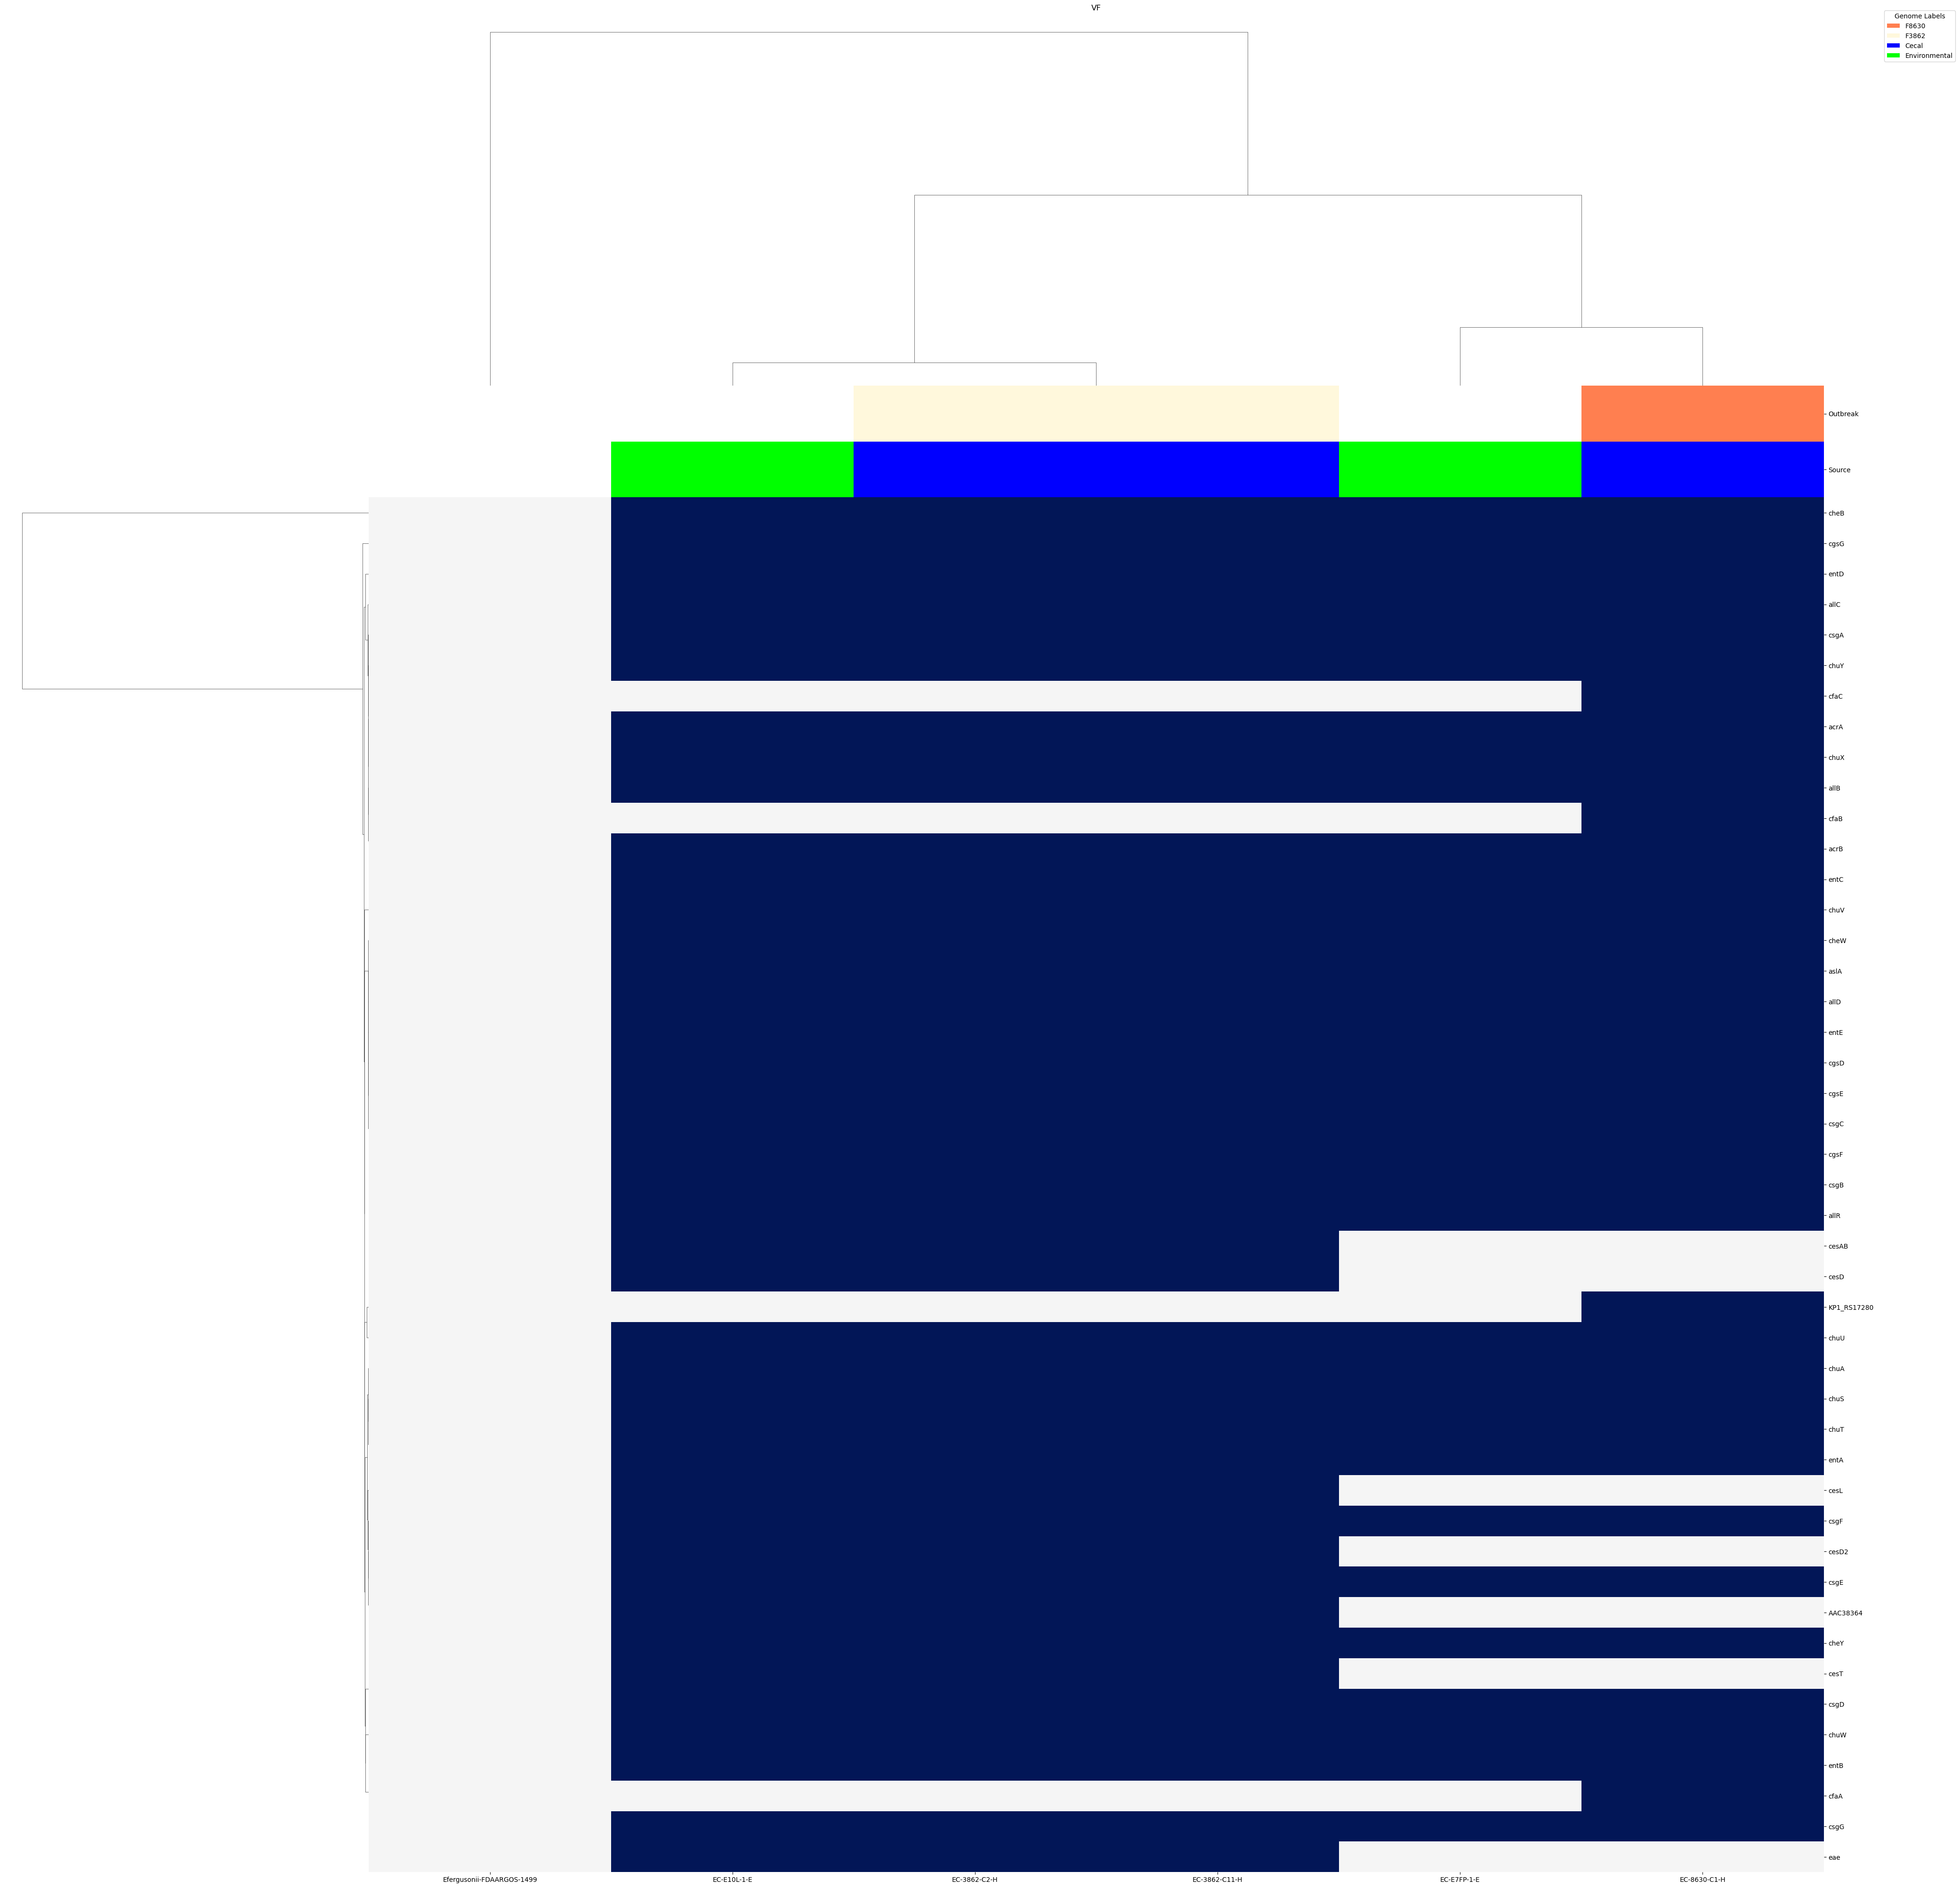

In [48]:
feature = 'VF'
panel = 'a'

sel_pa = vpa_E4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmE.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_E[name]) for name in legend_cmap_E]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_E,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_E, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_E_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/2850118837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


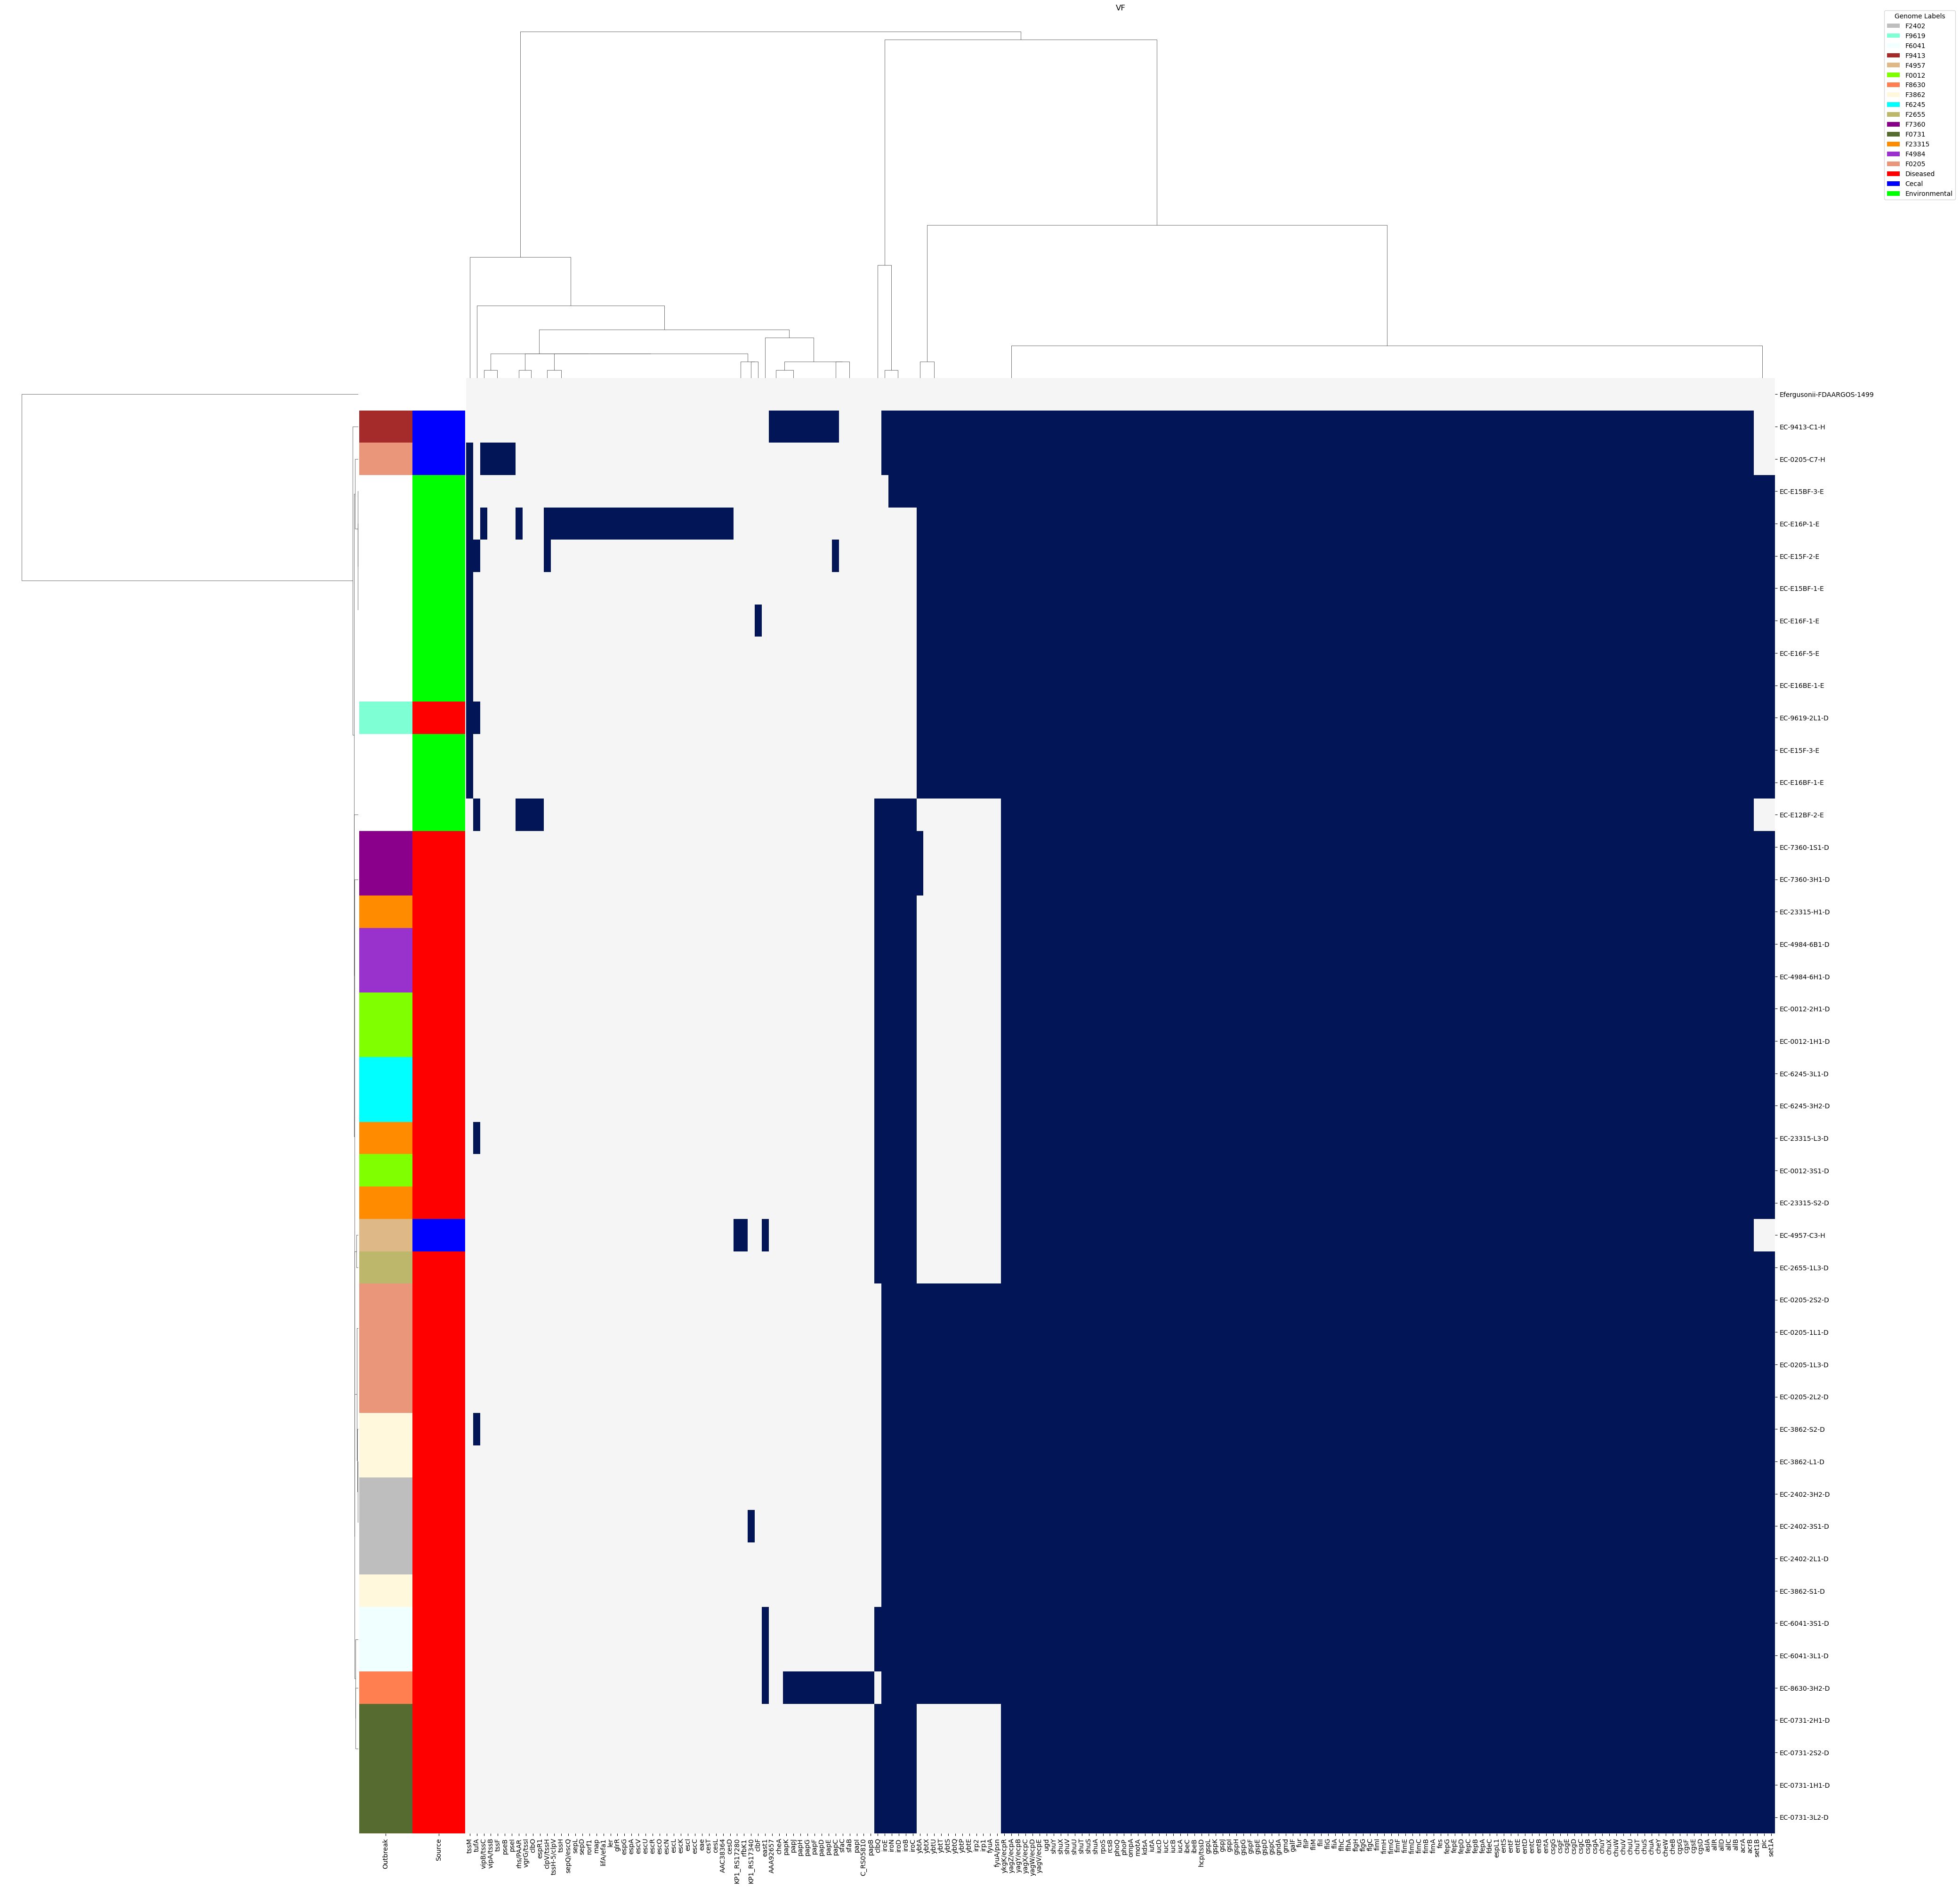

In [49]:
feature = 'VF'
panel = 'a'

sel_pa = vpa_G4
sel_pa.rename(name_map, axis=1, inplace=True)
#sel_pa = sel_pa.T.loc[:, dmE.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_G[name]) for name in legend_cmap_G]
g = sns.clustermap(data=sel_pa.loc[dmG.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors_G,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_G, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_G_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

In [50]:
ppa = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv')

In [51]:
ppa = ppa.set_index("row_0")

In [52]:
ppa.index = ppa.index.str.replace('_','-')

In [53]:
merged_A = pd.merge(genome_labels_A, ppa, left_index=True, right_index=True, how='left')
merged_A = merged_A.drop(['Outbreak', 'Source'], axis=1)
merged_B1 = pd.merge(genome_labels_B1, ppa, left_index=True, right_index=True, how='left')
merged_B1 = merged_B1.drop(['Outbreak', 'Source'], axis=1)
merged_B2 = pd.merge(genome_labels_B2, ppa, left_index=True, right_index=True, how='left')
merged_B2 = merged_B2.drop(['Outbreak', 'Source'], axis=1)
merged_C = pd.merge(genome_labels_C, ppa, left_index=True, right_index=True, how='left')
merged_C = merged_C.drop(['Outbreak', 'Source'], axis=1)
merged_D = pd.merge(genome_labels_D, ppa, left_index=True, right_index=True, how='left')
merged_D = merged_D.drop(['Outbreak', 'Source'], axis=1)
merged_E = pd.merge(genome_labels_E, ppa, left_index=True, right_index=True, how='left')
merged_E = merged_E.drop(['Outbreak', 'Source'], axis=1)
merged_G = pd.merge(genome_labels_G, ppa, left_index=True, right_index=True, how='left')
merged_G = merged_G.drop(['Outbreak', 'Source'], axis=1)

In [54]:
ppa_A1 = merged_A.fillna(0)
ppa_A2 = ppa_A1.drop('All', axis=1)
ppa_A3 = ppa_A2.ge(0.5).astype(int)
ppa_A3.index = ppa_A3.index.str.replace(' ','-')
ppa_A3.index = ppa_A3.index.str.replace('_', '-')
ppa_A4 = ppa_A3.loc[:, (ppa_A3 != 0).any(axis=0)]

ppa_B11 = merged_B1.fillna(0)
ppa_B12 = ppa_B11.drop('All', axis=1)
ppa_B13 = ppa_B12.ge(0.5).astype(int)
ppa_B13.index = ppa_B13.index.str.replace(' ','-')
ppa_B13.index = ppa_B13.index.str.replace('_', '-')
ppa_B14 = ppa_B13.loc[:, (ppa_B13 != 0).any(axis=0)]


ppa_B21 = merged_B2.fillna(0)
ppa_B22 = ppa_B21.drop('All', axis=1)
ppa_B23 = ppa_B22.ge(0.5).astype(int)
ppa_B23.index = ppa_B23.index.str.replace(' ','-')
ppa_B23.index = ppa_B23.index.str.replace('_', '-')
ppa_B24 = ppa_B23.loc[:, (ppa_B23 != 0).any(axis=0)]


ppa_C1 = merged_C.fillna(0)
ppa_C2 = ppa_C1.drop('All', axis=1)
ppa_C3 = ppa_C2.ge(0.5).astype(int)
ppa_C3.index = ppa_C3.index.str.replace(' ','-')
ppa_C3.index = ppa_C3.index.str.replace('_', '-')
ppa_C4 = ppa_C3.loc[:, (ppa_C3 != 0).any(axis=0)]


ppa_D1 = merged_D.fillna(0)
ppa_D2 = ppa_D1.drop('All', axis=1)
ppa_D3 = ppa_D2.ge(0.5).astype(int)
ppa_D3.index = ppa_D3.index.str.replace(' ','-')
ppa_D3.index = ppa_D3.index.str.replace('_', '-')
ppa_D4 = ppa_D3.loc[:, (ppa_D3 != 0).any(axis=0)]


ppa_E1 = merged_E.fillna(0)
ppa_E2 = ppa_E1.drop('All', axis=1)
ppa_E3 = ppa_E2.ge(0.5).astype(int)
ppa_E3.index = ppa_E3.index.str.replace(' ','-')
ppa_E3.index = ppa_E3.index.str.replace('_', '-')
ppa_E4 = ppa_E3.loc[:, (ppa_E3 != 0).any(axis=0)]


ppa_G1 = merged_G.fillna(0)
ppa_G2 = ppa_G1.drop('All', axis=1)
ppa_G3 = ppa_G2.ge(0.5).astype(int)
ppa_G3.index = ppa_G3.index.str.replace(' ','-')
ppa_G3.index = ppa_G3.index.str.replace('_', '-')
ppa_G4 = ppa_G3.loc[:, (ppa_G3 != 0).any(axis=0)]

In [55]:
# rename two columns
ppa_B24 = ppa_B24.rename(columns={'EC-9413-3L1-D': 'EC-9619-3L1-D', 'EC-9413-3S1-D': 'EC-9619-3S1-D'})

# rename two rows
ppa_B24 = ppa_B24.rename(index={'EC-9413-3L1-D': 'EC-9619-3L1-D', 'EC-9413-3S1-D': 'EC-9619-3S1-D'})

/tmp/ipykernel_206839/1359965971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


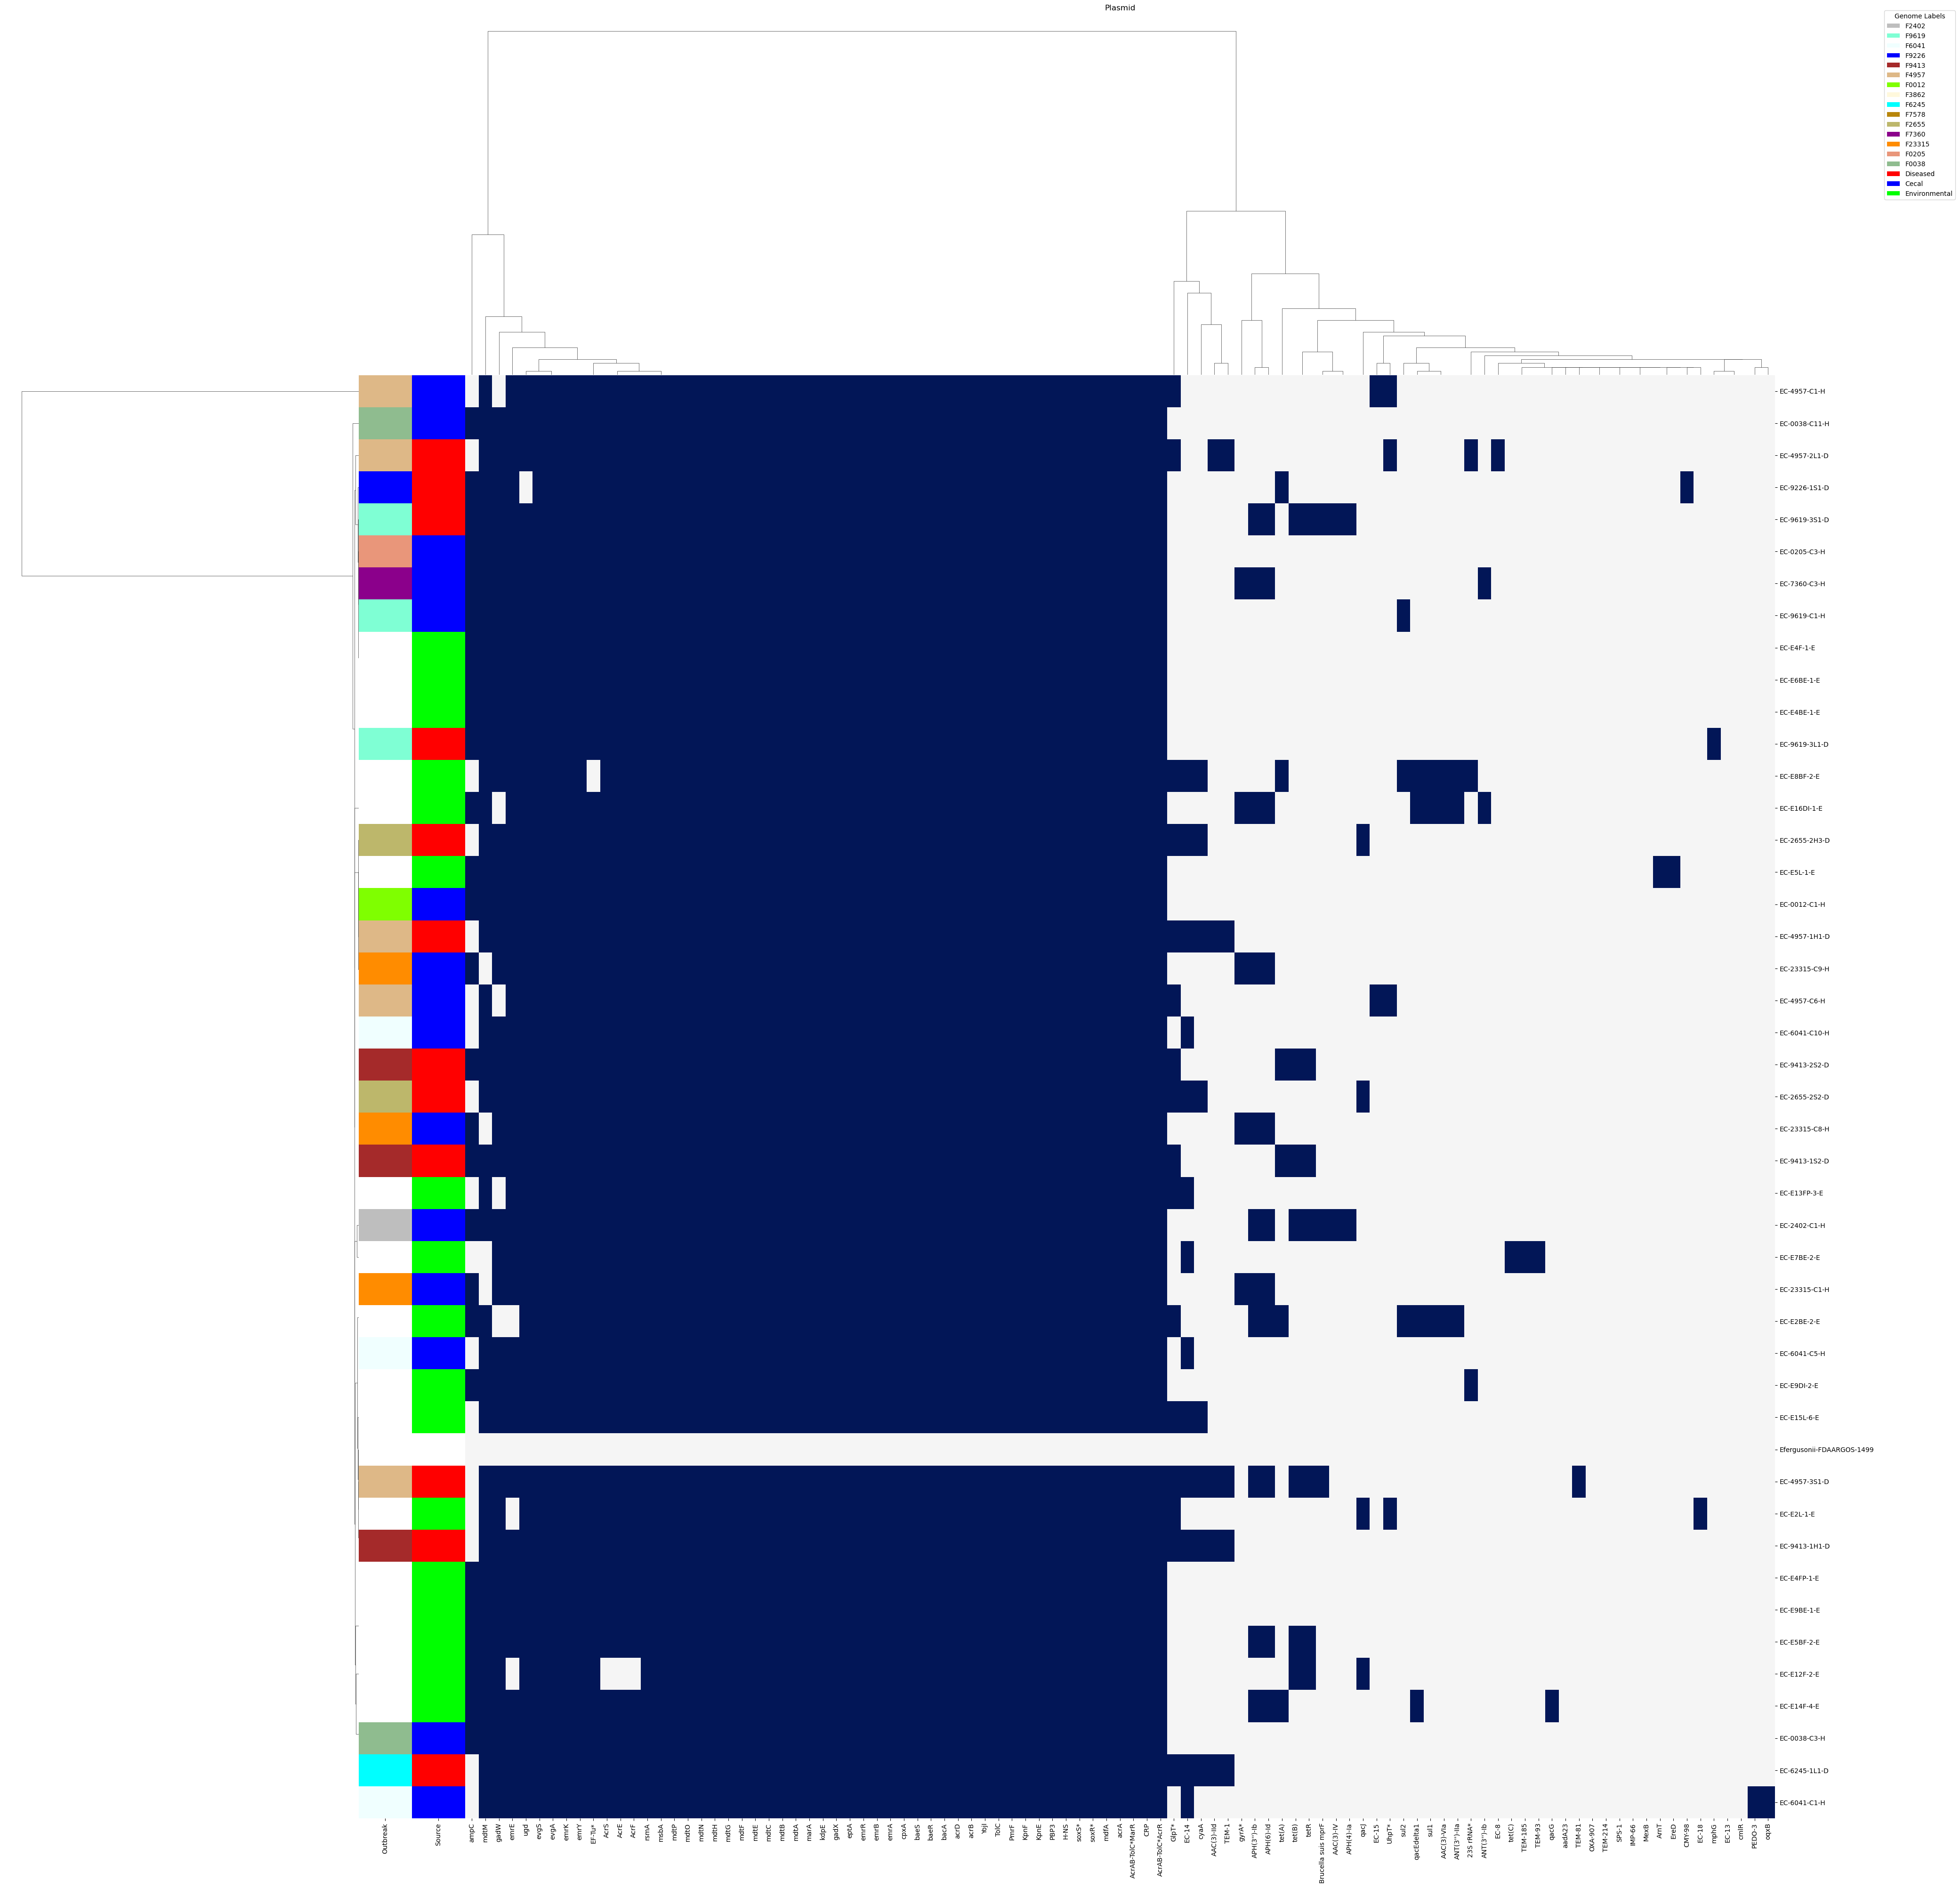

In [56]:
feature = 'Plasmid'
panel = 'a'

sel_pa = ppa_A4
sel_pa.rename(name_map, axis=1, inplace=True)

title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_A[name]) for name in legend_cmap_A]
g = sns.clustermap(data=sel_pa.loc[dmA.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors_A,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_A, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_A_Plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


/tmp/ipykernel_206839/201927275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


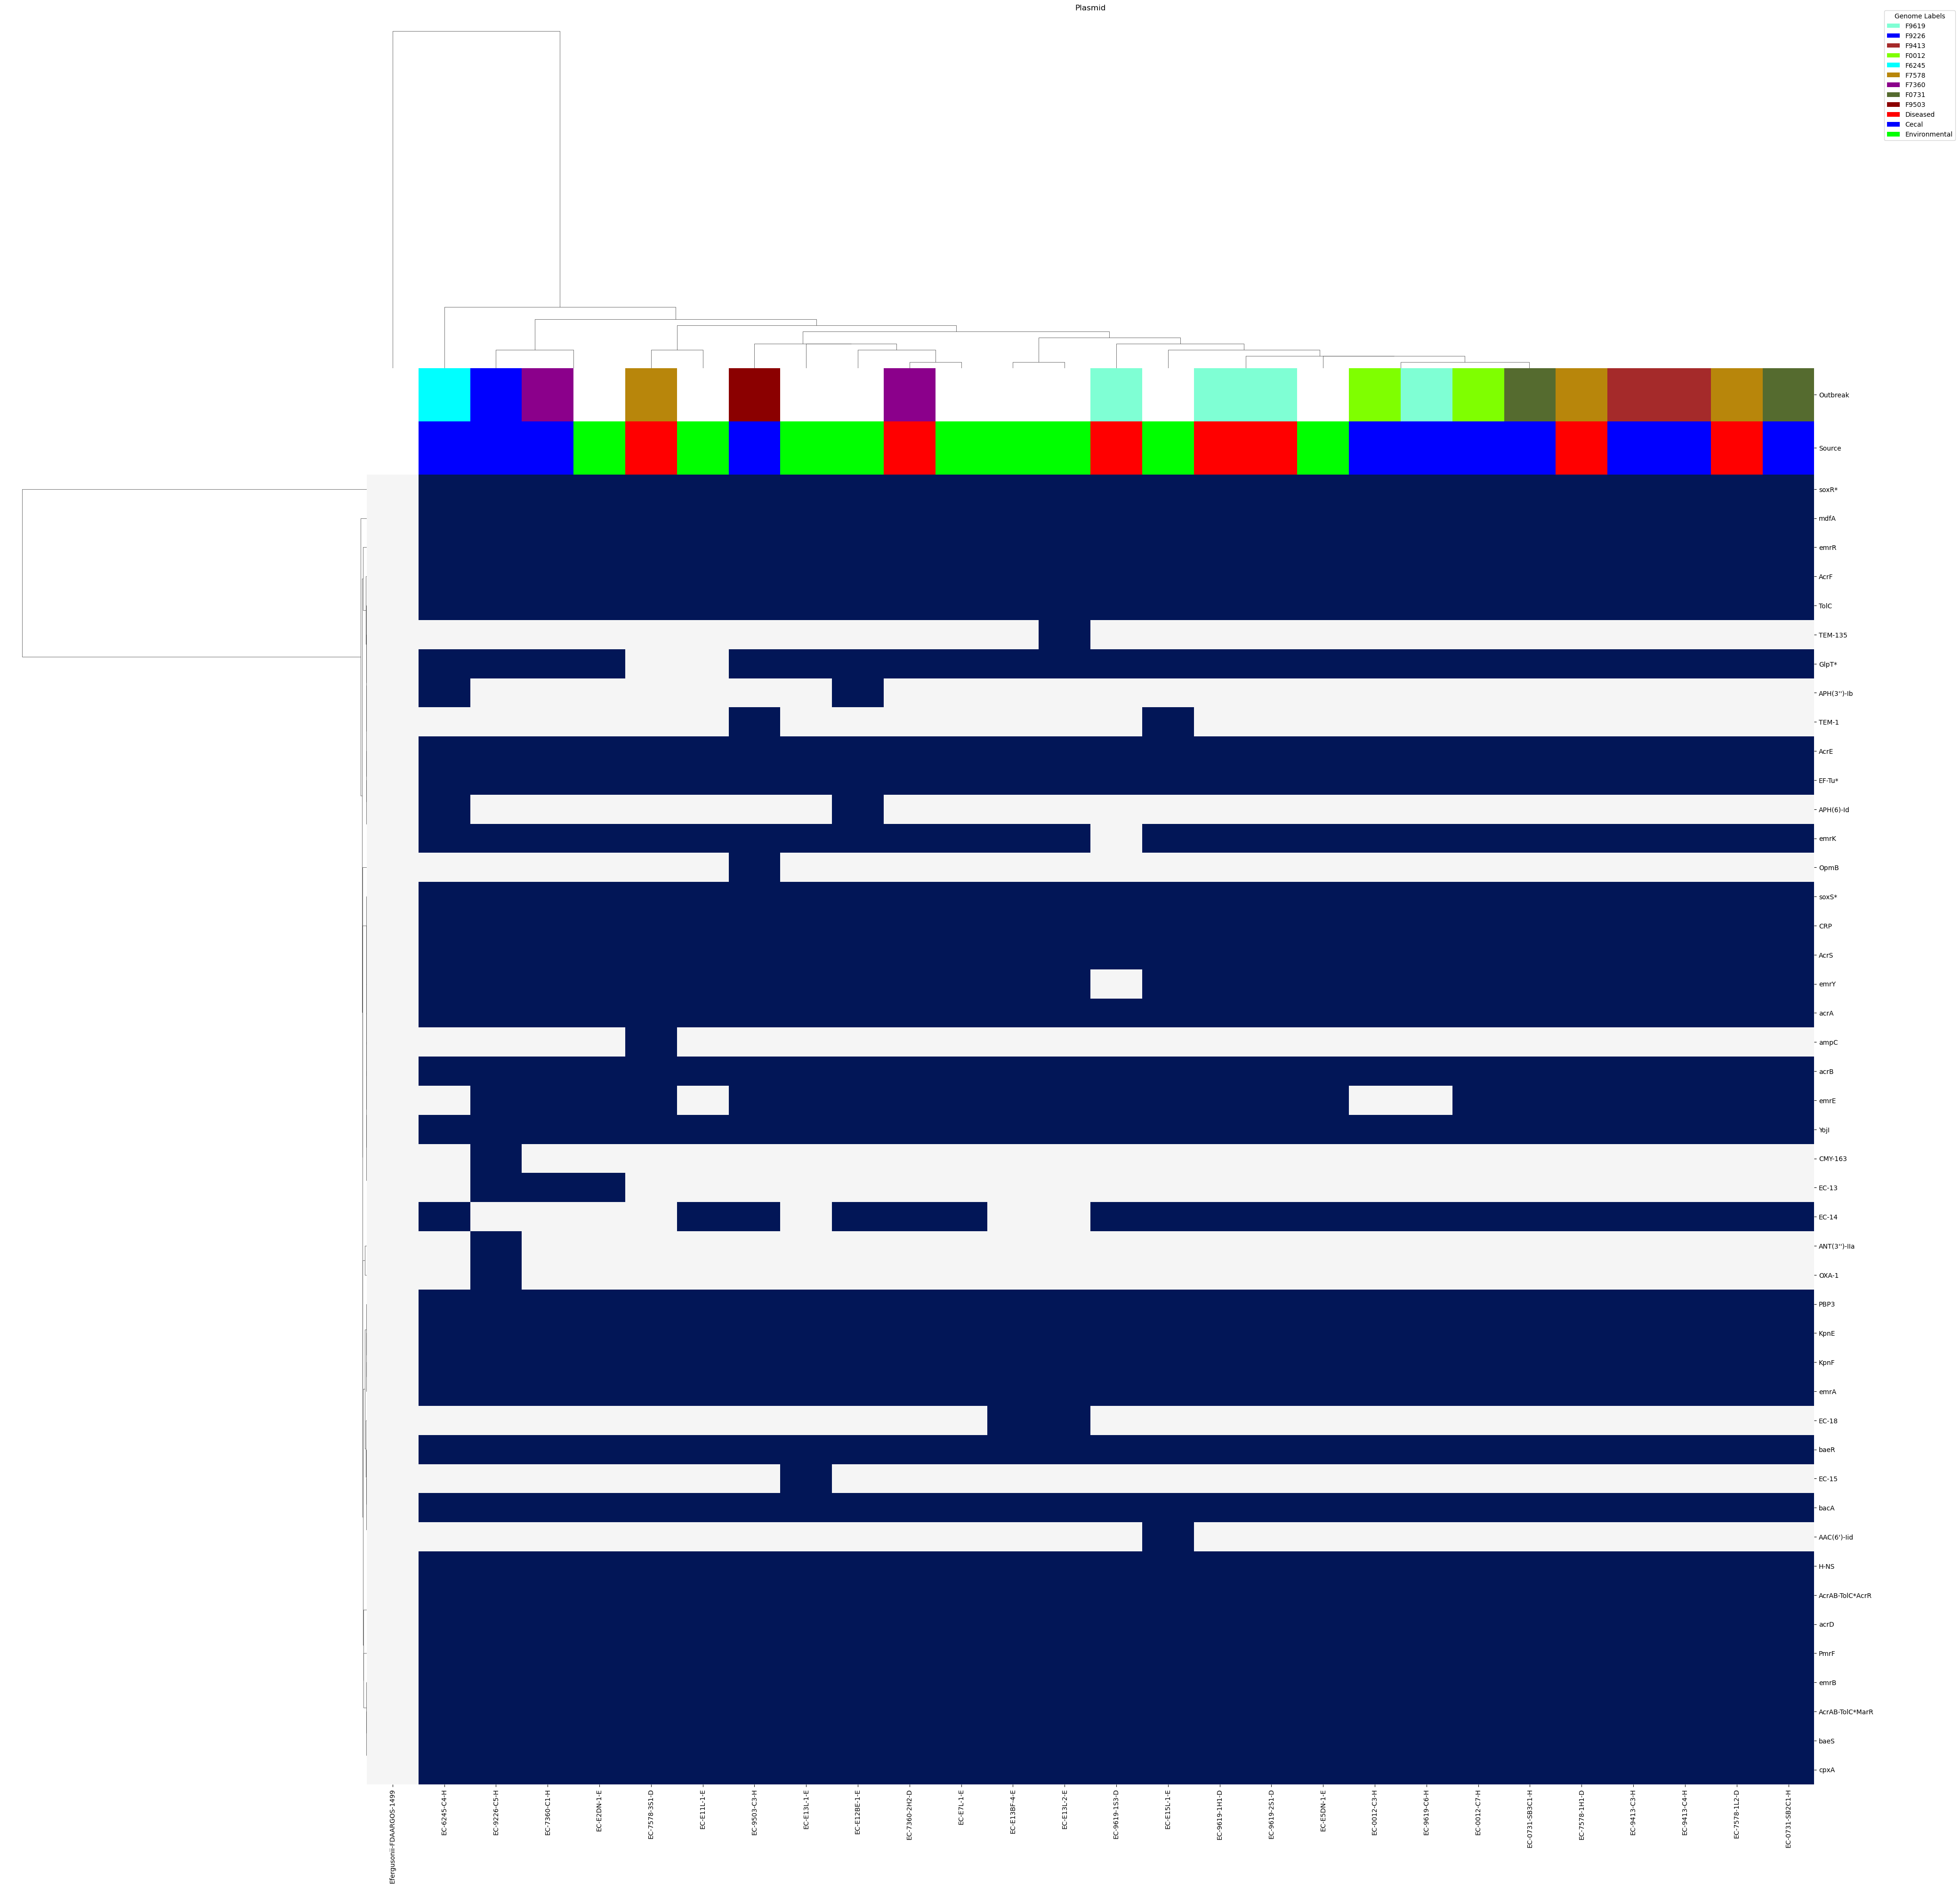

In [57]:
feature = 'Plasmid'
panel = 'a'

sel_pa = ppa_B14
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmB1.index]

title = feature

#plot
handles = [Patch(facecolor=legend_cmap_B1[name]) for name in legend_cmap_B1]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_B1,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_B1, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_B1_Plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

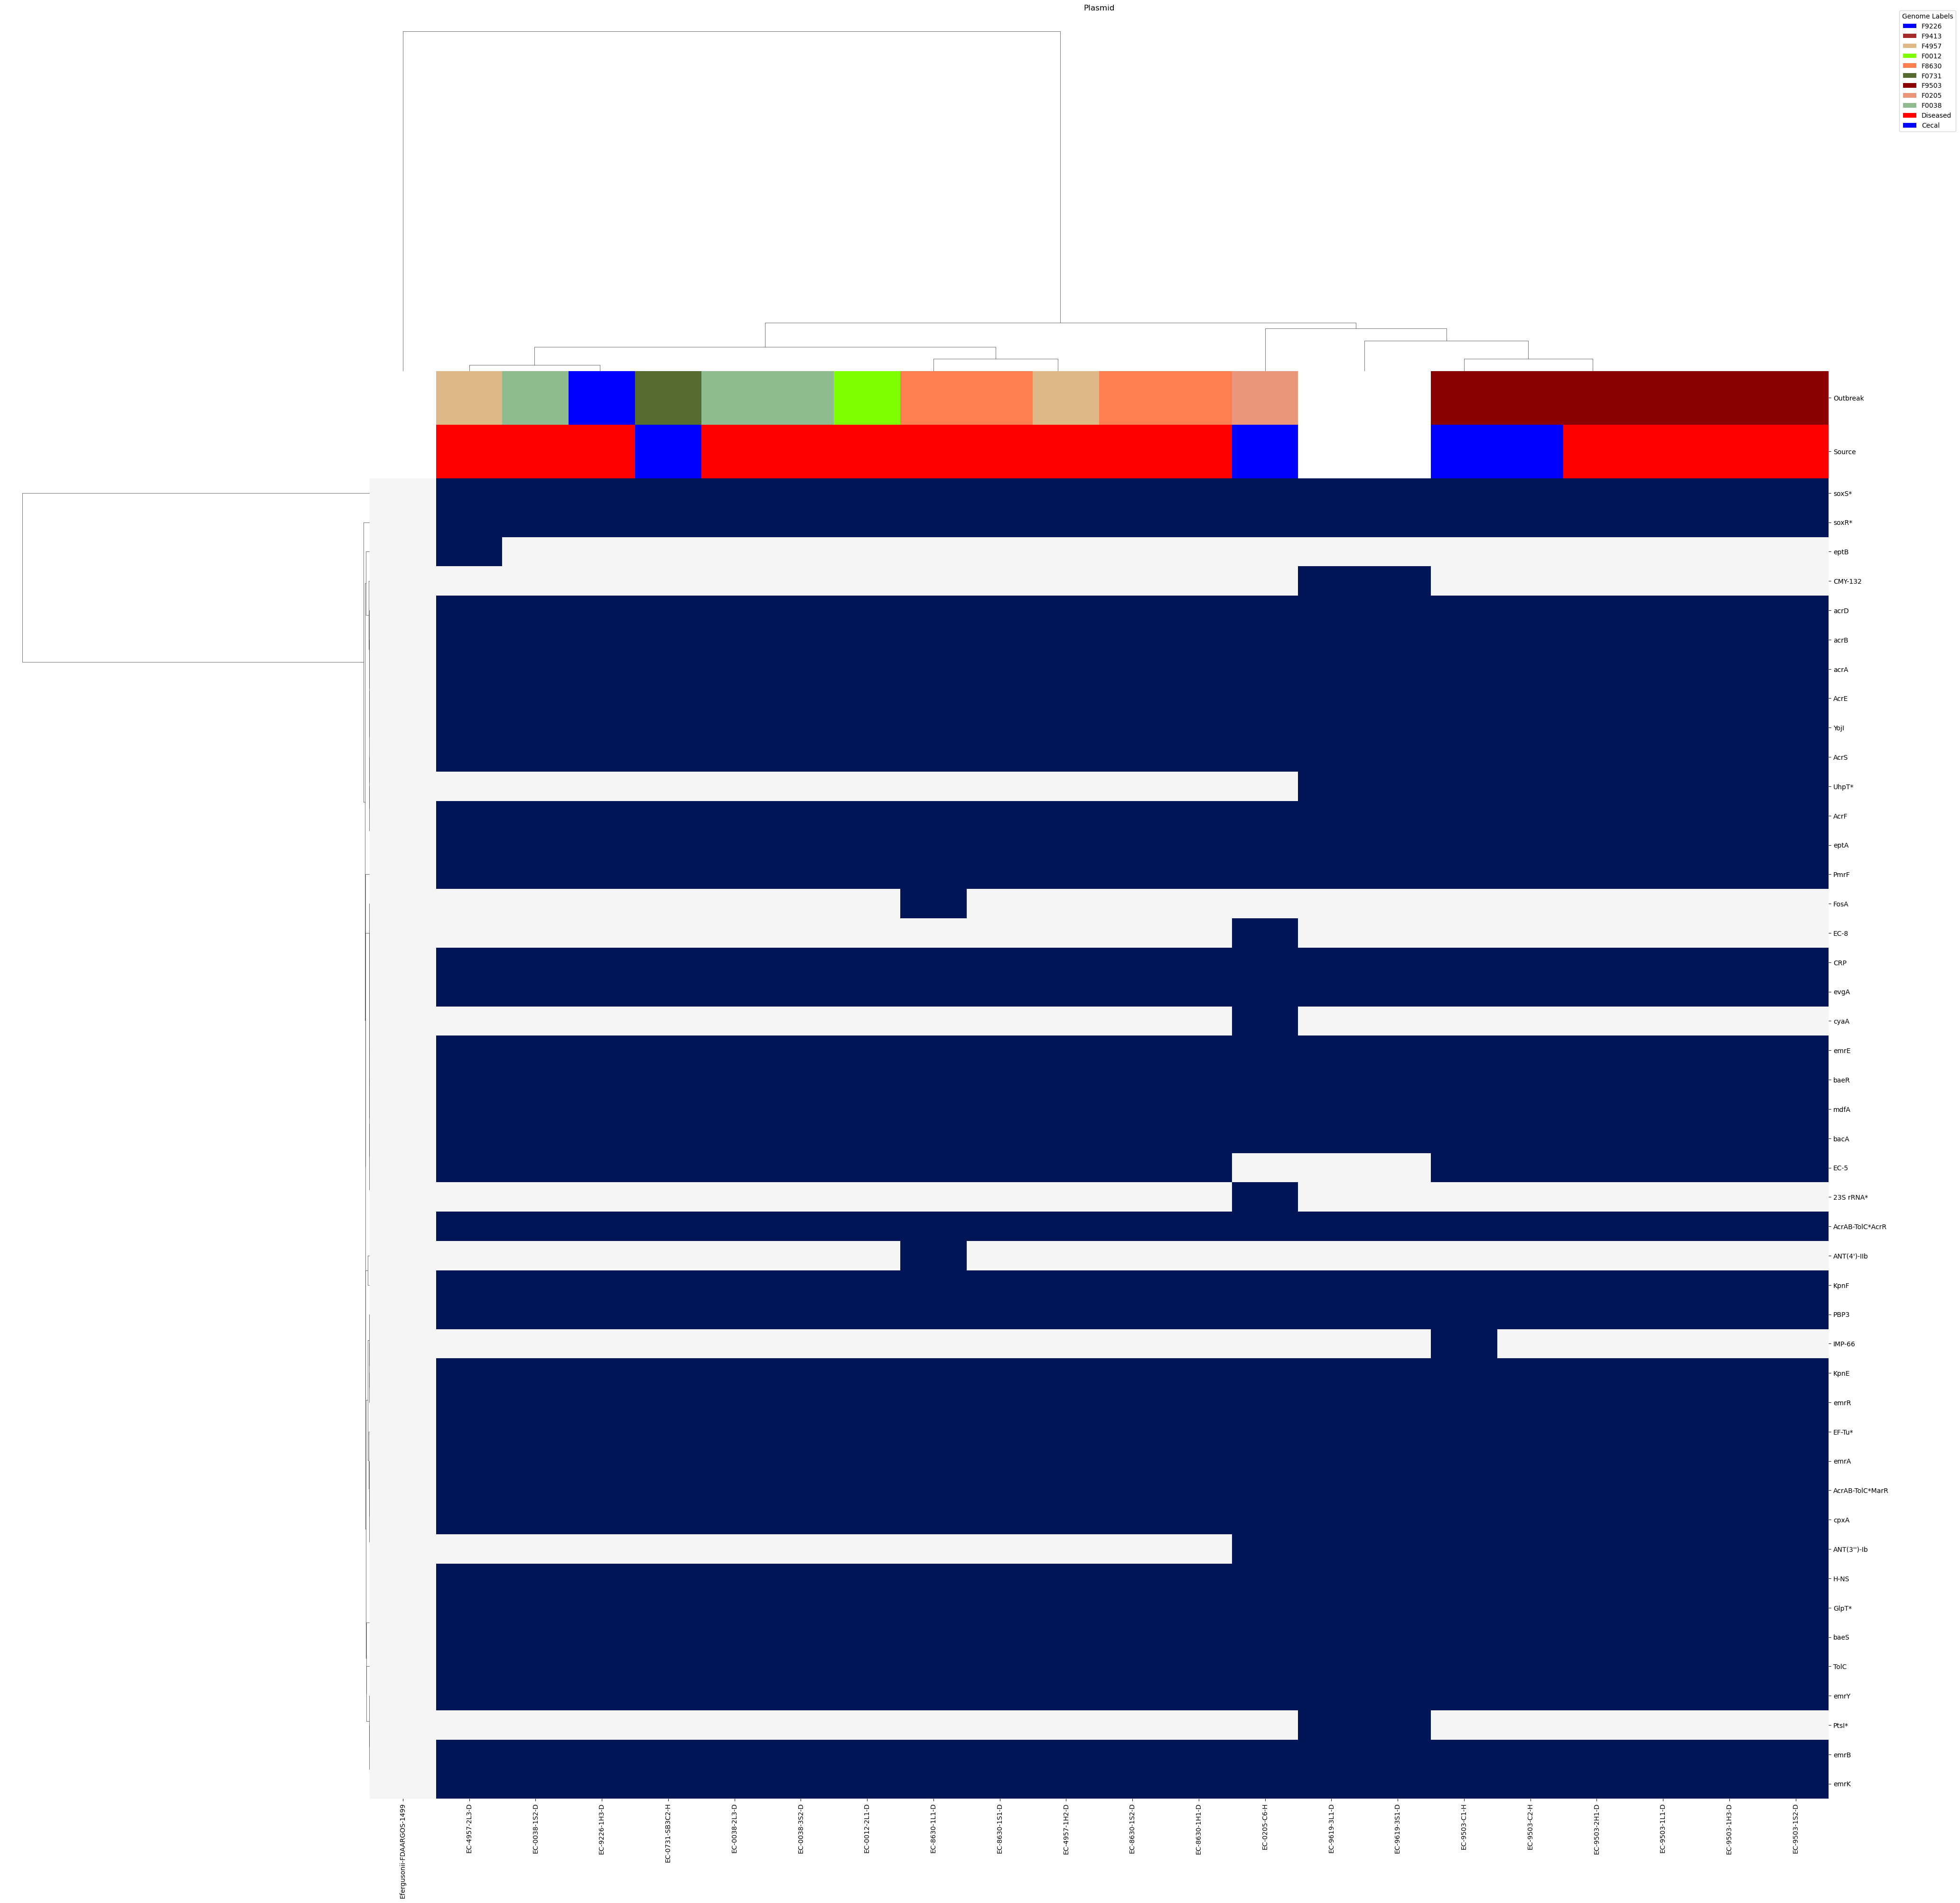

In [58]:
feature = 'Plasmid'
panel = 'a'
sel_pa1 = ppa_B24
sel_pa1.rename(name_map, axis=1, inplace=True)
sel_pa1 = sel_pa1.T.loc[:,dmB2.index]
title = feature

#plot
handles = [Patch(facecolor=legend_cmap_B2[name]) for name in legend_cmap_B2]
g = sns.clustermap(data=sel_pa1, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_B2,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_B2, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_B2_plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/3459067818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


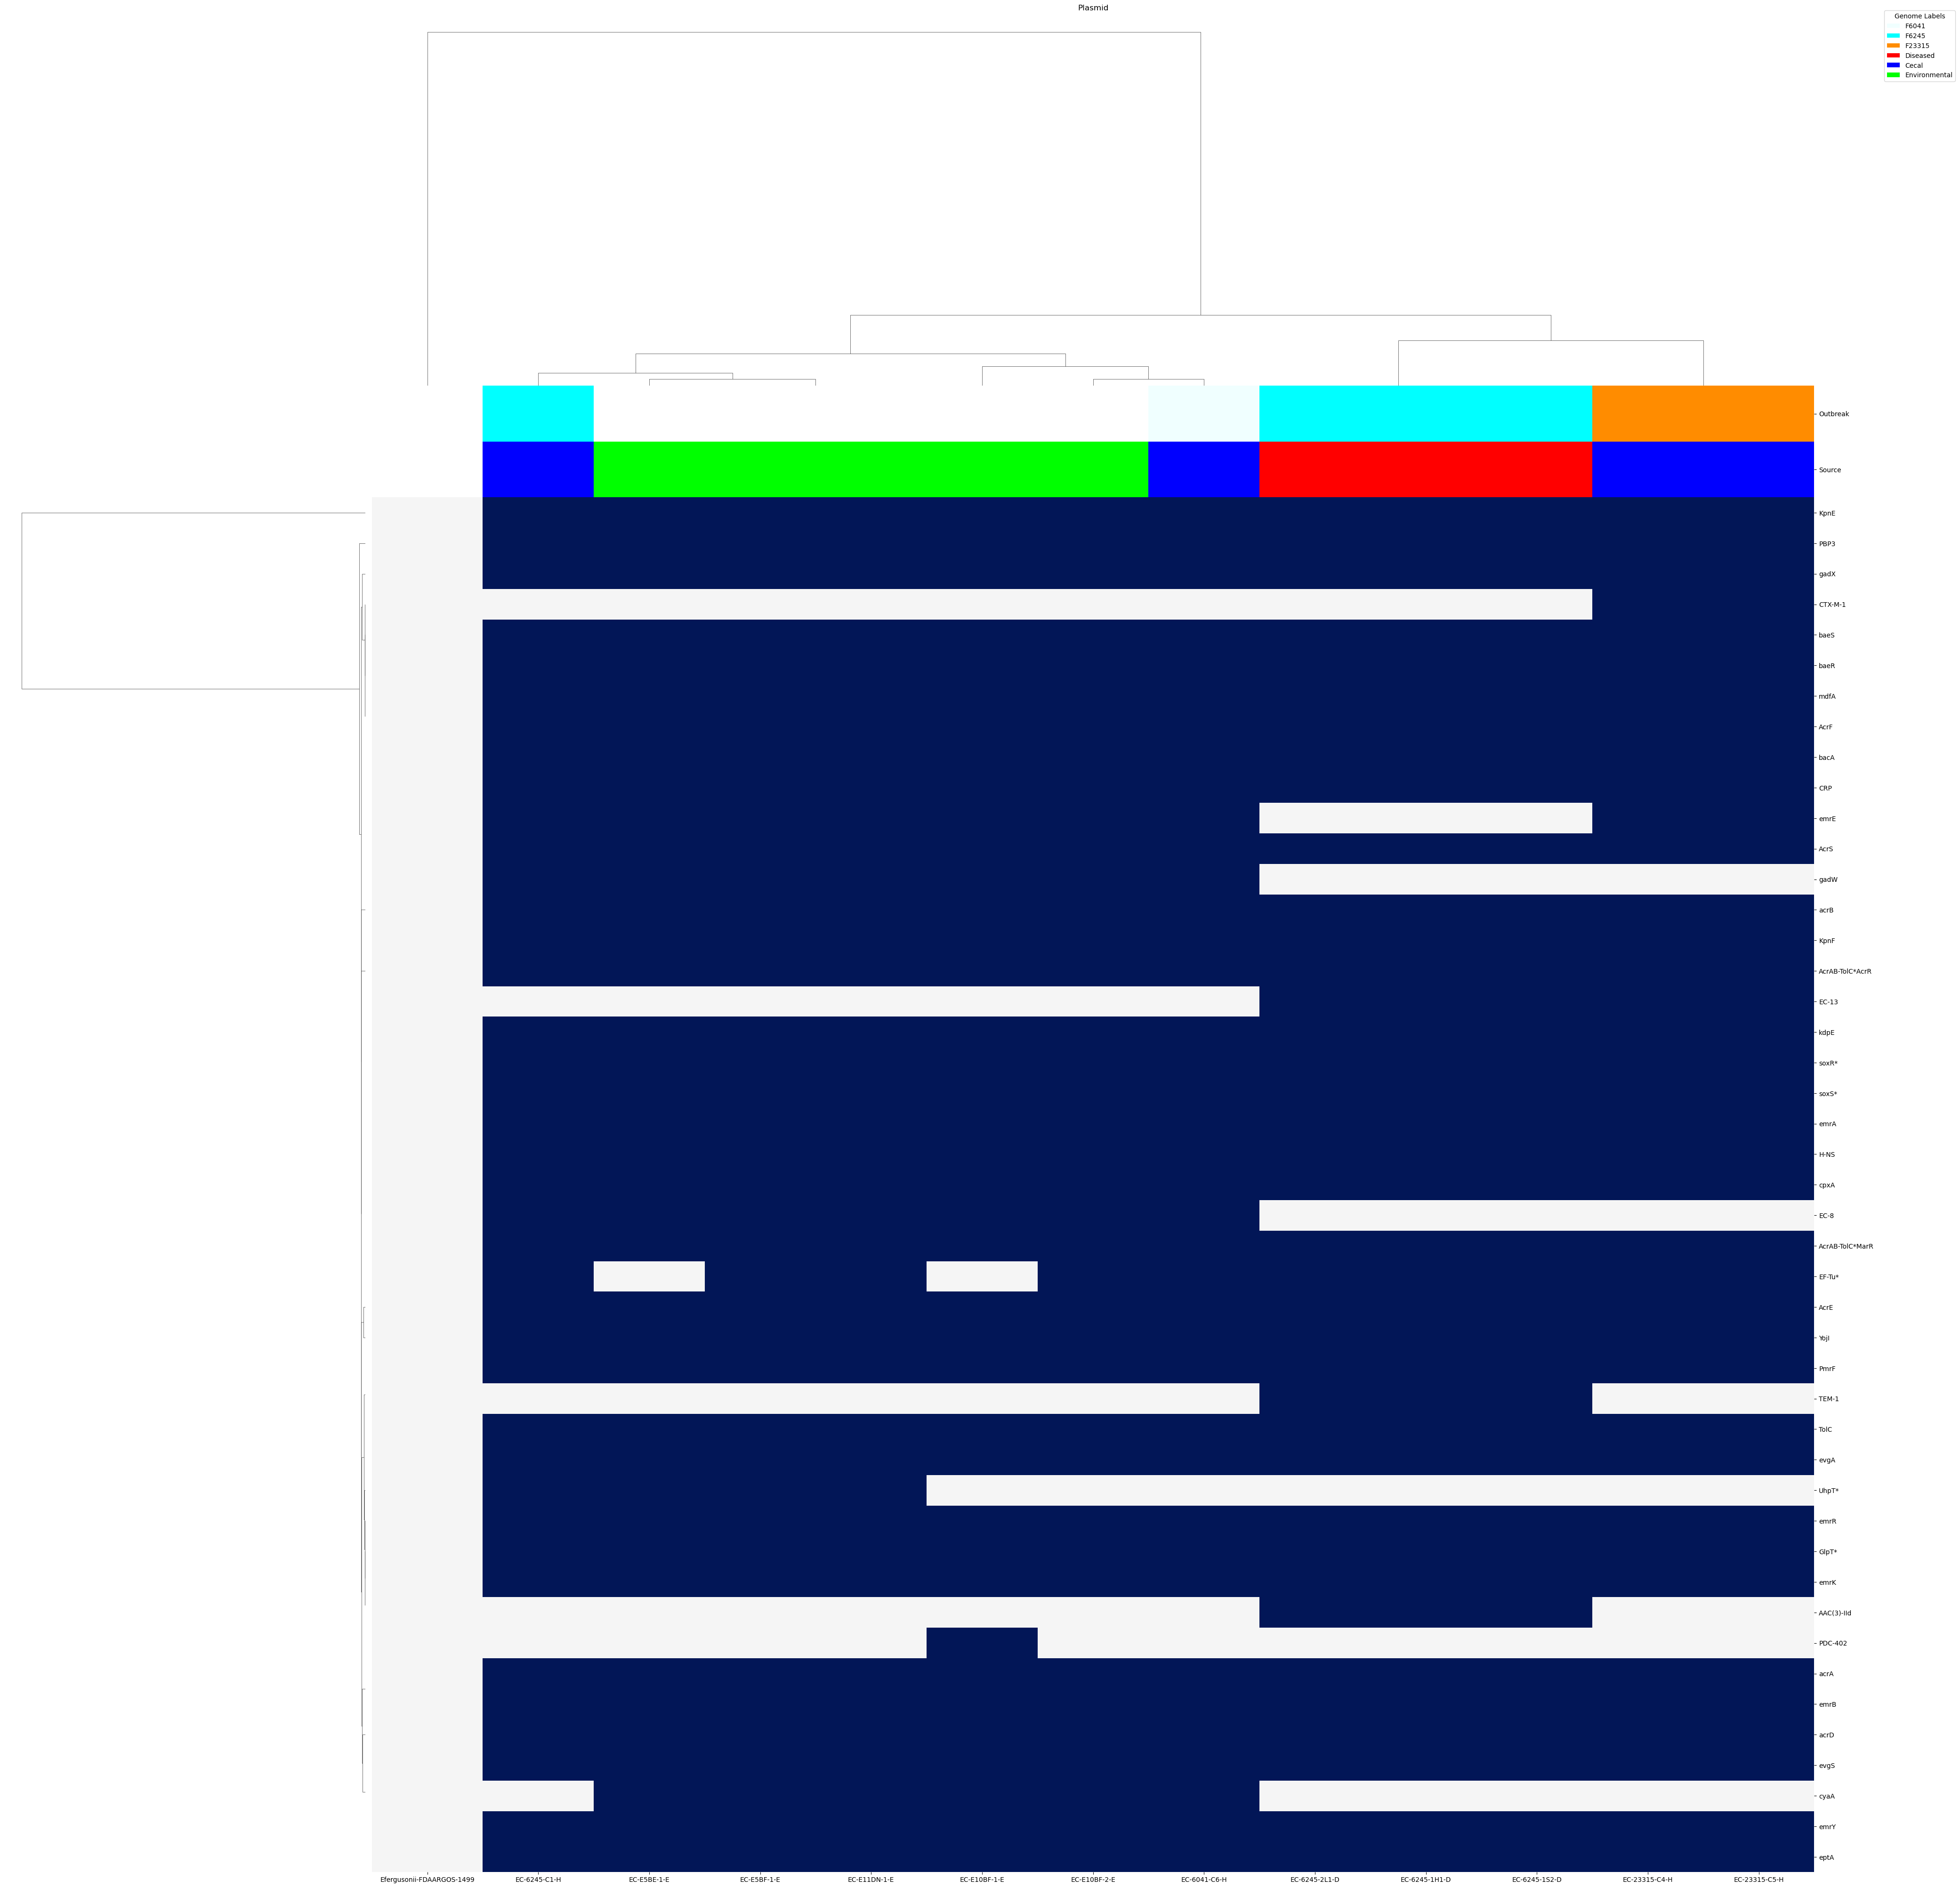

In [59]:
feature = 'Plasmid'
panel = 'a'

sel_pa = ppa_C4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmC.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_C[name]) for name in legend_cmap_C]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_C,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_C, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_C_plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/1831746690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


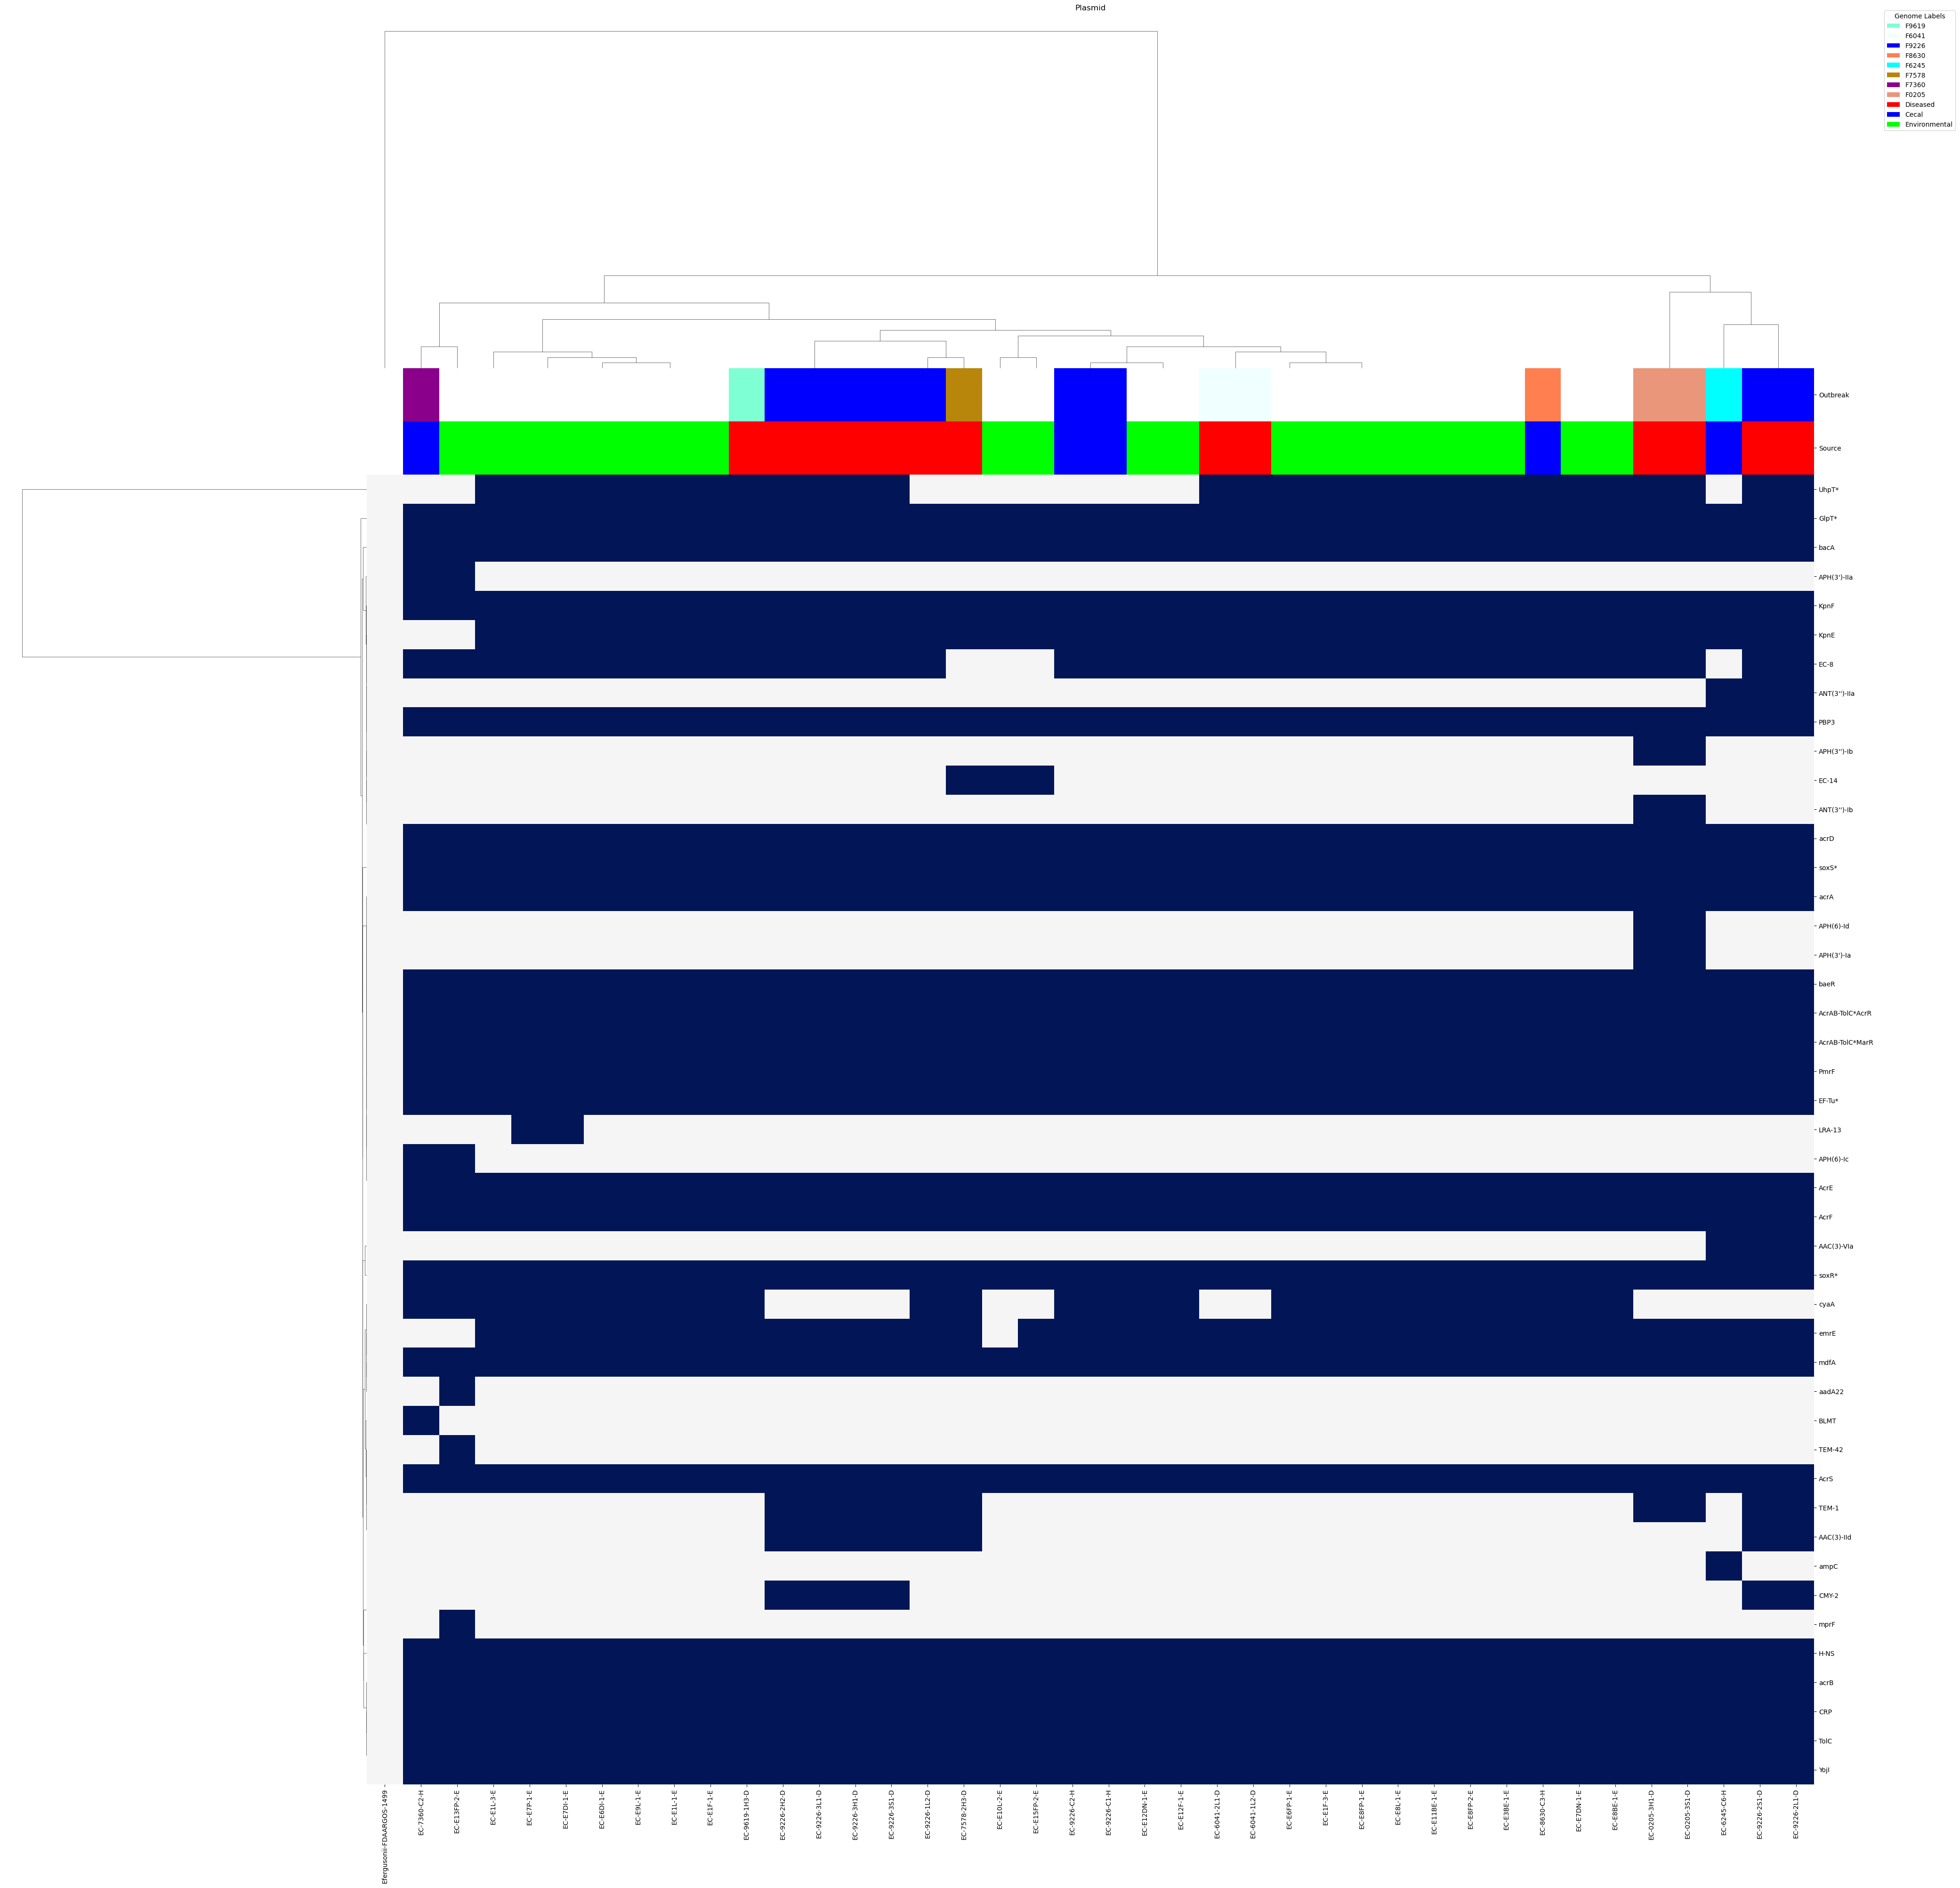

In [60]:
feature = 'Plasmid'
panel = 'a'

sel_pa = ppa_D4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmD.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_D[name]) for name in legend_cmap_D]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_D,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_D, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_D_Plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/1671725493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


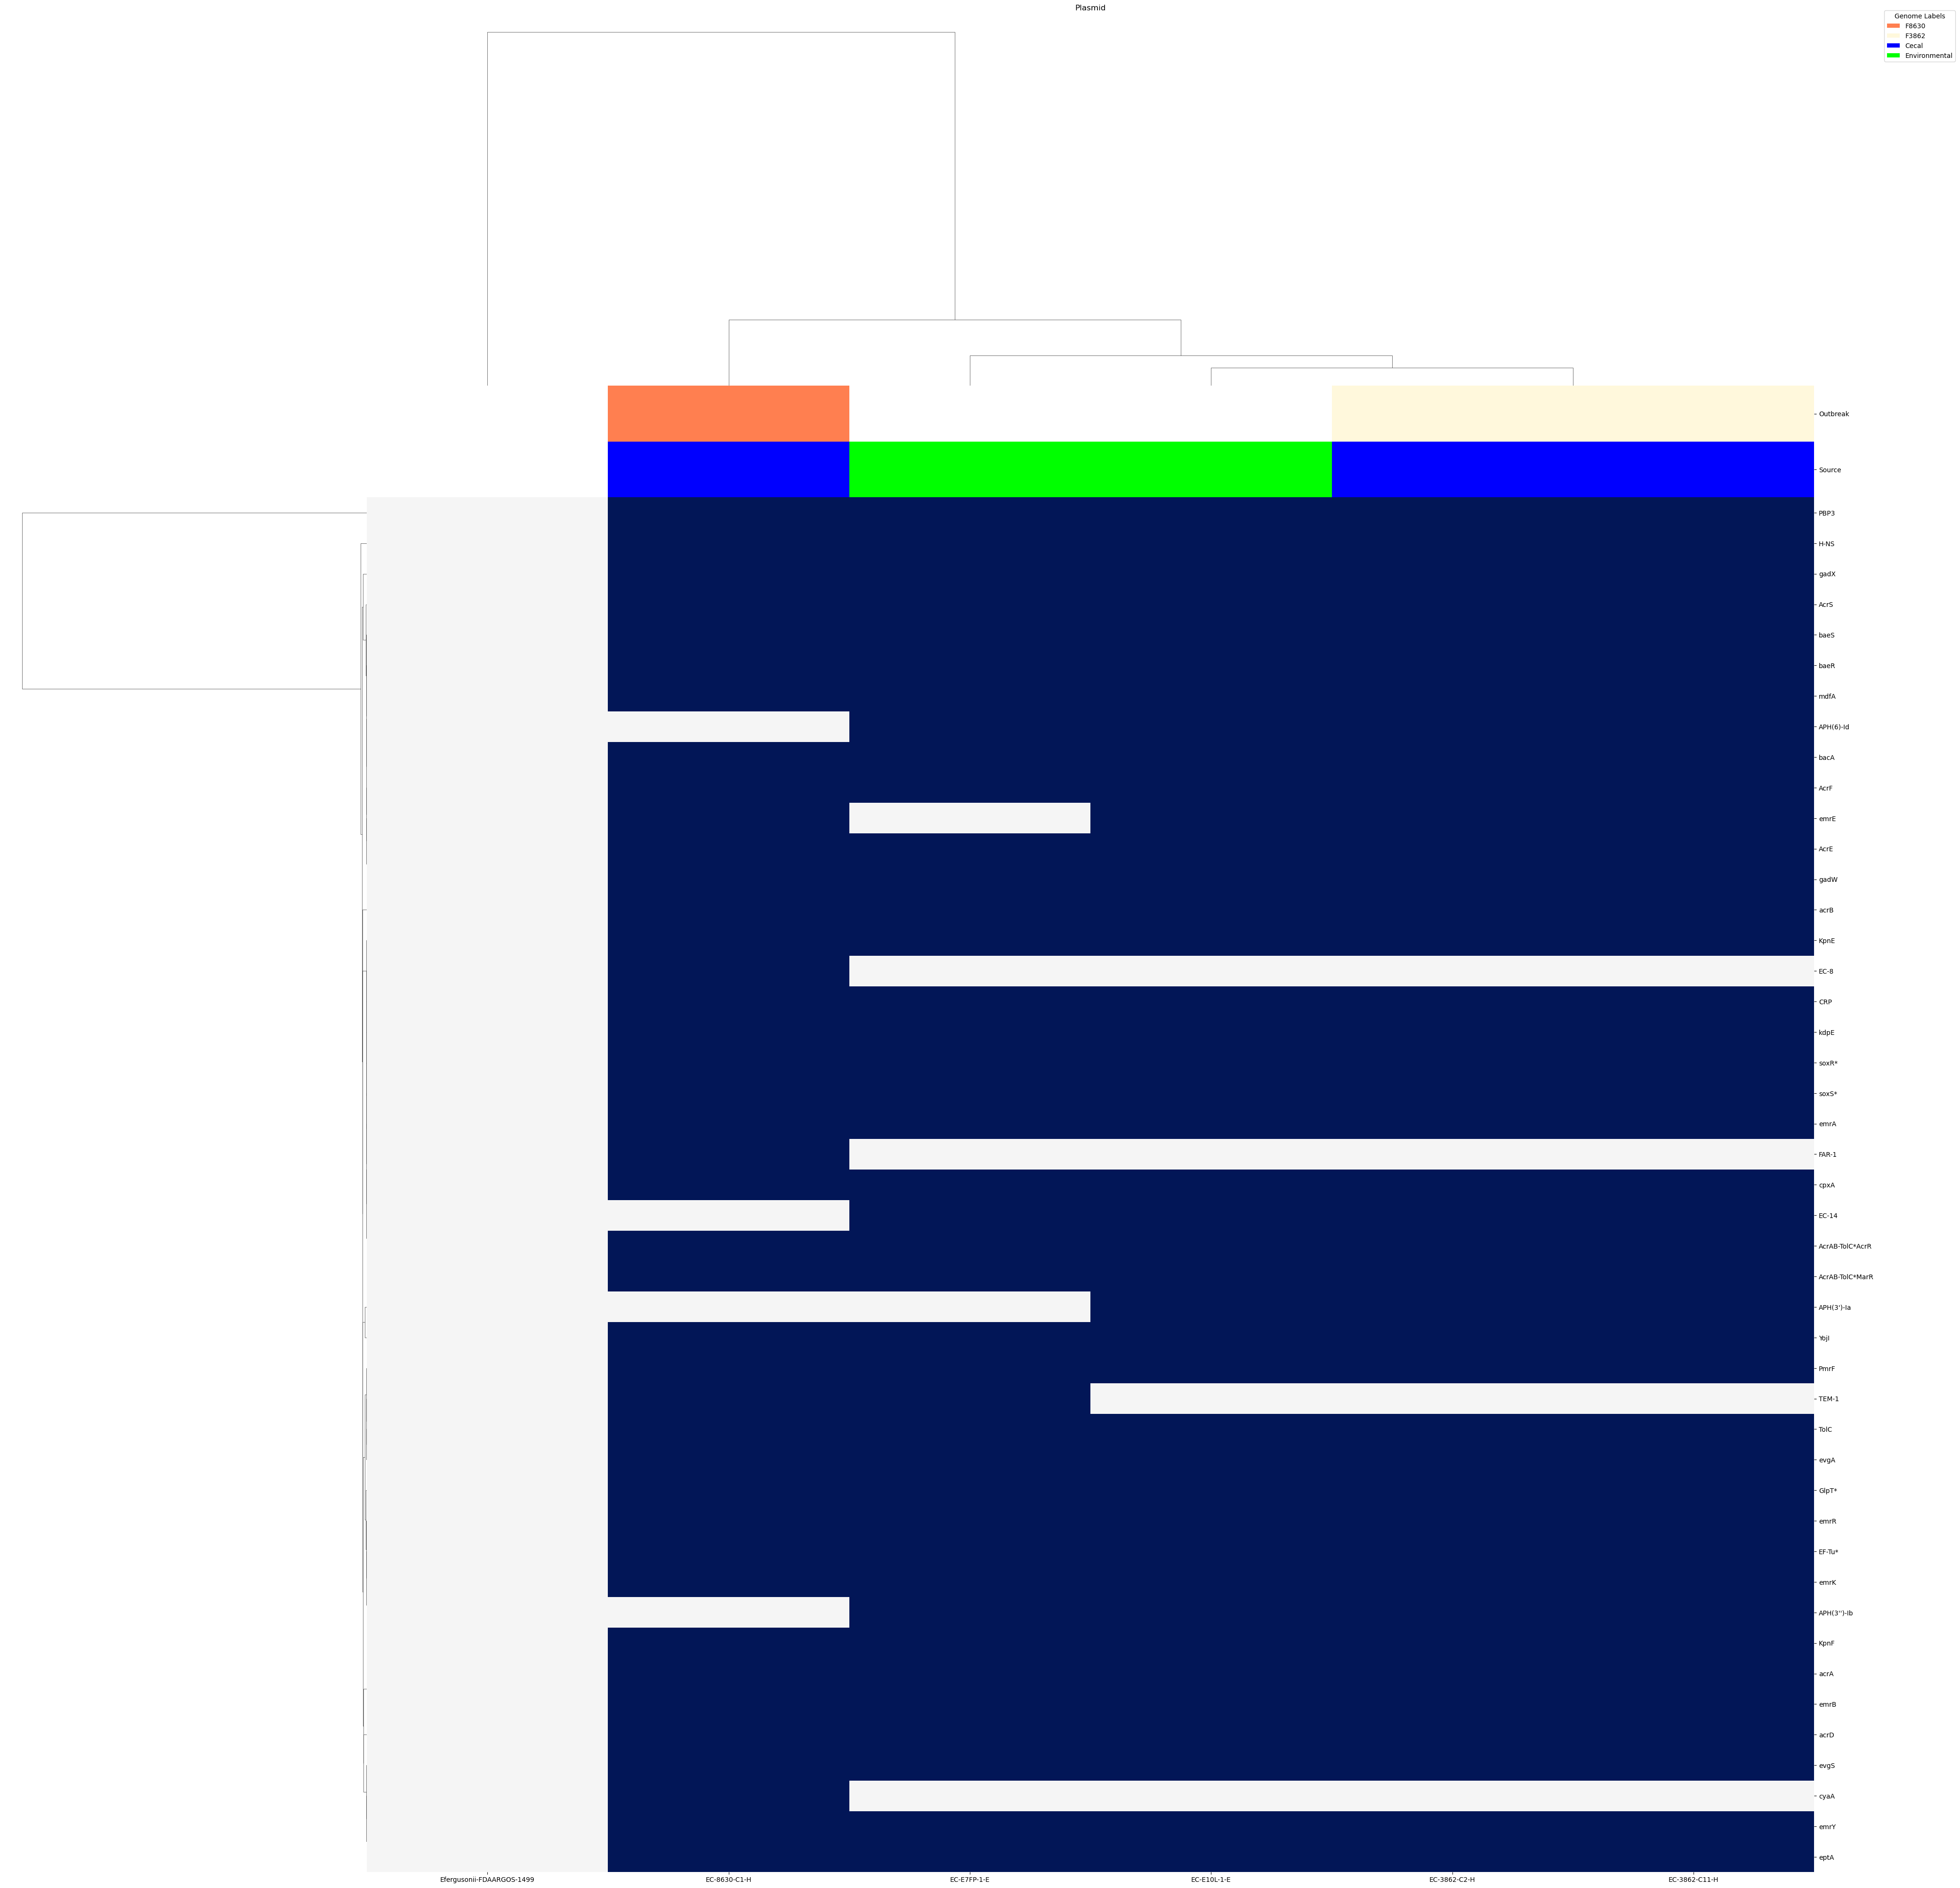

In [61]:
feature = 'Plasmid'
panel = 'a'

sel_pa = ppa_E4
sel_pa.rename(name_map, axis=1, inplace=True)
sel_pa = sel_pa.T.loc[:, dmE.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_E[name]) for name in legend_cmap_E]
g = sns.clustermap(data=sel_pa, 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, col_colors=genome_colors_E,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_E, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_E_Plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)

/tmp/ipykernel_206839/2230022704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


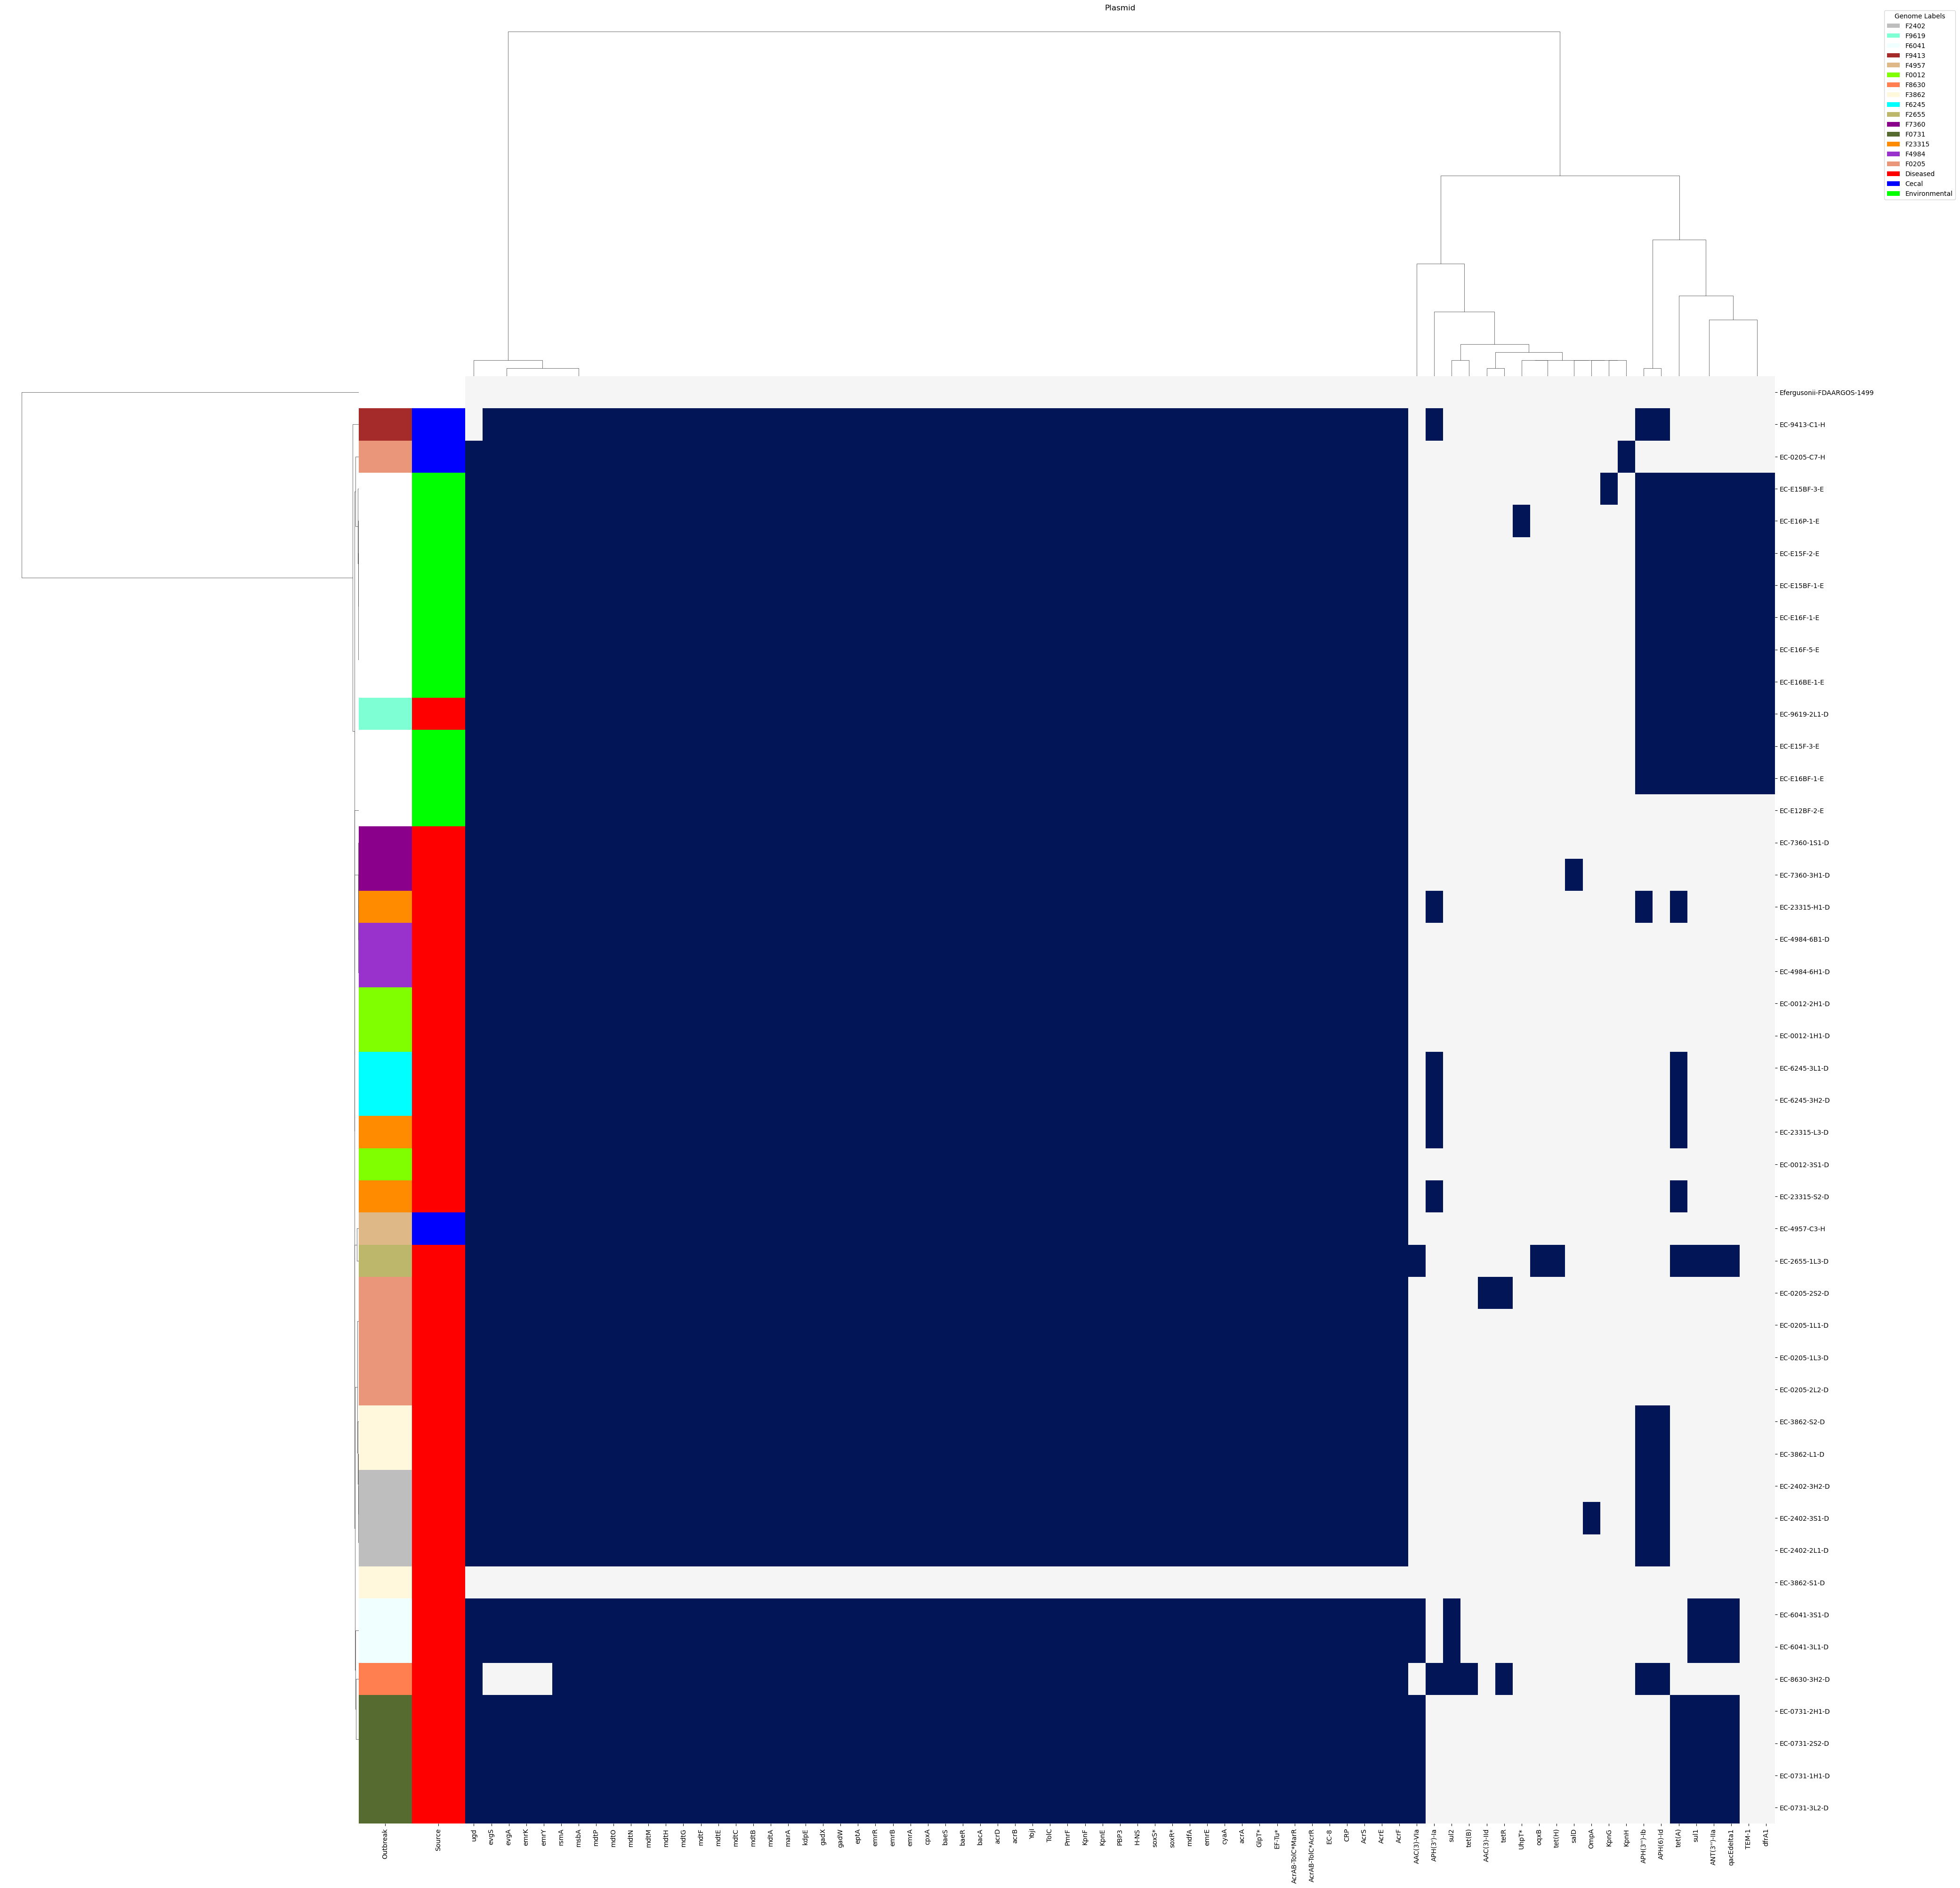

In [62]:
feature = 'Plasmid'
panel = 'a'

sel_pa = ppa_G4
sel_pa.rename(name_map, axis=1, inplace=True)
#sel_pa = sel_pa.T.loc[:, dmE.index]
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap_G[name]) for name in legend_cmap_G]
g = sns.clustermap(data=sel_pa.loc[dmG.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors_G,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=True,
                   figsize=(40,40))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap_G, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04282023_G_Plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)